# LENDING CLUB CASE STUDY: DETAILED ANALYSIS

In [2]:
#Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#load the data frame
loan_data = pd.read_csv("loan.csv")
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [5]:
#shape of data frame
loan_data.shape

(39717, 111)

In [6]:
#Finding percentage of null or missing values
null_perc = round((loan_data.isnull().sum() / len(loan_data)) * 100, 2)
null_perc[null_perc > 0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

In [7]:
#Removing columns which has more than 30% null values in it.
loan_data.drop(null_perc[ null_perc > 30 ].index, axis=1, inplace=True)

In [8]:
#Finding number of unique values in each vcolumn
loan_data.nunique().sort_values().head(15)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
pub_rec_bankruptcies          3
verification_status           3
loan_status                   3
pub_rec                       5
home_ownership                5
dtype: int64

**'tax_liens'**, **'delinq_amnt'**, **'chargeoff_within_12_mths'**, **'acc_now_delinq'**, **'application_type'**, **'policy_code'**, 
**'collections_12_mths_ex_med***, **'initial_list_status'**, **'pymnt_plan'**,columns have only one unique value in all the rows, which will not give any useful information for the Analysis. Removing them..

In [9]:
#Dropping Columns with only one values.
loan_data.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

In [10]:
#Finding number of unique values, printing high unique valued columns
loan_data.nunique().sort_values(ascending=False)

id                         39717
url                        39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
zip_code                     823
earliest_cr_line             526
int_rate                     371
last_credit_pull_d           106
last_pymnt_d                 101
total_acc                     82
issue_d                       55
addr_state

columns with text values which have unique values- **emp_title, and title** 

In [11]:
loan_data.drop(['emp_title', 'title'], axis=1, inplace=True)

**id, url, and member_id** -has unique values and only one of these can be used as primary key.
Using **id** as primary key and removing url and member id columns.

In [12]:
loan_data.drop(['member_id', 'url'], axis=1, inplace=True)

**total_rec_int, total_rec_prncp, total_rec_late_fee, recoveries, collection_recovery_fee, last_credit_pull_d, last_pymnt_d, out_prncp, out_prncp_inv** variables are valid for barrowers who already took loan. As we are only interested only in loan application details these columns can be removed.
**recoveries, collection_recovery_fee** columns are only valid for charged off loans.
Will removed these colomns.

In [13]:
loan_data.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d'], axis=1, inplace=True)
loan_data.drop(['out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

In [14]:
#Finding percentage of null or missing values
null_perc = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)
null_perc[ null_perc > 0 ]

emp_length              2.71
revol_util              0.13
pub_rec_bankruptcies    1.75
dtype: float64

Removing the the **null** valued rows in the above columns.

In [15]:
loan_data.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)
#Finding percentage of null or missing values
null_perc = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)
null_perc[ null_perc > 0 ]

Series([], dtype: float64)

**Loan Status** has 3 distinct values and out of them we need only _Fully Paid_ and _Charged Off_. Hence removing the rows with _Current_ values in loan status.

In [16]:
#Removing current loan status rows
loan_data = loan_data[loan_data.loan_status != 'Current']

In [17]:
#Checking unique values for term column
loan_data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

There is an empty space at the start of values. Removing it.

In [18]:
#Stripping empty space in values in term
loan_data['term'] = loan_data.term.str.strip()
loan_data.term.value_counts()

36 months    27546
60 months     9254
Name: term, dtype: int64

In [19]:
loan_data.shape

(36800, 31)

#### Data type conversions:

In [20]:
# Finding datatype in all coulmns
loan_data.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: o

**int_rate** and **revol_util** have '%' symbol values and data type of the object. Removing % at the end and convert to float.

In [21]:
#stripping '%' value
loan_data['int_rate'] = loan_data.int_rate.str.strip('%').astype(float)
loan_data['revol_util'] = loan_data.revol_util.str.strip('%').astype(float)

**issue_d** and **earliest_cr_line** have date values, converting column data type to date.

In [22]:
#converting to date type
loan_data['issue_d'] = pd.to_datetime(loan_data.issue_d, format='%b-%y')

#if there are any data before unix timestamp they are converted to 21 century values, 
#so subtracting values more than 2020  with 100 will give more actual time
loan_data['issue_d'] = loan_data['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

loan_data['earliest_cr_line'] = pd.to_datetime(loan_data.earliest_cr_line, format='%b-%y')
loan_data['earliest_cr_line'] = loan_data['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [23]:
# Converted to proper datatypes for analysis
loan_data.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util               

### Derived Variables:

Creating new columns from date type columns:

In [24]:
#issue_d column
loan_data['issue_d_year'] = loan_data.issue_d.dt.year
loan_data['issue_d_month'] = loan_data.issue_d.dt.strftime('%b')
loan_data['issue_d_weekday'] = loan_data.issue_d.dt.weekday
#data type conversion of year and weekday
loan_data['issue_d_year'] = loan_data['issue_d_year'].astype(object)
loan_data['issue_d_weekday'] = loan_data['issue_d_weekday'].astype(object)

#earliest_cr_line
loan_data['earliest_cr_line_year'] = loan_data.earliest_cr_line.dt.year
loan_data['earliest_cr_line_month'] = loan_data.earliest_cr_line.dt.strftime('%b')
#data type conversion of year and weekday
loan_data['earliest_cr_line_year'] = loan_data['earliest_cr_line_year'].astype(object)

Creating **Approved Loan amount ratio** which is thr ratio of Funded Amount by investor to Requested Loan amount.

In [25]:
loan_data['approved_loan_amnt_ratio'] = round(loan_data.funded_amnt_inv*100/loan_data.loan_amnt,2)

In [26]:
loan_data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  \
0  1077501       5000         5000           4975.0  36 months     10.65   
1  1077430       2500         2500           2500.0  60 months     15.27   
2  1077175       2400         2400           2400.0  36 months     15.96   
3  1076863      10000        10000          10000.0  36 months     13.49   
5  1075269       5000         5000           5000.0  36 months      7.90   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT     24000.0   
1        59.83     C        C4   < 1 year           RENT     30000.0   
2        84.33     C        C5  10+ years           RENT     12252.0   
3       339.31     C        C1  10+ years           RENT     49200.0   
5       156.46     A        A4    3 years           RENT     36000.0   

  verification_status    issue_d  loan_status         purpose zip_code  \
0            Verified 2011-12-01   Fully Paid     credit_card    860xx   
1     Source Verified 2011-12-01  Charged Off             car    309xx   
2        Not Verified 2011-12-01   Fully Paid  small_business    606xx   
3     Source Verified 2011-12-01   Fully Paid           other    917xx   
5     Source Verified 2011-12-01   Fully Paid         wedding    852xx   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         AZ  27.65            0       1985-01-01               1         3   
1         GA   1.00            0       1999-04-01               5         3   
2         IL   8.72            0       2001-11-01               2         2   
3         CA  20.00            0       1996-02-01               1        10   
5         AZ  11.20            0       2004-11-01               3         9   

   pub_rec  revol_bal  revol_util  total_acc   total_pymnt  total_pymnt_inv  \
0        0      13648        83.7          9   5863.155187          5833.84   
1        0       1687         9.4          4   1008.710000          1008.71   
2        0       2956        98.5         10   3005.666844          3005.67   
3        0       5598        21.0         37  12231.890000         12231.89   
5        0       7963        28.3         12   5632.210000          5632.21   

   last_pymnt_amnt  pub_rec_bankruptcies issue_d_year issue_d_month  \
0           171.62                   0.0         2011           Dec   
1           119.66                   0.0         2011           Dec   
2           649.91                   0.0         2011           Dec   
3           357.48                   0.0         2011           Dec   
5           161.03                   0.0         2011           Dec   

  issue_d_weekday earliest_cr_line_year earliest_cr_line_month  \
0               3                  1985                    Jan   
1               3                  1999                    Apr   
2               3                  2001                    Nov   
3               3                  1996                    Feb   
5               3                  2004                    Nov   

   approved_loan_amnt_ratio  
0                      99.5  
1                     100.0  
2                     100.0  
3                     100.0  
5                     100.0

In [27]:
# Converted date formats for analysis
loan_data.dtypes

id                                   int64
loan_amnt                            int64
funded_amnt                          int64
funded_amnt_inv                    float64
term                                object
int_rate                           float64
installment                        float64
grade                               object
sub_grade                           object
emp_length                          object
home_ownership                      object
annual_inc                         float64
verification_status                 object
issue_d                     datetime64[ns]
loan_status                         object
purpose                             object
zip_code                            object
addr_state                          object
dti                                float64
delinq_2yrs                          int64
earliest_cr_line            datetime64[ns]
inq_last_6mths                       int64
open_acc                             int64
pub_rec    

## Univariate Analysis:

### Loan Amount:

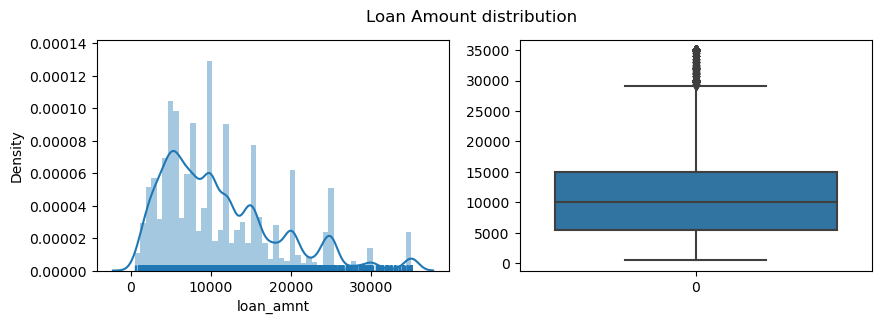

In [28]:
#Increasing the figure size of plot
plt.figure(figsize=(10,3))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=loan_data.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=loan_data.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()


In [29]:
#Stats of laon amount
loan_data.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    36800.000000
mean     11149.540761
std       7369.855703
min        500.000000
5%        2400.000000
10%       3200.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
90%      22000.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

**Observations**:<br>
From the above plots, more number of people took loan amount of 10000, and median of distribution is 10000. Very few people took a loan amount more than 30000.

### funded_amnt:
The total amount committed to that loan at the particular time:

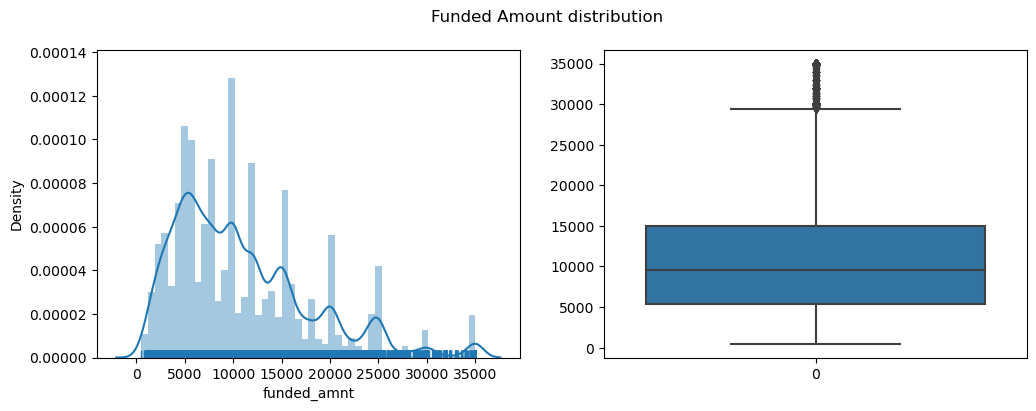

In [30]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_data.funded_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan_data.funded_amnt)
plt.suptitle('Funded Amount distribution')
plt.show()

In [31]:
loan_data.funded_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    36800.000000
mean     10880.794837
std       7109.157574
min        500.000000
5%        2400.000000
10%       3200.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
90%      20375.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

**Observations**:<br>
Funded amount data behaves similar to loan Amount, implying that the Lending club approved most of Applied loan amount.

### funded_amnt_inv:
The total amount committed by investors for that loan at the particular time:

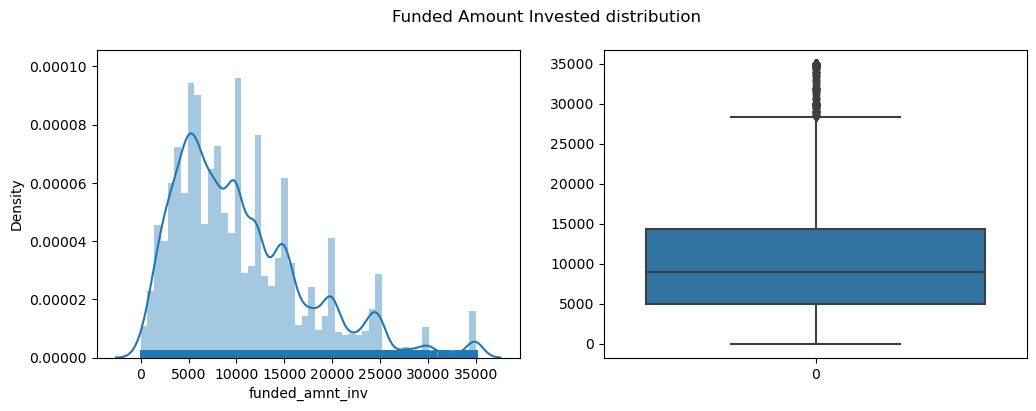

In [32]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_data.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan_data.funded_amnt_inv)
plt.suptitle('Funded Amount Invested distribution')
plt.show()

In [33]:
loan_data.funded_amnt_inv.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    36800.000000
mean     10439.055845
std       7008.522880
min          0.000000
5%        2000.000000
10%       3000.000000
25%       5000.000000
50%       9000.000000
75%      14350.000000
90%      20000.000000
95%      24655.816803
99%      34725.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

**Observations:**  
Funded amount investment data behaves similar to loan Amount, implying that the Lending club approved atmost of Applied loan amount.

### Approved Loan Amount Ratio:

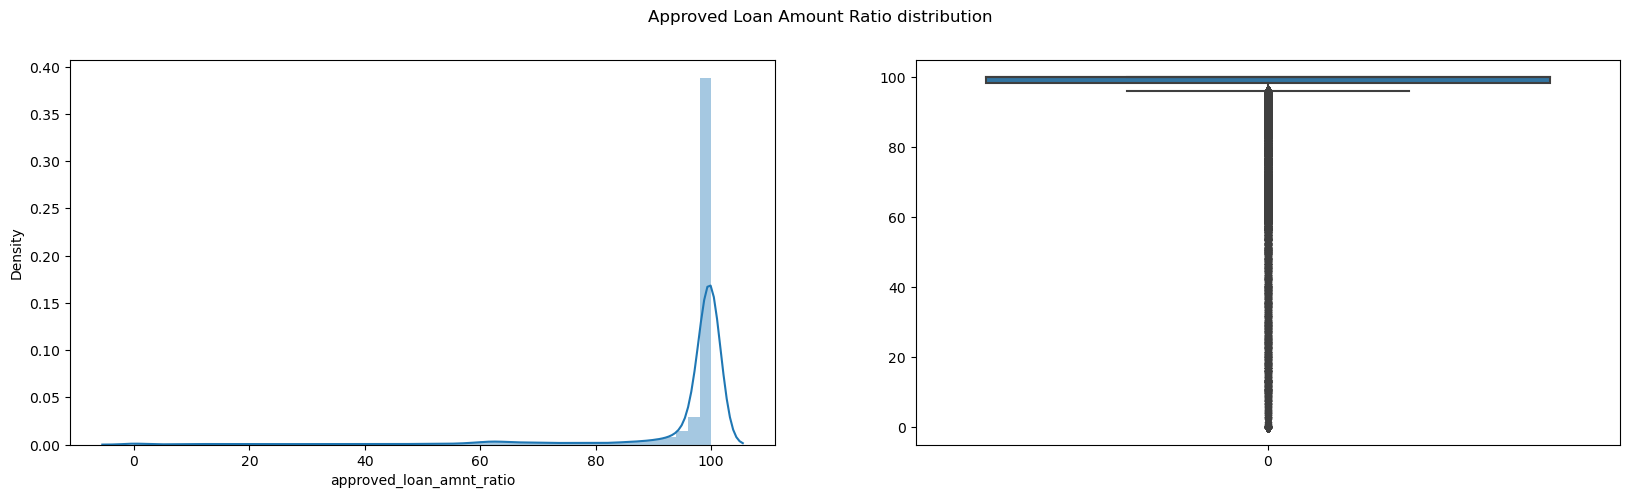

In [34]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(a=loan_data.approved_loan_amnt_ratio)
plt.subplot(1,2,2)
sns.boxplot(data=loan_data.approved_loan_amnt_ratio)
plt.suptitle('Approved Loan Amount Ratio distribution')
plt.show()

**Observations**:
70% of Borrowers received 100% loan amount from the investors.

### Interest Rate:

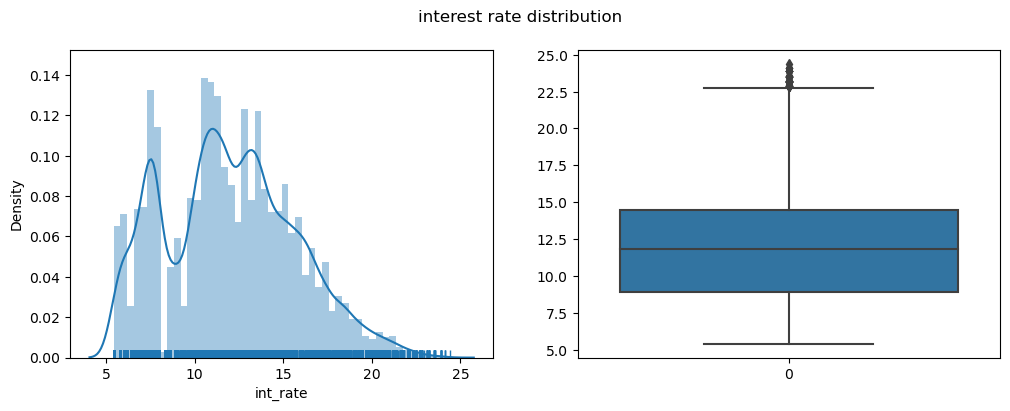

In [35]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan_data.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan_data.int_rate)
plt.suptitle('interest rate distribution')
plt.show()

**Observations**:<br>
From the above 2 plots and statistics of interest rates , we can acknowledge that most of the interest rates lie between **9% to 14.5%**. Some applicants/ borrowers got the loan at higher rates of interest i.e., **22.5%**

### Installment:
The monthly payment owed by the borrower if the loan originates.

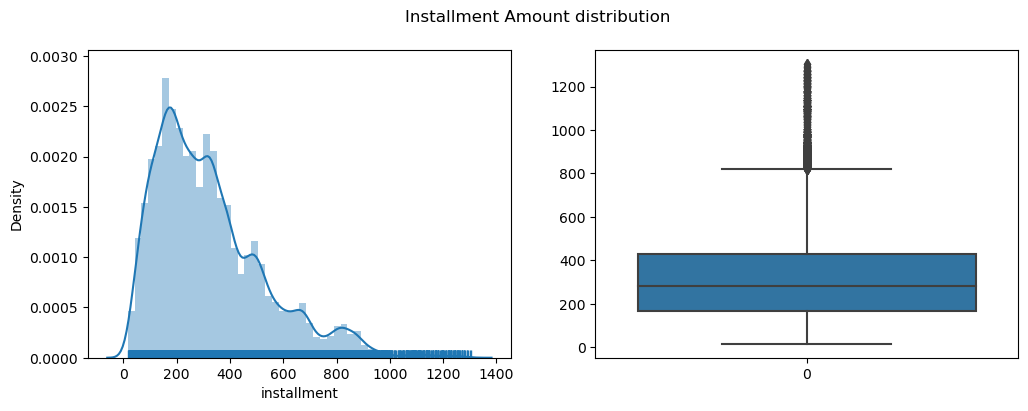

In [36]:
installment = loan_data.installment
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=installment)
plt.suptitle('Installment Amount distribution')
plt.show()

**Observations**:<br>
The Most representative value of Installment amount in around 280.

# annual_inc:
The self-reported annual income provided by the borrower during registration.

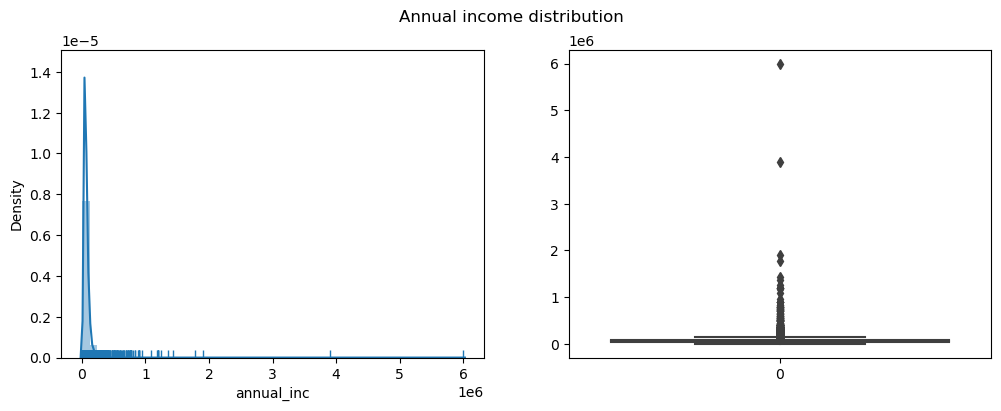

In [37]:
var1 = loan_data.annual_inc
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Annual income distribution')
plt.show()

**Observations**:<br>
Around 361 people have more than 235000 as their annual income, and 99% of people have incomes below 235000.

# dti:
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

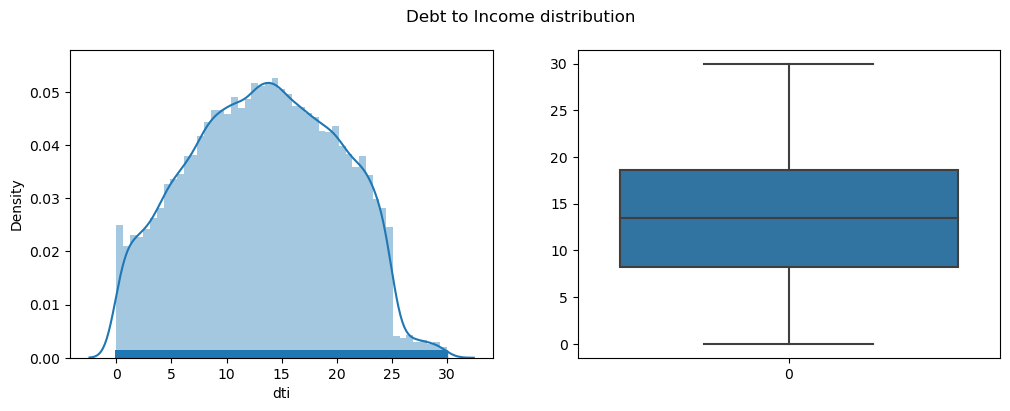

In [38]:
dti = loan_data.dti

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=dti, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=dti)
plt.suptitle('Debt to Income distribution')
plt.show()

**Observations**:<br>
Looks like there are no outliers and the distribution ids similar to normal distribution.
This implies that all the loans are given out to borroweres who have Debt to Income ration less than 30.

### Pub rec:
Number of Public derogatory records.

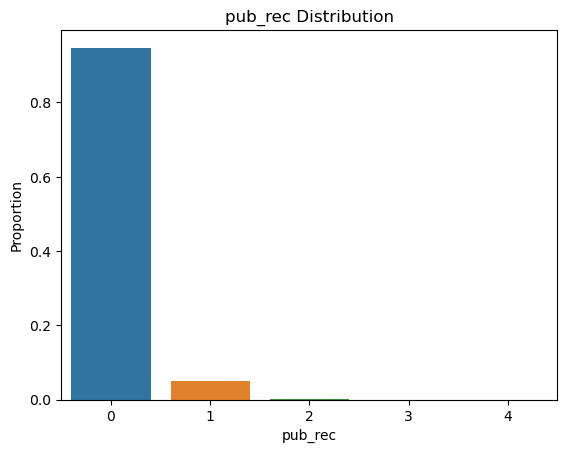

In [39]:
#Probability / Percentage of each values
prob_df = loan_data.pub_rec.value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='pub_rec', data=prob_df)
plt.xlabel('pub_rec')
plt.ylabel('Proportion')
plt.title('pub_rec Distribution')
plt.show()

**Observations**<br>
Around 90% borrower's have no public derogatory records.

# pub_rec_bankruptcies:
Number of public record bankruptcies.

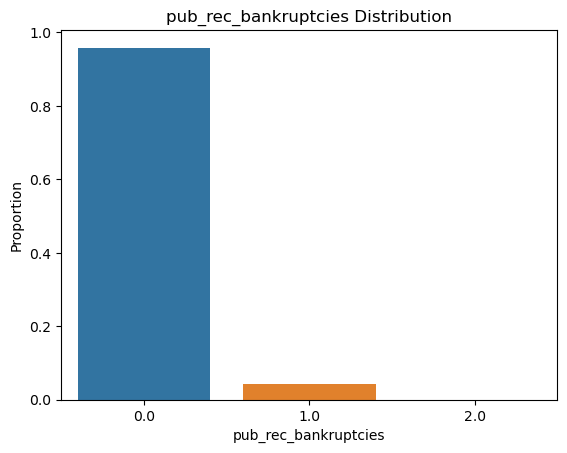

In [40]:
#Probability / Percentage of each values
prob_df = loan_data.pub_rec_bankruptcies.value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='pub_rec_bankruptcies', data=prob_df)
plt.xlabel('pub_rec_bankruptcies')
plt.ylabel('Proportion')
plt.title('pub_rec_bankruptcies Distribution')
plt.show()

**Observations**:<br>
99% people have not gone bankrupt.

### Loan issue date (issue_d):

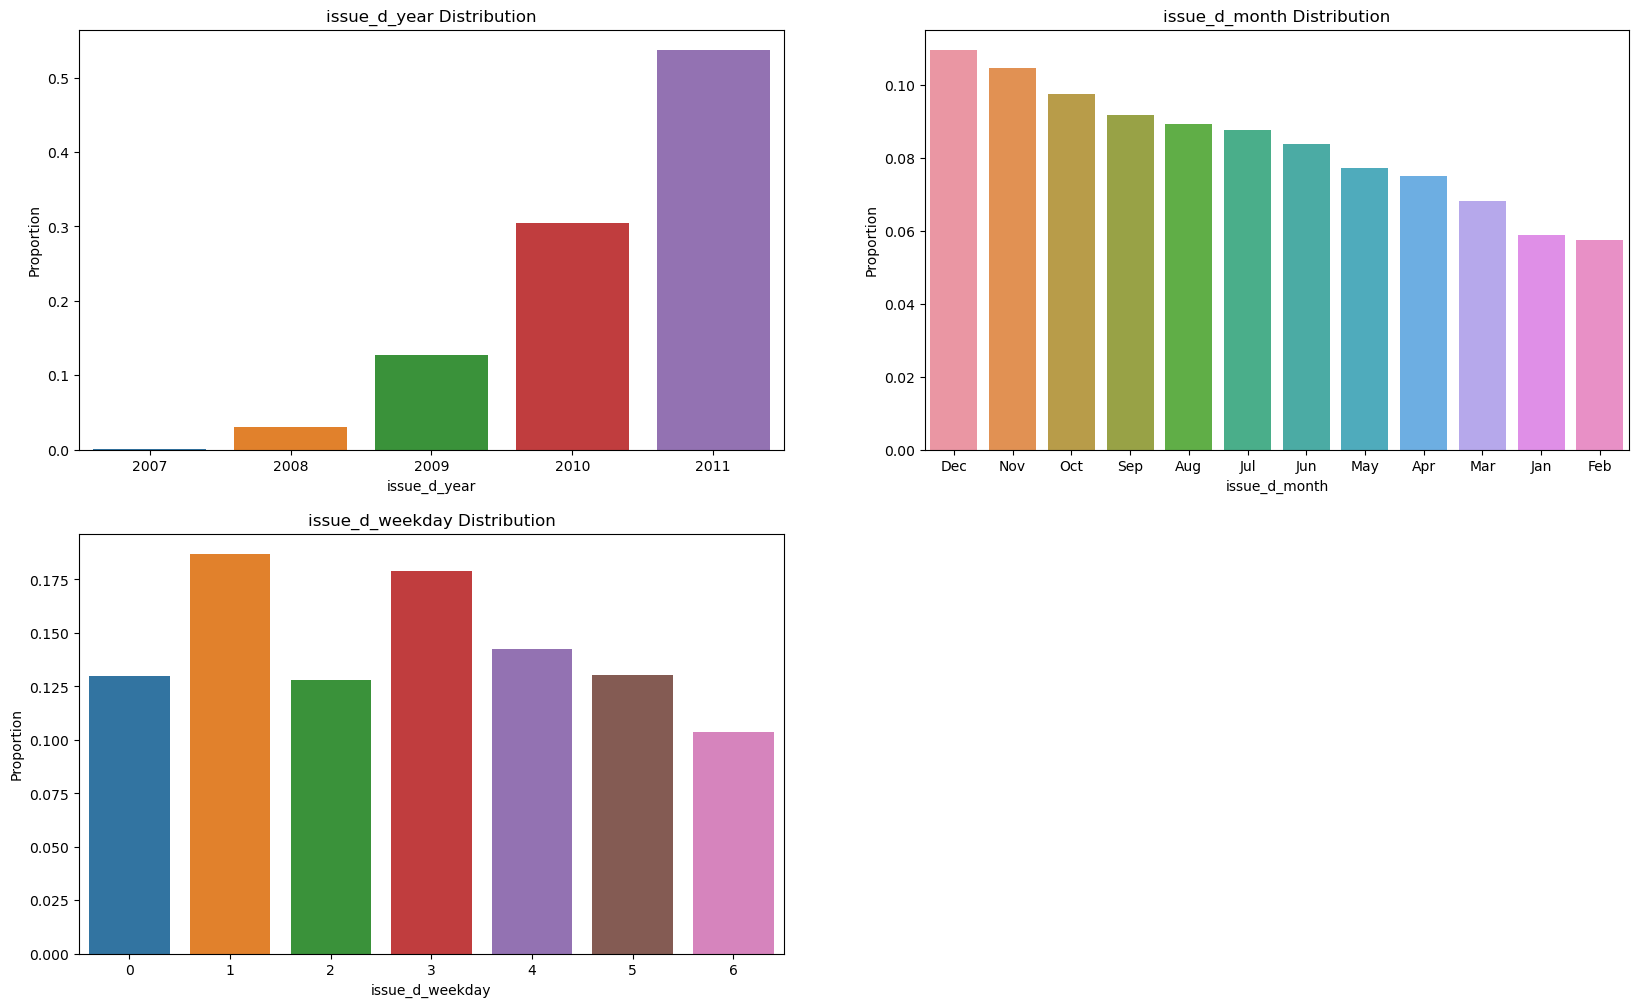

In [41]:
#Probability / Percentage of each values
prob_df = loan_data.issue_d_year.value_counts(normalize=True).reset_index()

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.barplot(x='index', y='issue_d_year', data=prob_df)
plt.xlabel('issue_d_year')
plt.ylabel('Proportion')
plt.title('issue_d_year Distribution')

#Probability / Percentage of each values
prob_df = loan_data.issue_d_month.value_counts(normalize=True).reset_index()
plt.subplot(2,2,2)
sns.barplot(x='index', y='issue_d_month', data=prob_df)
plt.xlabel('issue_d_month')
plt.ylabel('Proportion')
plt.title('issue_d_month Distribution')

#Probability / Percentage of each values
prob_df = loan_data.issue_d_weekday.value_counts(normalize=True).reset_index()
plt.subplot(2,2,3)
sns.barplot(x='index', y='issue_d_weekday', data=prob_df)
plt.xlabel('issue_d_weekday')
plt.ylabel('Proportion')
plt.title('issue_d_weekday Distribution')

plt.show()

**Observations**:<br>
The lending club(LC) has loan issues which increase twofold every year. <br>
More issues of loan are recorded in the last 3 months of every year i.e., Oct, Nov and Dec. <br>
LC has issued more loans on tuesdays and wednessdays than other week days.

### Earliest Credit line (earliest_cr_line):

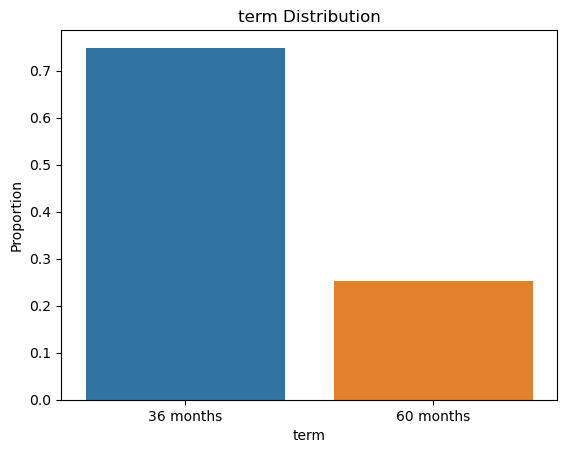

In [52]:
#Probability / Percentage of each values
prob_df = loan_data.term.value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='term', data=prob_df)
plt.xlabel('term')
plt.ylabel('Proportion')
plt.title('term Distribution')
plt.show()

**Observations**:<br>
Borrowers have taken 36 months as their loan tenure than 60 months.


### Grade:

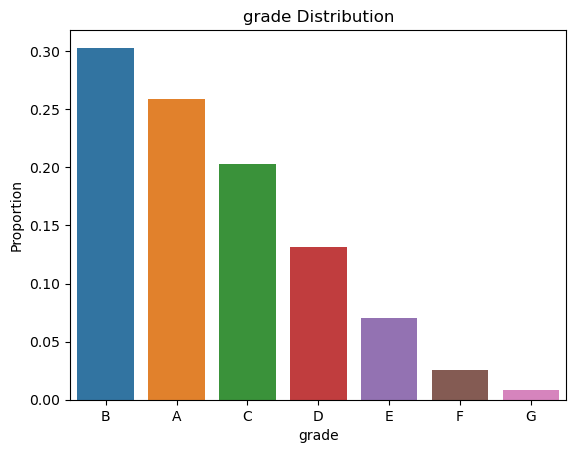

In [53]:
#Probability / Percentage of each values
prob_df = loan_data.grade.value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='grade', data=prob_df)
plt.xlabel('grade')
plt.ylabel('Proportion')
plt.title('grade Distribution')
plt.show()

**Observations**: <br>
Most borrowers fall under A and B grades.

###  Sub Grade:

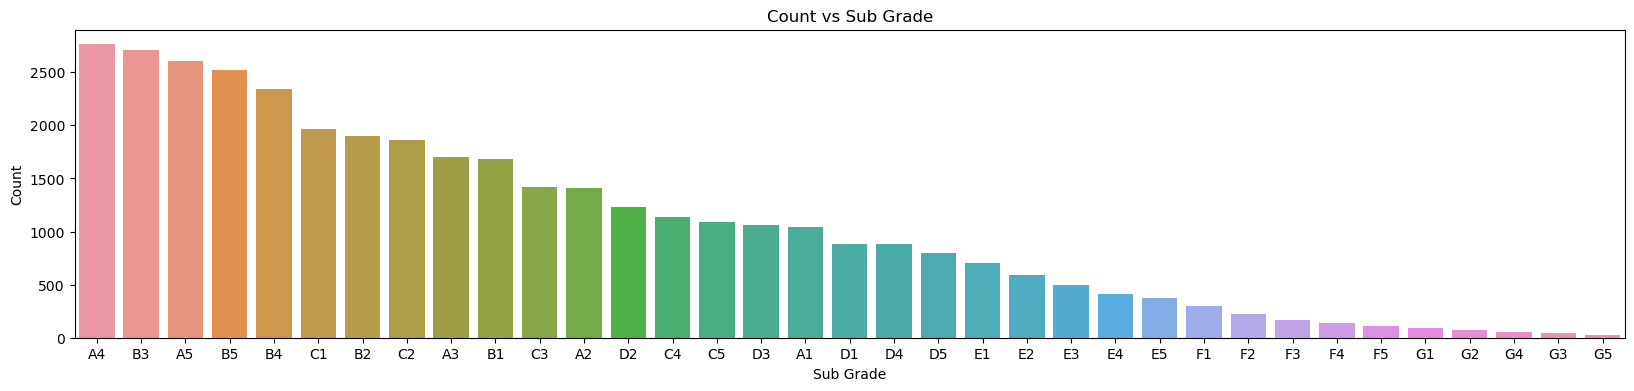

In [54]:
plt.figure(figsize=(20, 4))
sns.countplot(data=loan_data, x='sub_grade', order=loan_data['sub_grade'].value_counts().index)
plt.title('Count vs Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.show()

### Employment length:

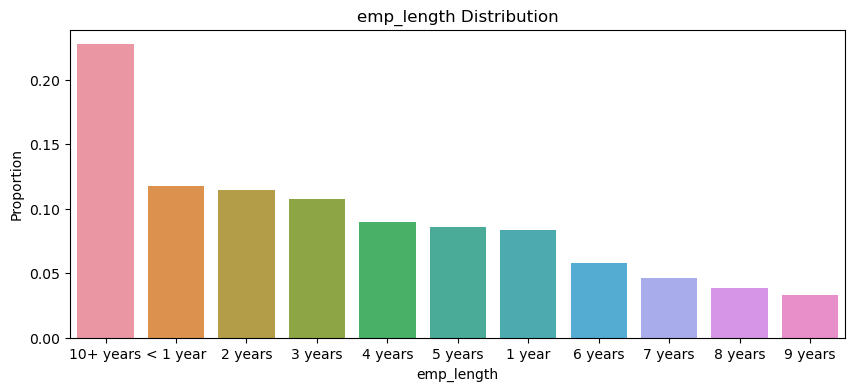

In [55]:
plt.figure(figsize=(10,4))
#Probability / Percentage of each values
prob_df = loan_data.emp_length.value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='emp_length', data=prob_df)
plt.xlabel('emp_length')
plt.ylabel('Proportion')
plt.title('emp_length Distribution')
plt.show()

**Observations**:<br>
Borrowers mostly have 10+ years as employment length.

### Home Ownership:

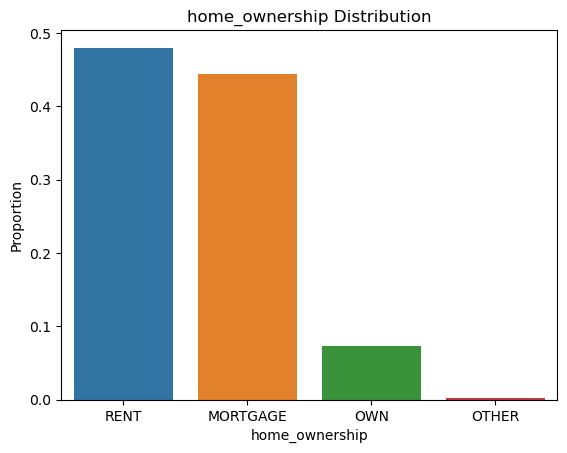

In [56]:
#Probability / Percentage of each values
prob_df = loan_data.home_ownership.value_counts(normalize=True).reset_index()
#Plotting percentage proporation vs home ownership
sns.barplot(x='index', y='home_ownership', data=prob_df)
plt.xlabel('home_ownership')
plt.ylabel('Proportion')
plt.title('home_ownership Distribution')
plt.show()

**Observations**:<br>
The loan borrowers are mostly have rented and mortgage houses.

### Verification Status:

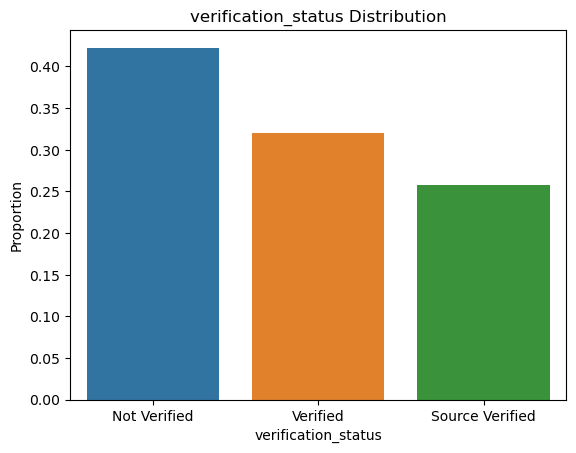

In [57]:
#Probability / Percentage of each values
prob_df = loan_data.verification_status.value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='verification_status', data=prob_df)
plt.xlabel('verification_status')
plt.ylabel('Proportion')
plt.title('verification_status Distribution')
plt.show()

**Observations**:<br>
Majority of loans were given without verification of applicant's income.

### Loan Status:

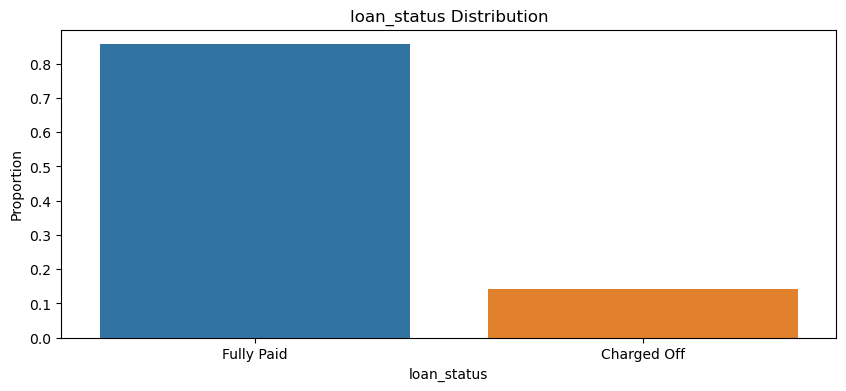

In [58]:
plt.figure(figsize=(10,4))
#Probability / Percentage of each values
prob_df = loan_data.loan_status.value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='loan_status', data=prob_df)
plt.xlabel('loan_status')
plt.ylabel('Proportion')
plt.title('loan_status Distribution')
plt.show()

**Observations**:<br>
85% of borrowers have paid the loan in full, where 14% have defaulted the loan.

### Purpose:

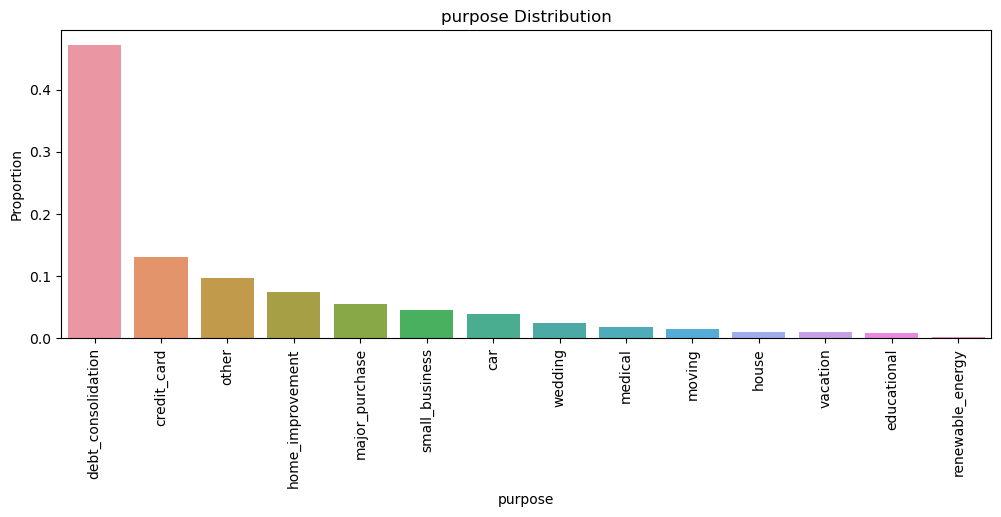

In [59]:
plt.figure(figsize=(12,4))
var = 'purpose'
#Probability / Percentage of each values
prob_df = loan_data.purpose.value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='purpose', data=prob_df)
plt.xlabel('purpose')
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title('purpose Distribution')
plt.show()

**Observations**:<br>
Most of the Borrowers took the loan for _debt consolidation_ and a very few took for _renewable energy_.

### Borrower's State (add_state):

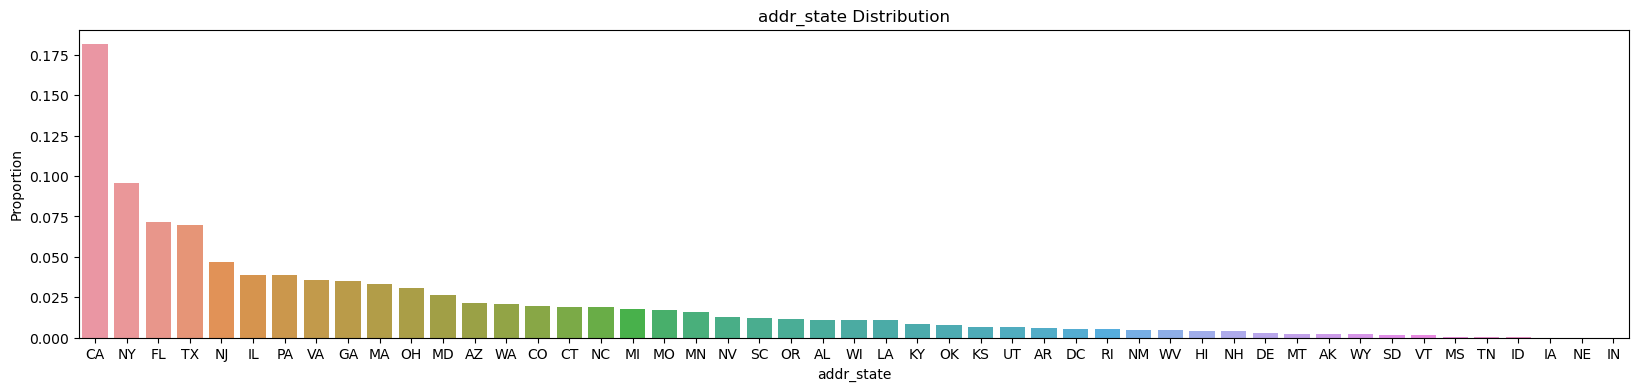

In [60]:
plt.figure(figsize=(20,4))
#Probability / Percentage of each values
prob_df = loan_data.addr_state.value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='addr_state', data=prob_df)
plt.xlabel('addr_state')
plt.ylabel('Proportion')
plt.title('addr_state Distribution')
plt.show()

**Observations**:<br>
Most of the borrowers are from _CA_ and _NY_.

<hr>

## Segmented Univariate Analysis:

### Loan Amount:

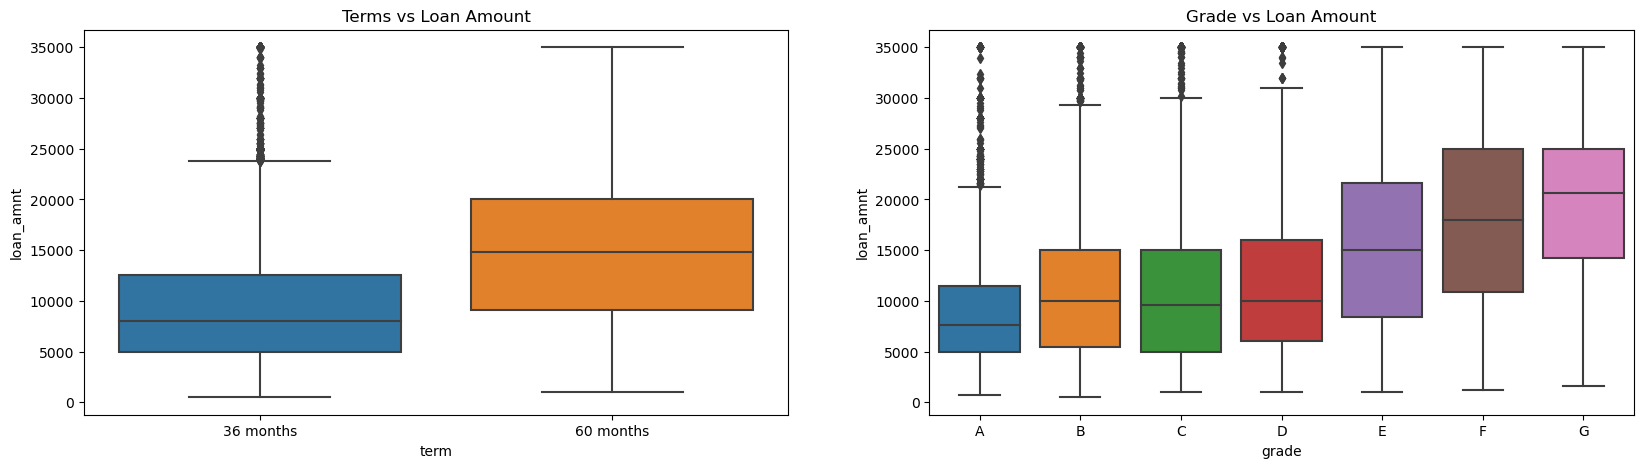

In [61]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_data.loan_amnt, data=loan_data)
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = loan_data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_data.loan_amnt, order = grade_ord, data=loan_data)
plt.show()

**Observations**:<br>
Higher amount loans have high tenure i.e, 60 months.  
Grade 'G' and 'H' have taken maximum loan amount. As the Grades decrease the loan amount increases.

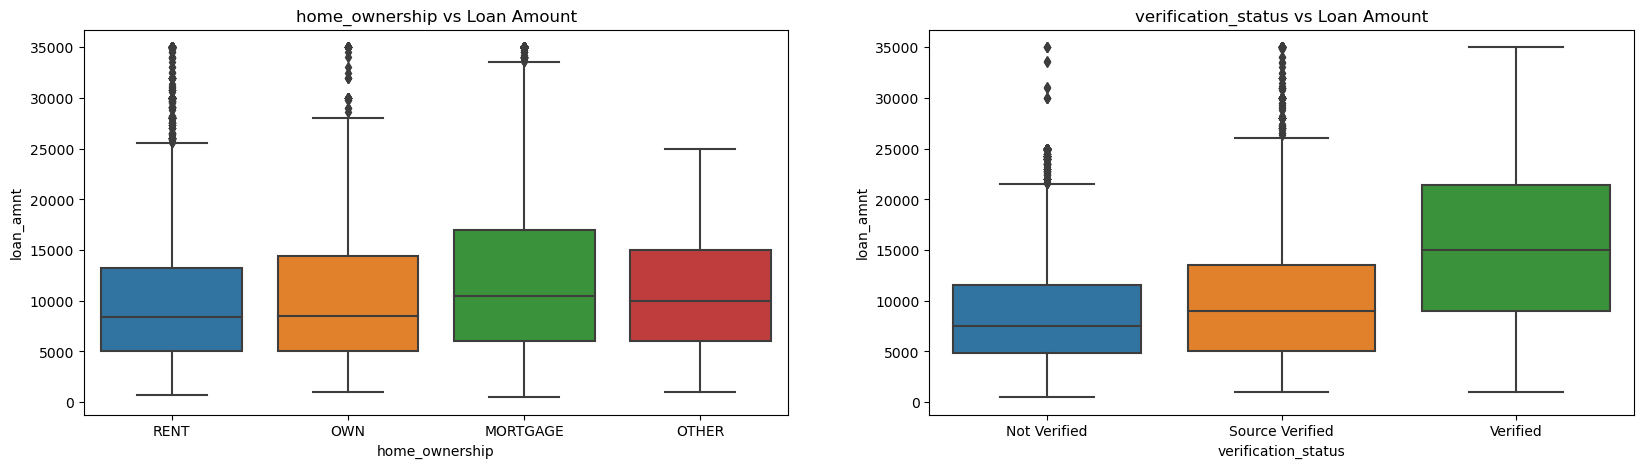

In [62]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan_data.loan_amnt, data=loan_data)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = loan_data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan_data.loan_amnt, order = verification_status_ord, data=loan_data)
plt.show()

**Observations**:<br>
Most borrowers are from MORTGAGE, and the median loan amount is high for MORTGAGE owned borrowers.  
Most of the borrowers are verified for borrowing loan >9k.

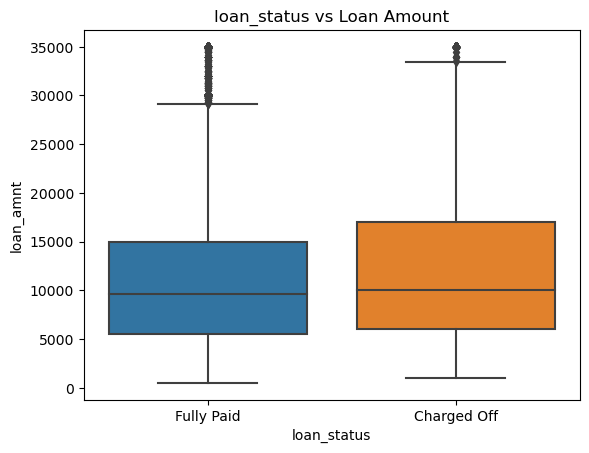

In [63]:
sns.boxplot(x='loan_status', y=loan_data.loan_amnt, data=loan_data)
plt.title('loan_status vs Loan Amount')
plt.show()

**Observations**:<br>
Charged Off loans have higher amounts than Fully Paid ones.

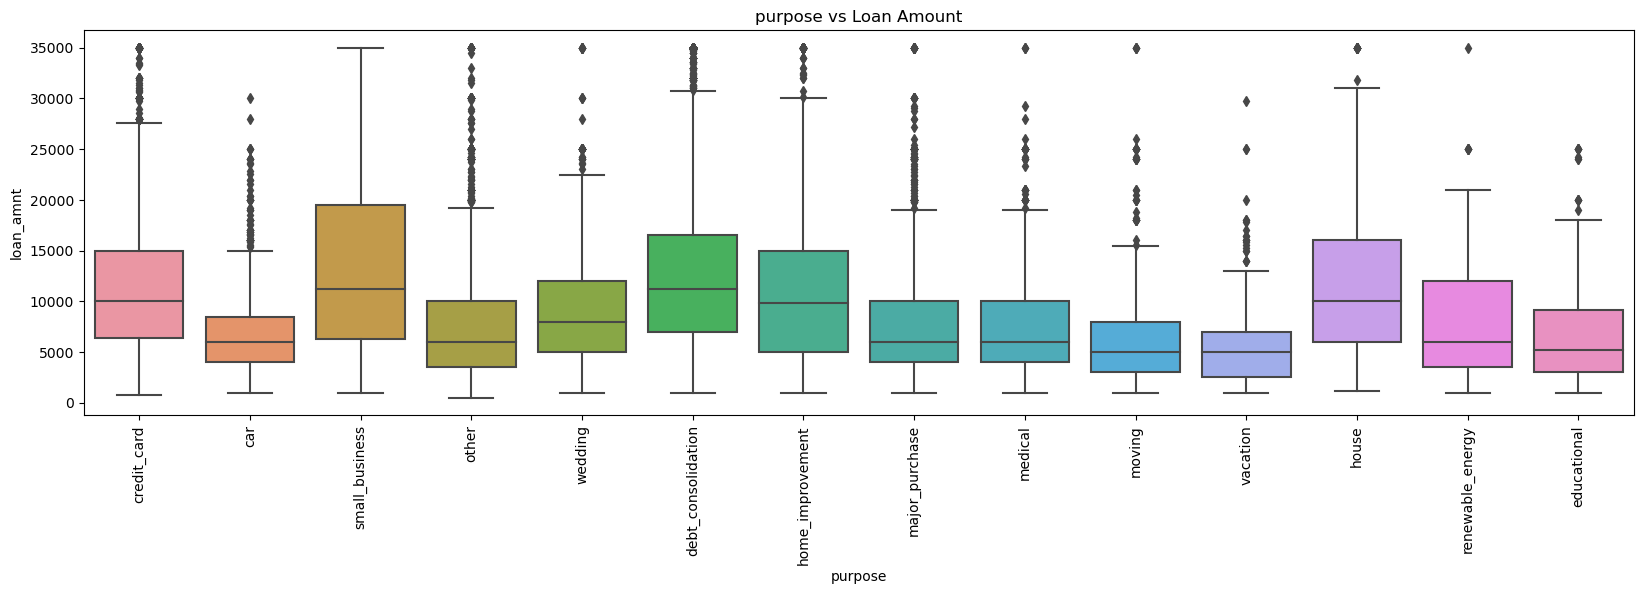

In [64]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_data.loan_amnt, data=loan_data)
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')
plt.show()

**Observations**:  
Most loan amounts are from Small bussiness followed by debt consolidation.

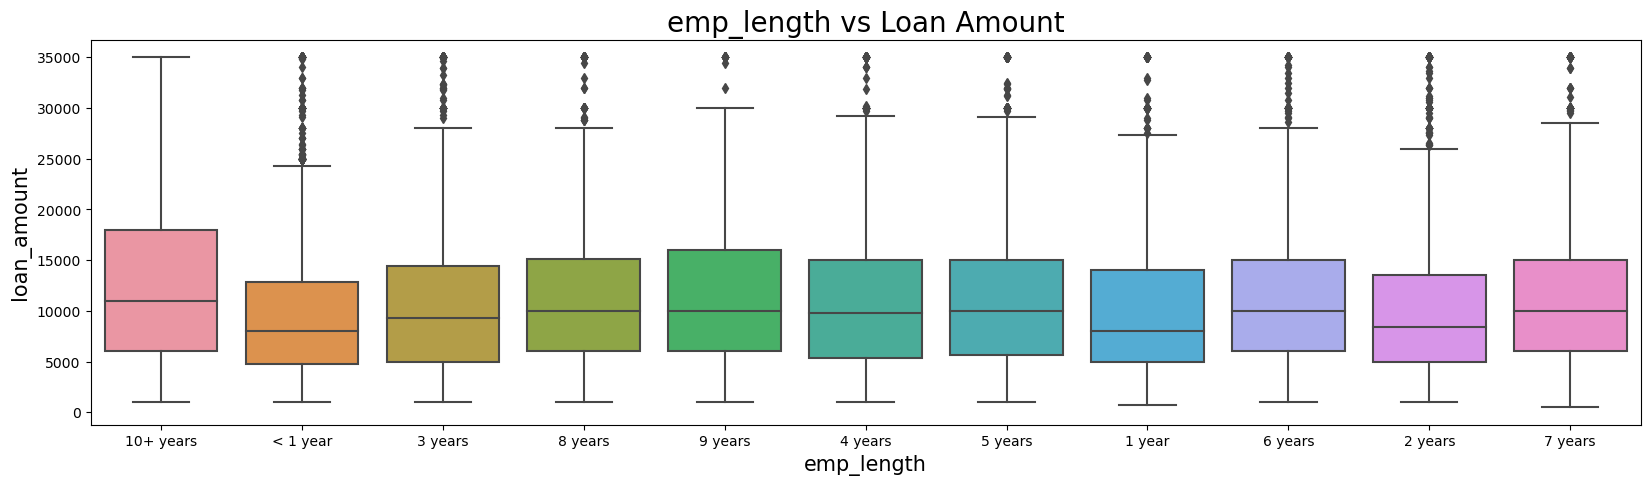

In [65]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan_data.loan_amnt, data=loan_data)
plt.title('emp_length vs Loan Amount', size = 20)
plt.xlabel('emp_length',size=15)
plt.ylabel('loan_amount',size=15)
plt.show()

**Observations**:  
Most borrowers are from 10+ years and least is <1 year.

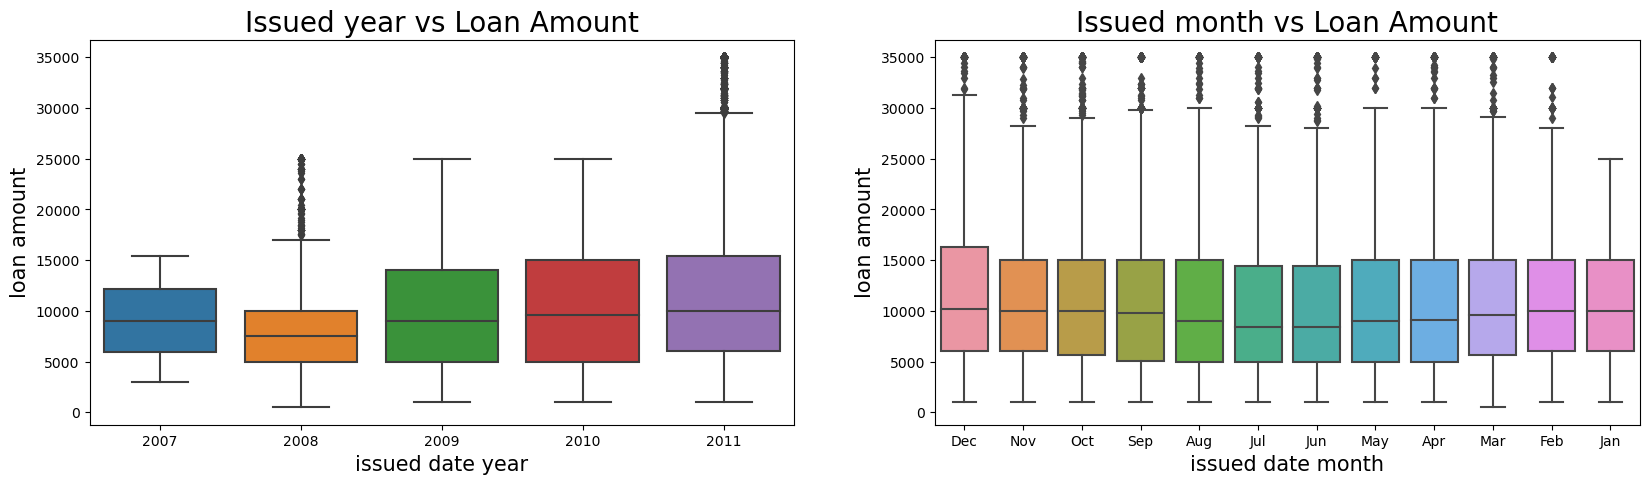

In [66]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=loan_data.issue_d_year, y=loan_data.loan_amnt, data=loan_data)
plt.title('Issued year vs Loan Amount', size = 20)
plt.xlabel('issued date year', size = 15)
plt.ylabel('loan amount', size = 15)
plt.subplot(122)
sns.boxplot(x=loan_data.issue_d_month, y=loan_data.loan_amnt, data=loan_data)
plt.title('Issued month vs Loan Amount', size = 20)
plt.xlabel('issued date month', size = 15)
plt.ylabel('loan amount', size = 15)
plt.show()

**Observations**:<br>
* The median loan amount has remained relatively stable over the years. However, the distribution has become more dispersed in recent years, indicating a greater variety of loan amounts being taken each year.
* Notably, a few borrowers took significantly higher loan amounts in 2008 and 2011, which are identified as outliers.
* Loan amounts have been fairly consistent throughout most months. However, in December, there is a notable increase in loan amounts, with the distribution showing values significantly above the median.

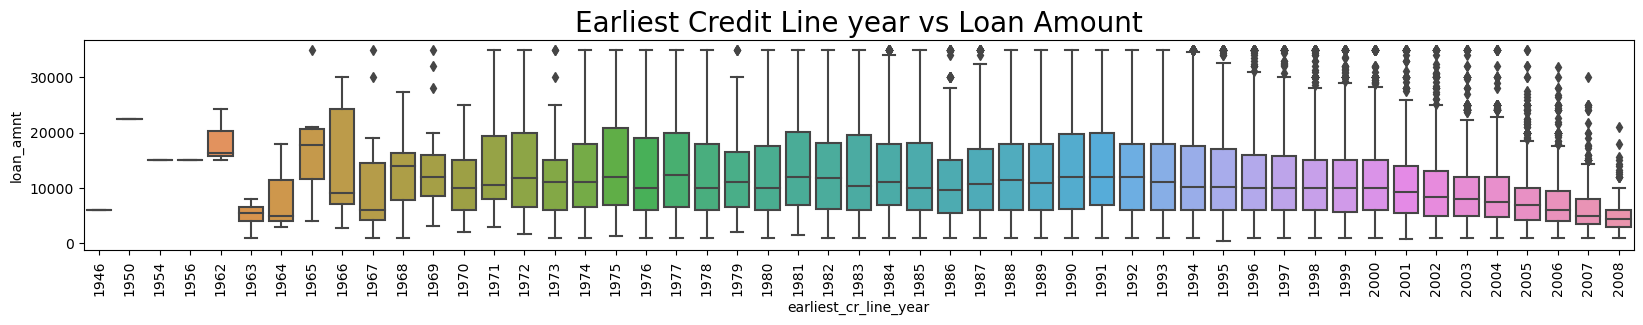

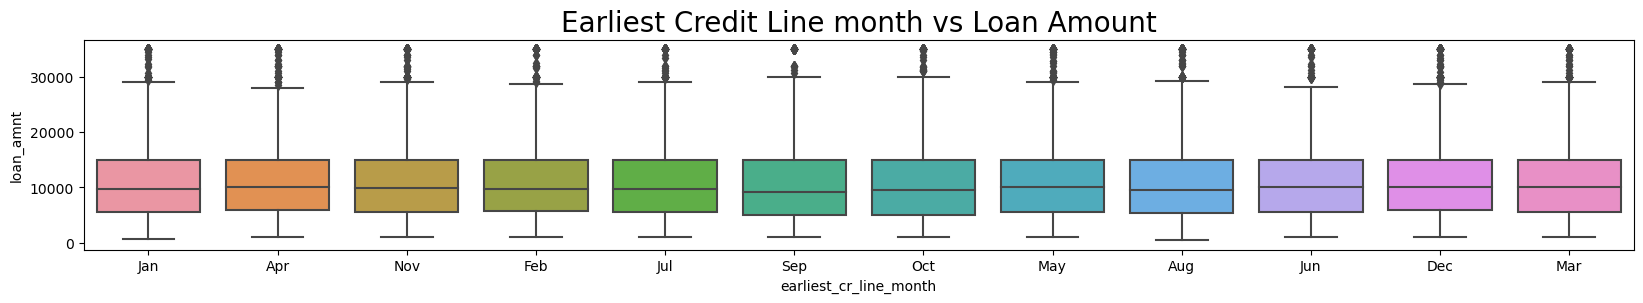

In [67]:
#earliest_cr_line
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=loan_data.earliest_cr_line_year, y=loan_data.loan_amnt, data=loan_data)
plt.xticks(rotation=90)
plt.title('Earliest Credit Line year vs Loan Amount', size = 20)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=loan_data.earliest_cr_line_month, y=loan_data.loan_amnt, data=loan_data)
plt.title('Earliest Credit Line month vs Loan Amount', size = 20)
plt.show()

**Observations**:<br>
Borrowers who established their credit lines as early as 1966 received significantly larger loan amounts compared to other borrowers

### funded_amnt

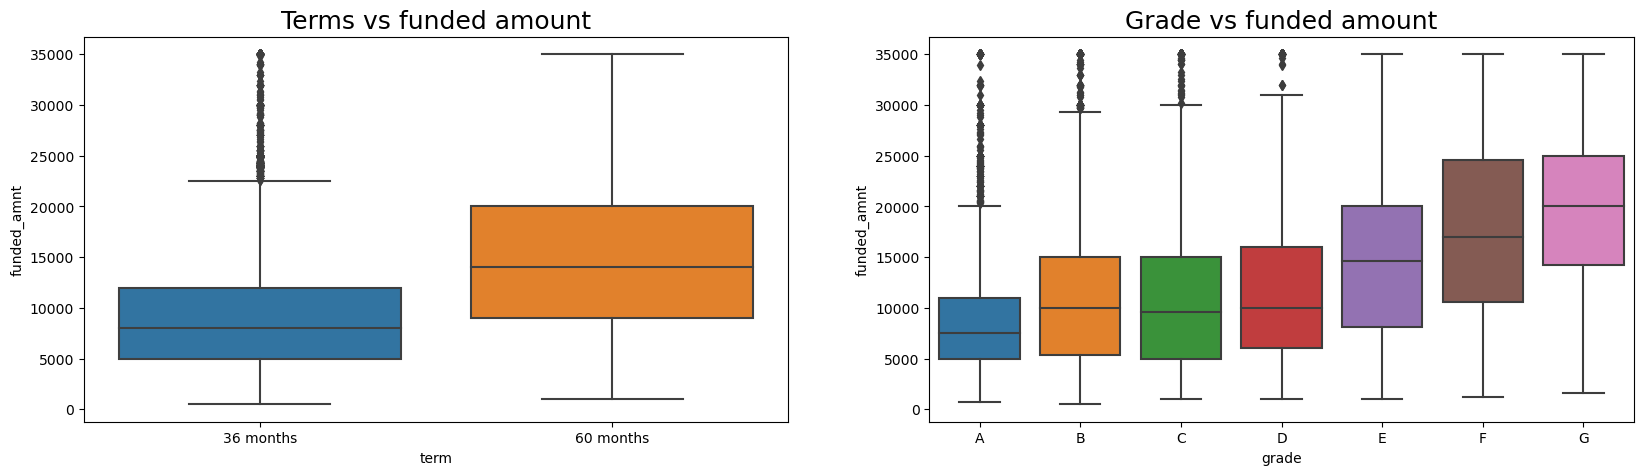

In [68]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_data.funded_amnt, data=loan_data)
plt.title('Terms vs funded amount', size = 18)
plt.subplot(122)
plt.title('Grade vs funded amount', size = 18)
grade_ord = loan_data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_data.funded_amnt, order = grade_ord, data=loan_data)
plt.show()

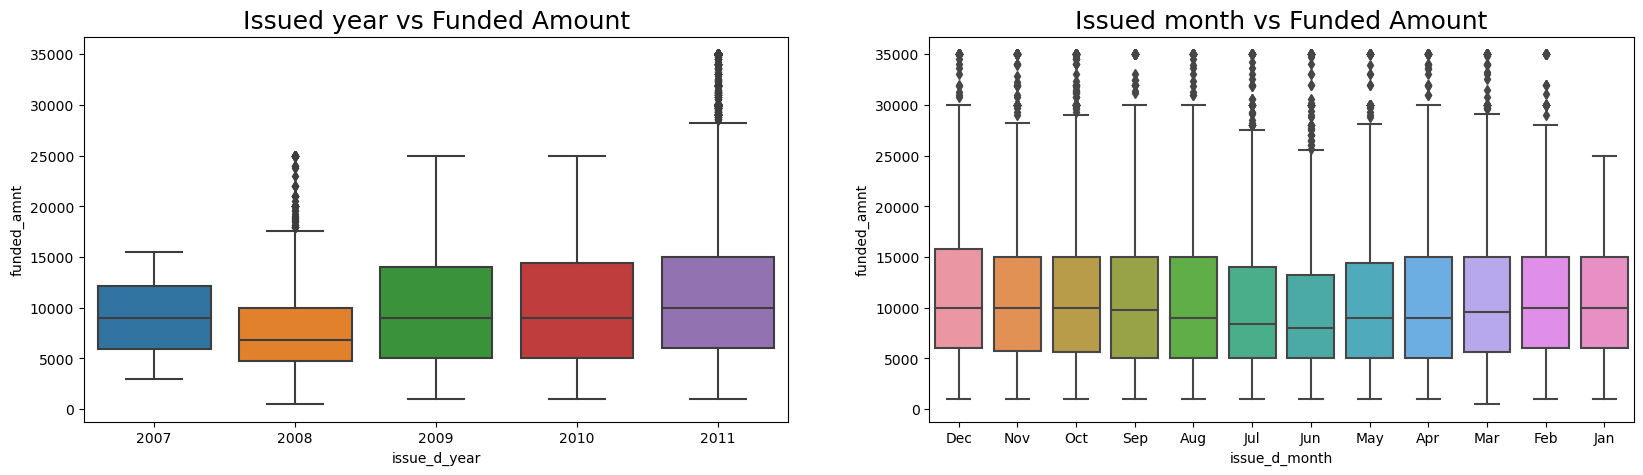

In [69]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=loan_data.issue_d_year, y=loan_data.funded_amnt, data=loan_data)
plt.title('Issued year vs Funded Amount', size = 18)
plt.subplot(122)
sns.boxplot(x=loan_data.issue_d_month, y=loan_data.funded_amnt, data=loan_data)
plt.title('Issued month vs Funded Amount', size = 18)
plt.show()

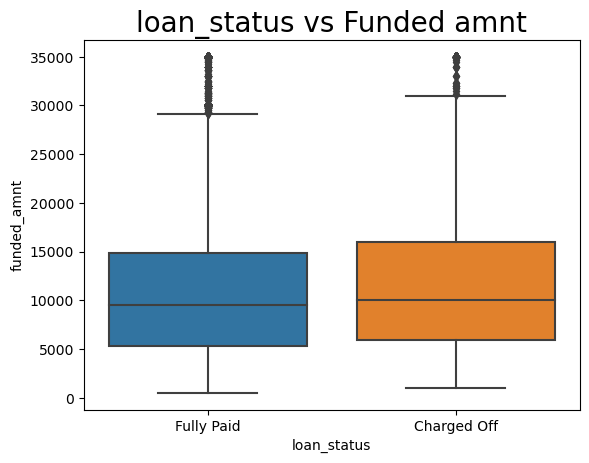

In [70]:
sns.boxplot(x='loan_status', y=loan_data.funded_amnt, data=loan_data)
plt.title('loan_status vs Funded amnt', size = 20)
plt.show()

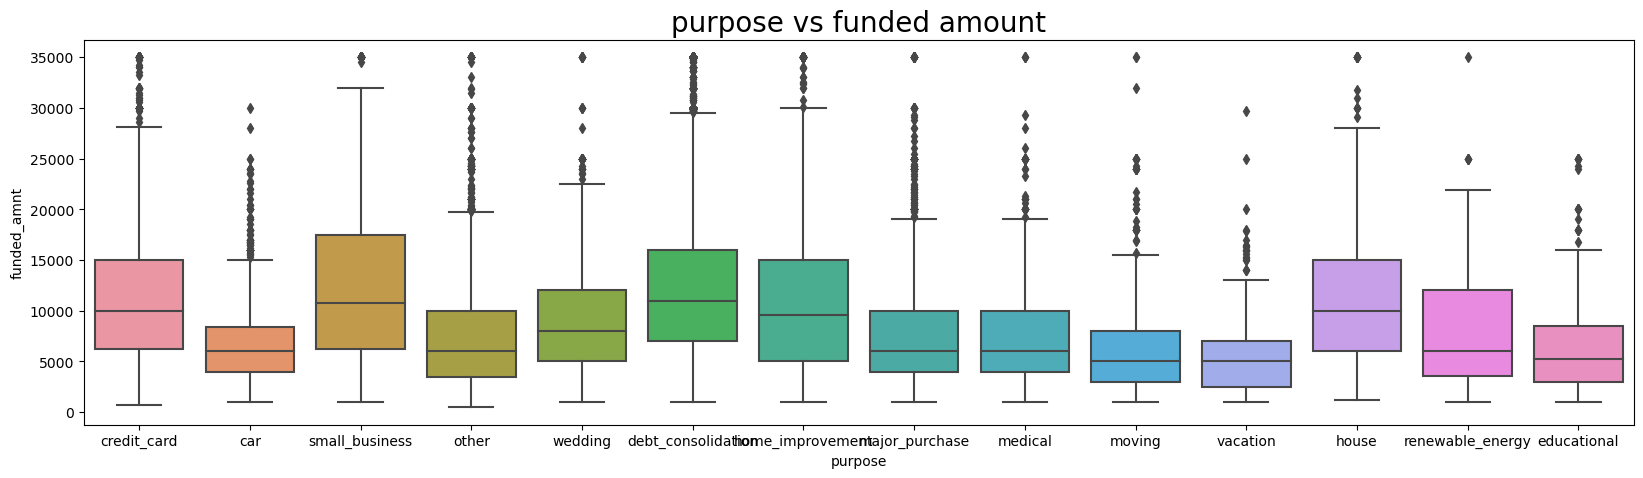

In [71]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_data.funded_amnt, data=loan_data)
plt.title('purpose vs funded amount', size = 20)
plt.show()

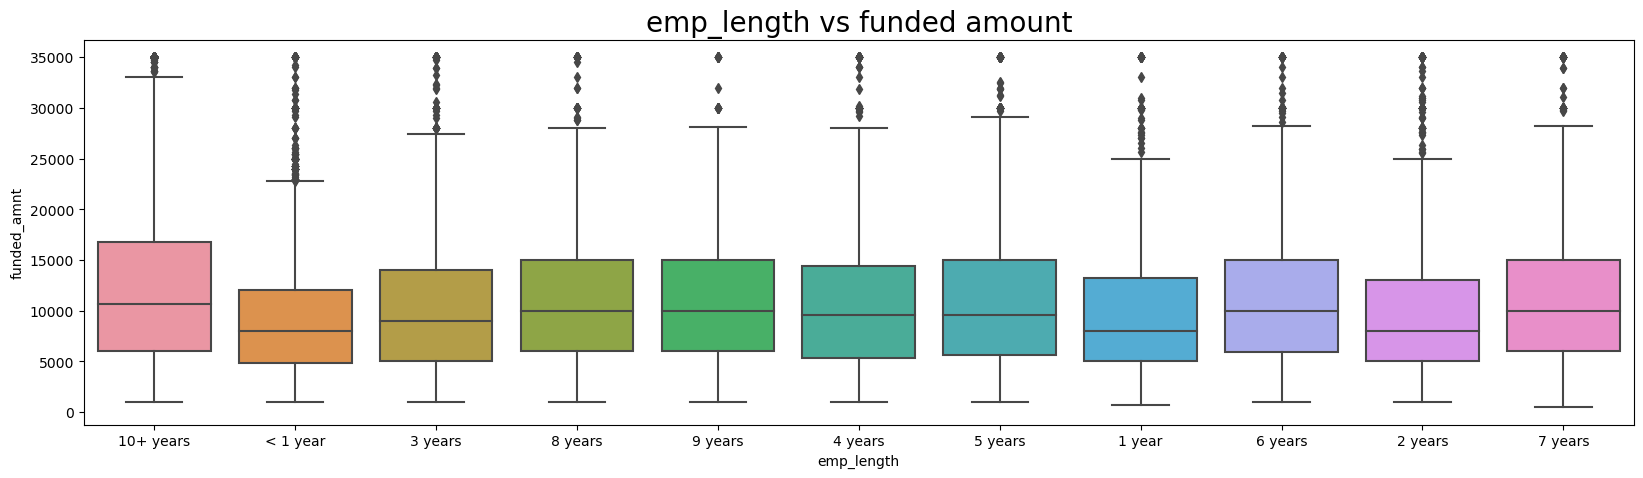

In [72]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan_data.funded_amnt, data=loan_data)
plt.title('emp_length vs funded amount', size = 20)
plt.show()

**Observations**:<br>
The Funded Amount exhibits patterns and behaviors comparable to those observed in the Loan Amount.

### int_rate

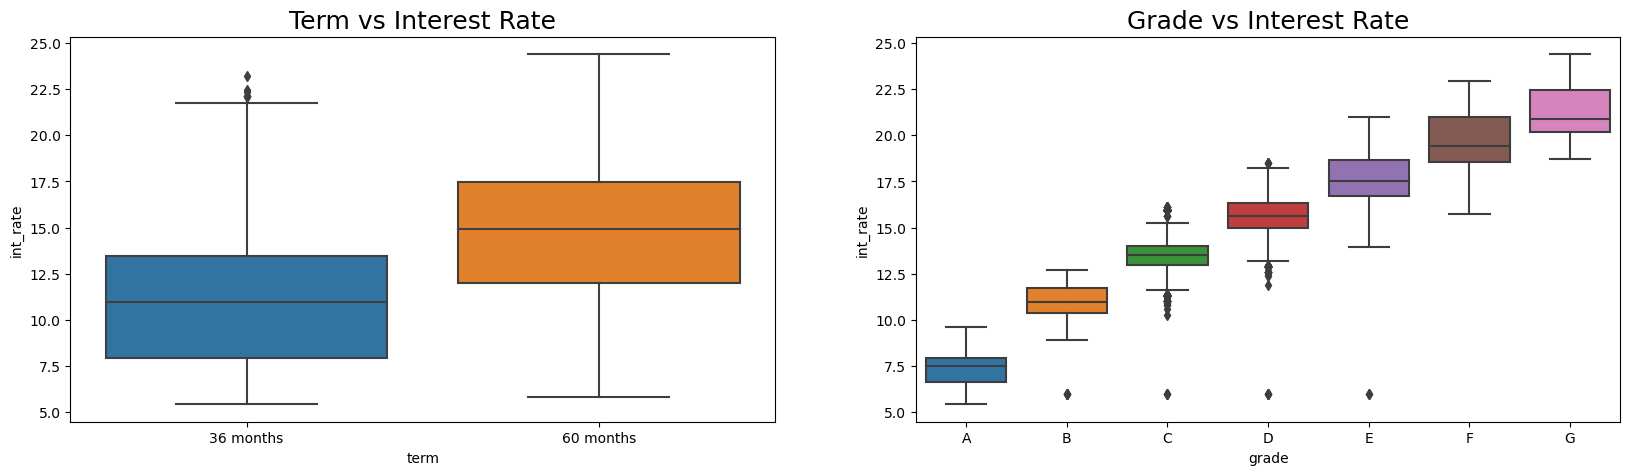

In [73]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_data.int_rate, data=loan_data)
plt.title('Term vs Interest Rate', size = 18)
plt.subplot(122)
plt.title('Grade vs Interest Rate', size = 18)
grade_ord = loan_data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_data.int_rate, order = grade_ord, data=loan_data)
plt.show()

**Observations**:  
Interest rates tend to increase for loans with longer tenures. Additionally, as loan grades decline from A to G, interest rates also rise.

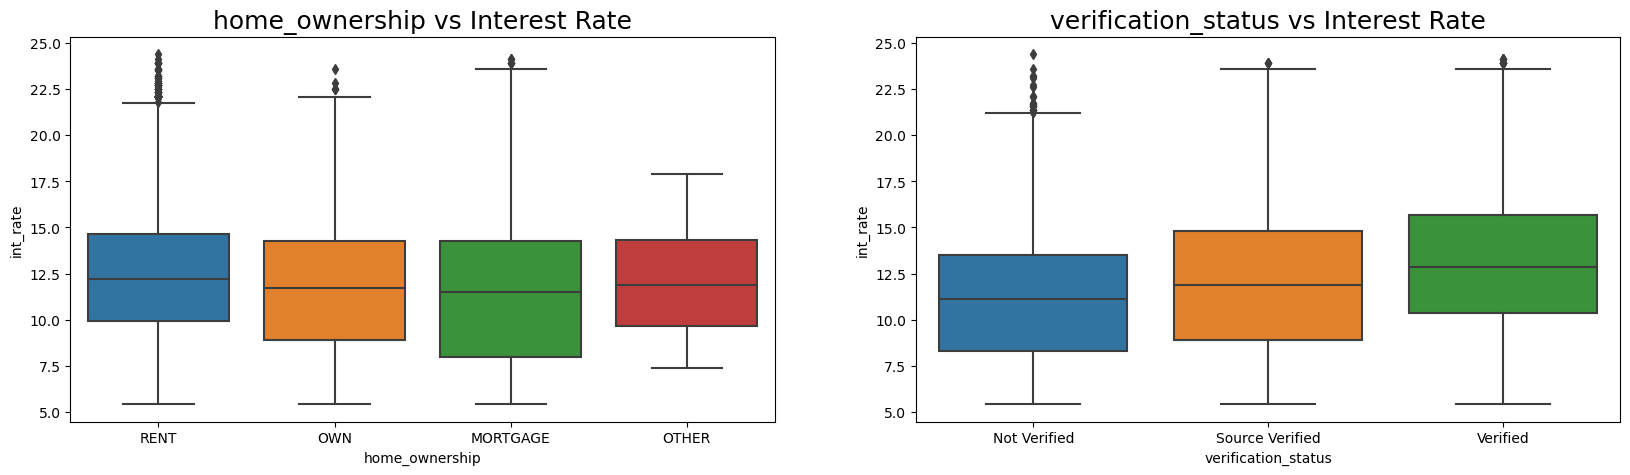

In [74]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan_data.int_rate, data=loan_data)
plt.title('home_ownership vs Interest Rate', size = 18)
plt.subplot(122)
plt.title('verification_status vs Interest Rate', size = 18)
verification_status_ord = loan_data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan_data.int_rate, order = verification_status_ord, data=loan_data)
plt.show()

**Observations**:  
Borrowers who provide their own assets (such as home equity or property) or have a mortgage tend to receive loans at lower interest rates.
The presence of collateral provides lenders with confidence, as they can recover the loan amount by seizing the asset in case of defaulrs:
Interestingly, non-verified borrowers (those without extensive documentation) often receive loans at lower interest rates compared to verified and source-verified borrowers.
This suggests that lenders may prioritize other factors (such as credit history or income stability) over strict verification processes when determining interest rates.

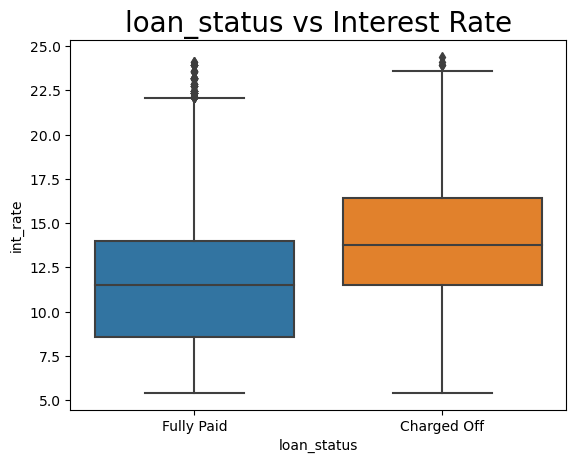

In [75]:
sns.boxplot(x='loan_status', y=loan_data.int_rate, data=loan_data)
plt.title('loan_status vs Interest Rate', size = 20)
plt.show()

**Observations**:  
This implies that greater the interest rates, greater the chances of Defaulting the loan.

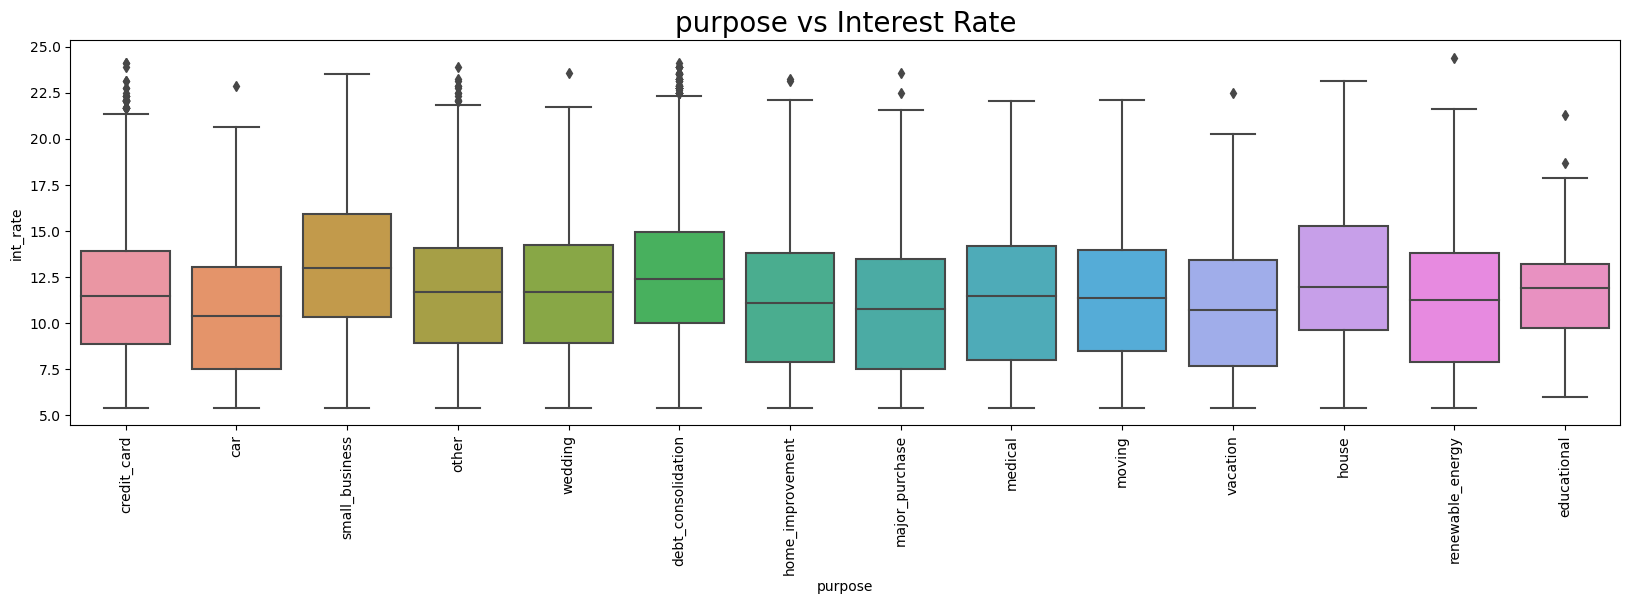

In [76]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_data.int_rate, data=loan_data)
plt.xticks(rotation=90)
plt.title('purpose vs Interest Rate', size = 20)
plt.show()

**Observations**:  
Small Business, Debt Consolidation and House loans are given out with interest rates.

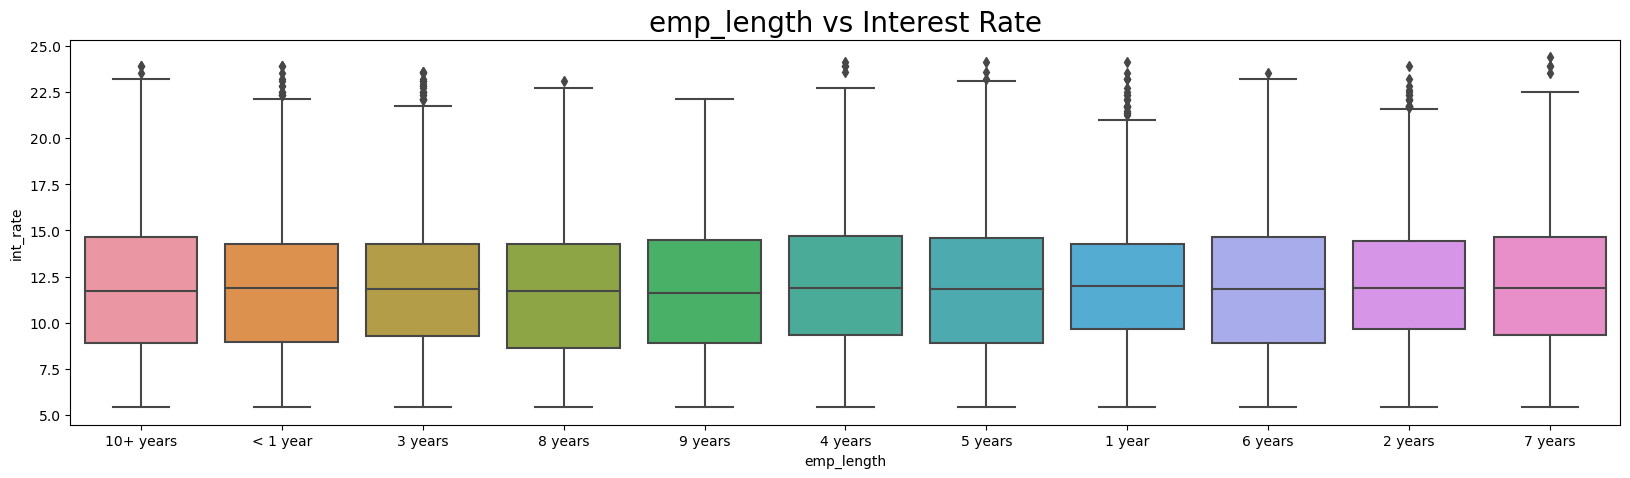

In [77]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan_data.int_rate, data=loan_data)
plt.title('emp_length vs Interest Rate', size = 20)
plt.show()

**Observations**:  
The correlation between employment length and interest rates appears to be elusive. Despite initial expectations, the data does not reveal a strong or straightforward relationship between these two factors.

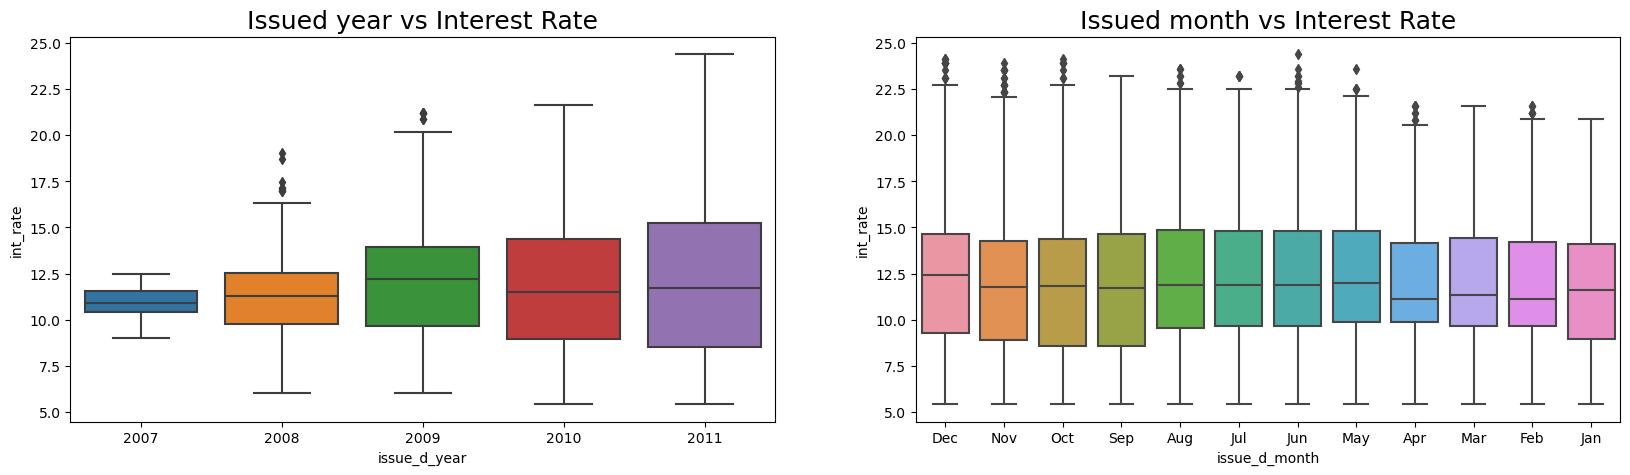

In [78]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=loan_data.issue_d_year, y=loan_data.int_rate, data=loan_data)
plt.title('Issued year vs Interest Rate', size = 18)
plt.subplot(122)
sns.boxplot(x=loan_data.issue_d_month, y=loan_data.int_rate, data=loan_data)
plt.title('Issued month vs Interest Rate', size = 18)
plt.show()

**Observations**:  
As business tenure increases, interest rates exhibit greater diversity. However, the median interest rate remains relatively consistent across all years.


# annual_inc:

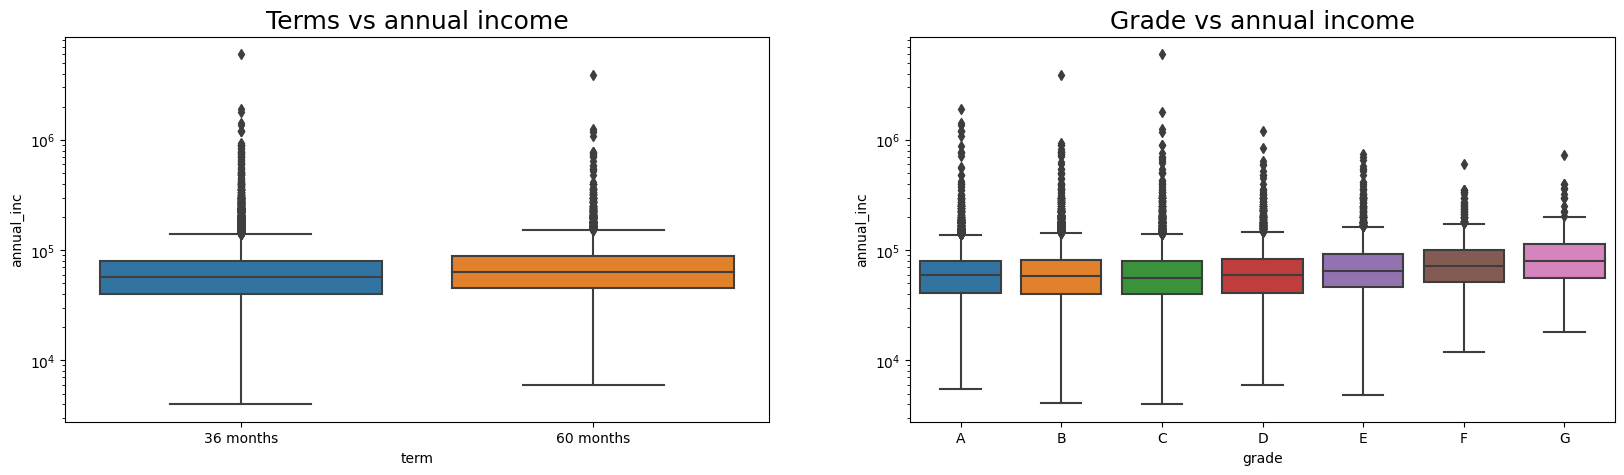

In [79]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_data.annual_inc, data=loan_data)
plt.title('Terms vs annual income', size = 18)
plt.yscale('log')
plt.subplot(122)
plt.title('Grade vs annual income', size = 18)
grade_ord = loan_data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_data.annual_inc, order = grade_ord, data=loan_data)
plt.yscale('log')
plt.show()

**Observations:**  
Annual income is higher for lower grades.

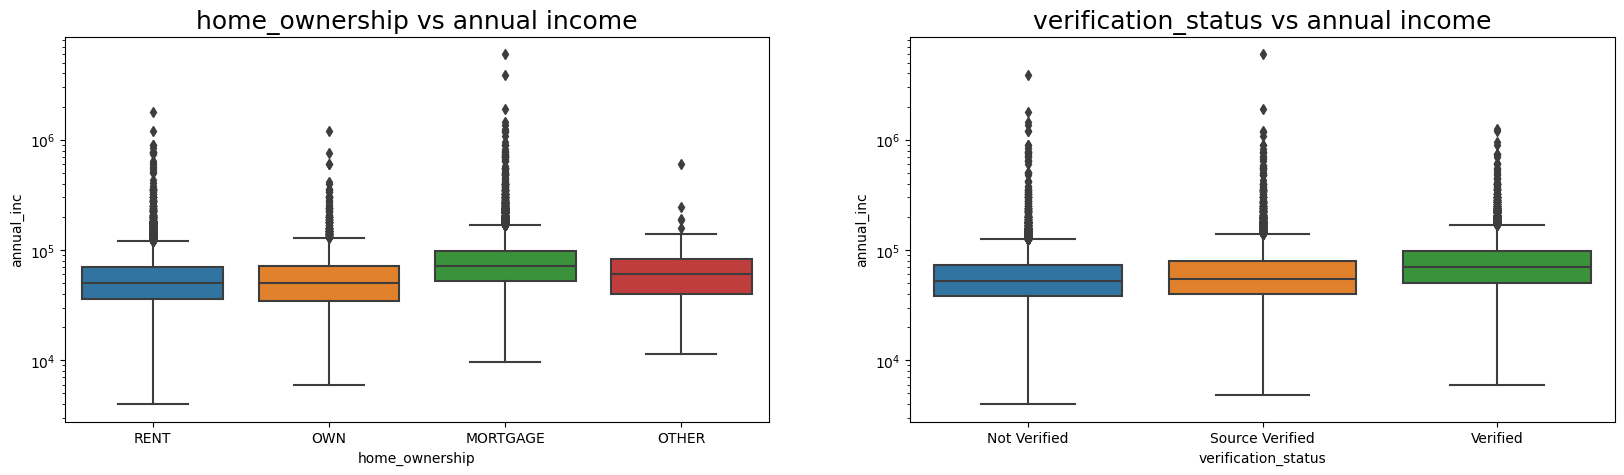

In [80]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan_data.annual_inc, data=loan_data)
plt.title('home_ownership vs annual income', size = 18)
plt.yscale('log')
plt.subplot(122)
plt.title('verification_status vs annual income', size = 18)
verification_status_ord = loan_data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan_data.annual_inc, order = verification_status_ord, data=loan_data)
plt.yscale('log')
plt.show()

**Observations:**  
Borrowers who own homes or have a mortgage tend to have higher incomes. Borrowers with higher annual incomes are more likely to have their income sources verified.ity.

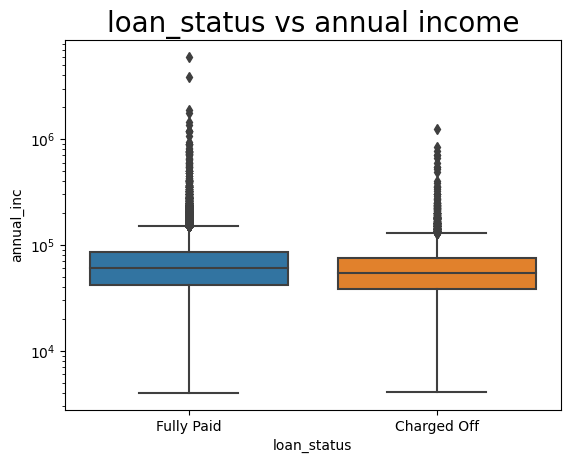

In [81]:
sns.boxplot(x='loan_status', y=loan_data.annual_inc, data=loan_data)
plt.title('loan_status vs annual income', size = 20)
plt.yscale('log')
plt.show()

**Observations:**    
Current status of the loan is Fully paid for most of the borrower's who have higher annual incomes.  

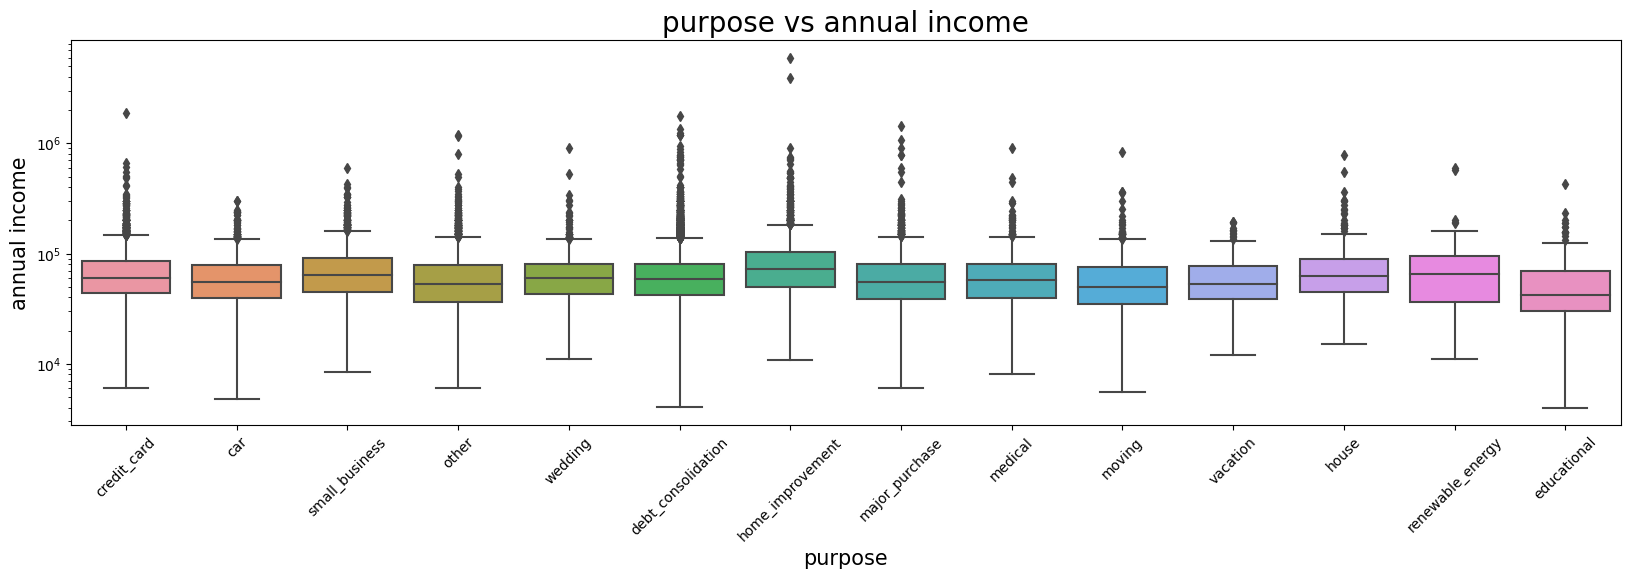

In [82]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_data.annual_inc, data=loan_data)
plt.xticks(rotation=45)
plt.title('purpose vs annual income', size = 20)
plt.xlabel("purpose", size = 15)
plt.ylabel("annual income", size = 15)
plt.yscale('log')
plt.show()

**Observations:**  
The category belonging to Renewable energy, small business and home improvements have higher annual income provided by the borrower for the loan request. 

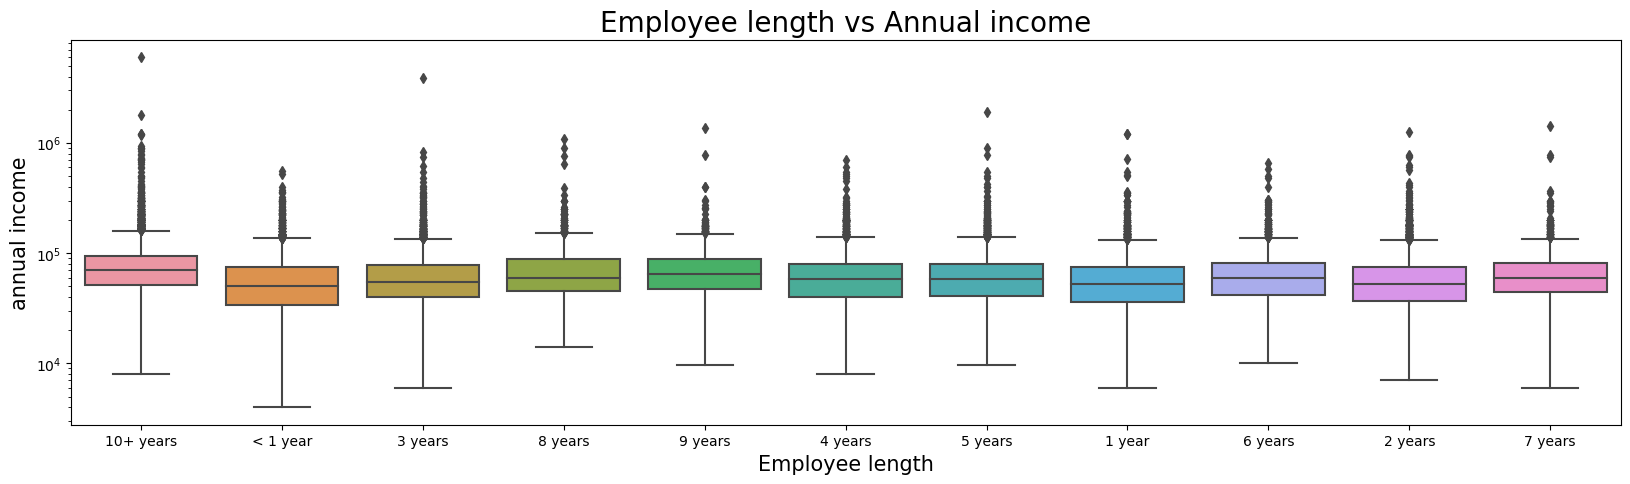

In [83]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan_data.annual_inc, data=loan_data)
plt.title('Employee length vs Annual income', size = 20)
plt.xlabel("Employee length", size = 15)
plt.ylabel("annual income", size = 15)
plt.yscale('log')
plt.show()

**Observations:**  
The borrowers who have higer income have taken loans for 10+ years of duration.

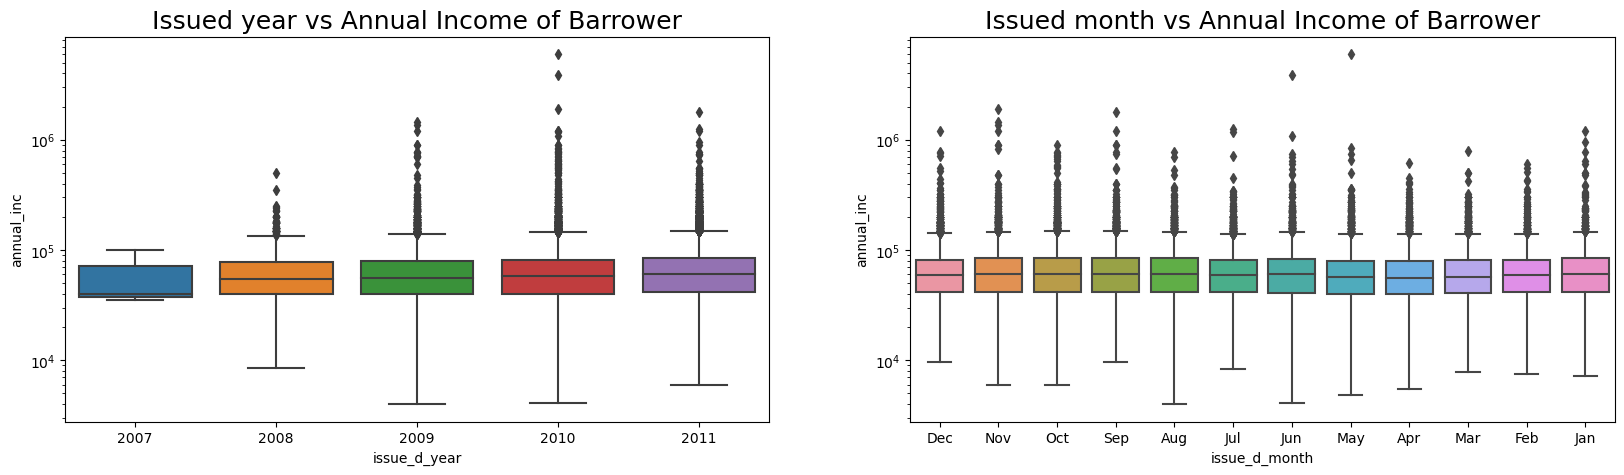

In [84]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=loan_data.issue_d_year, y=loan_data.annual_inc, data=loan_data)
plt.title('Issued year vs Annual Income of Barrower', size = 18)
plt.yscale('log')
plt.subplot(122)
sns.boxplot(x=loan_data.issue_d_month, y=loan_data.annual_inc, data=loan_data)
plt.title('Issued month vs Annual Income of Barrower', size = 18)
plt.yscale('log')
plt.show()

**Observations:**  
Annual income has no impact with the month when the loan was funded.

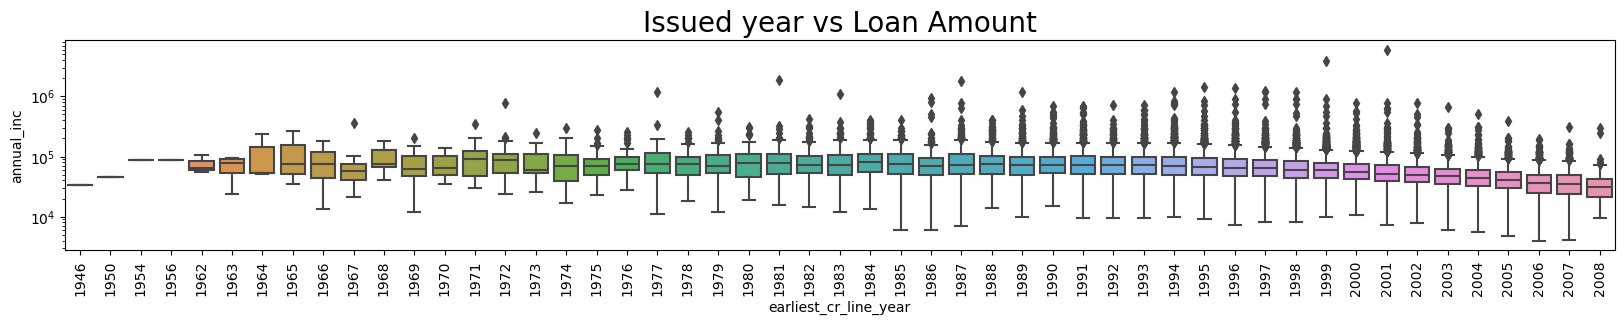

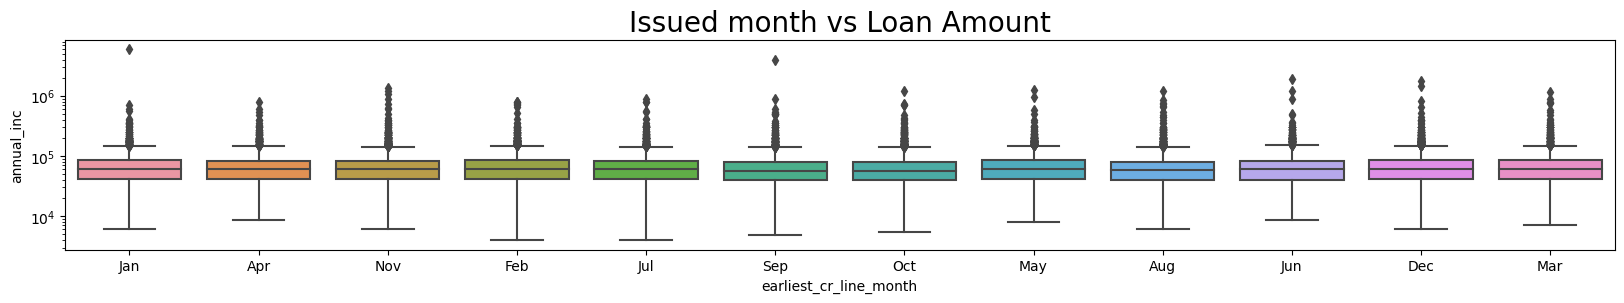

In [85]:
#earliest_cr_line
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=loan_data.earliest_cr_line_year, y=loan_data.annual_inc, data=loan_data)
plt.xticks(rotation=90)
#for better analysis plotting on log scale of y values
plt.yscale('log')
plt.title('Issued year vs Loan Amount', size = 20)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=loan_data.earliest_cr_line_month, y=loan_data.annual_inc, data=loan_data)
plt.title('Issued month vs Loan Amount', size = 20)
plt.yscale('log')
plt.show()

**Observations:**   
There is no such specific pattern in the annual income and earliest Credit line year and month.

# DTI:
Debt to Income Ratio:

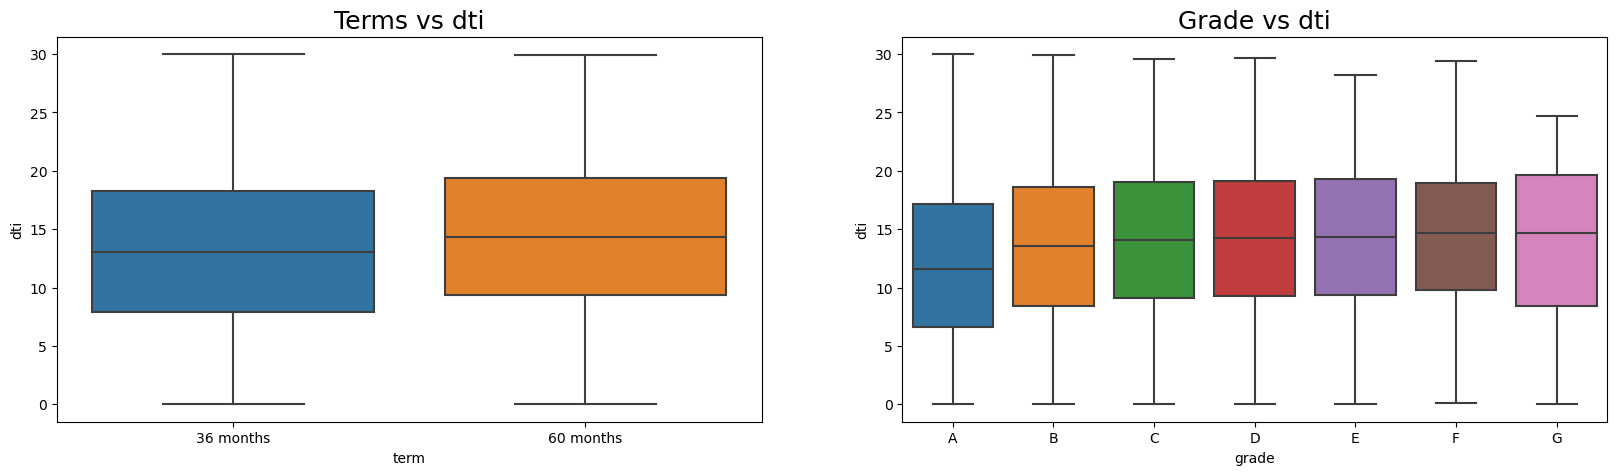

In [86]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan_data.dti, data=loan_data)
plt.title('Terms vs dti', size = 18)
plt.subplot(122)
plt.title('Grade vs dti', size = 18)
grade_ord = loan_data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_data.dti, order = grade_ord, data=loan_data)
plt.show()

**Observations**:   
The DTI is high for borrowers with the loan tenure of 60 months.  
A Grade barrowers have low DTI than other grades. DTI must be low for high repayment percentage.

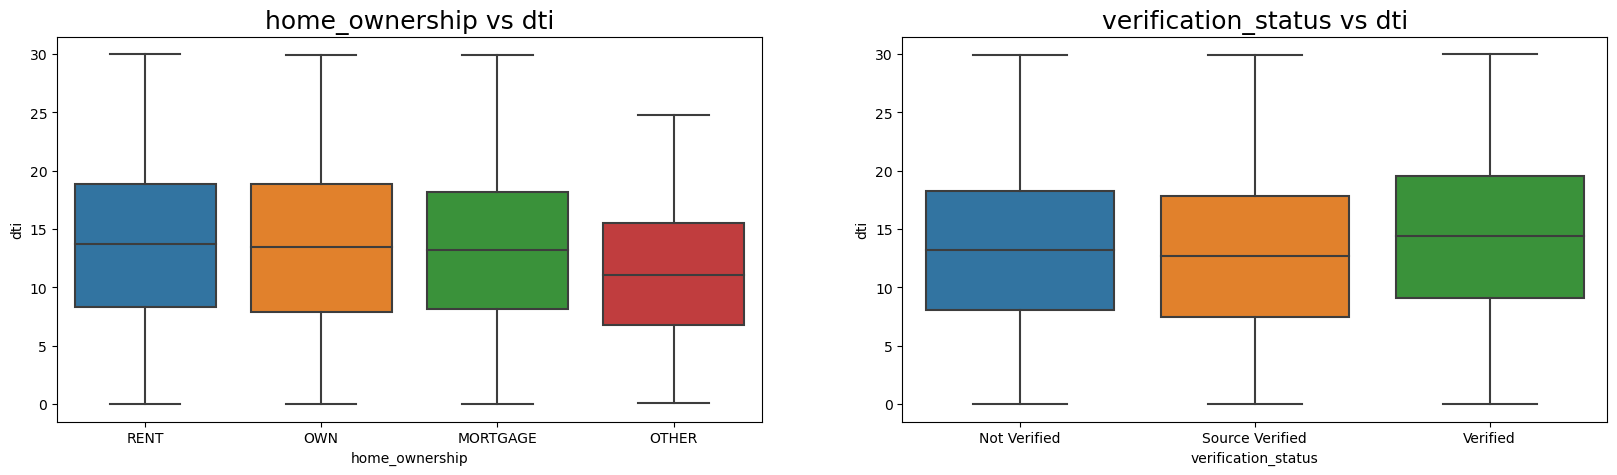

In [87]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan_data.dti, data=loan_data)
plt.title('home_ownership vs dti', size = 18)
plt.subplot(122)
plt.title('verification_status vs dti', size = 18)
verification_status_ord = loan_data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan_data.dti, order = verification_status_ord, data=loan_data)
plt.show()

**Observations**:  
Borrowers with home ownership have less DTI than others. The cause of this might be that other borrowers have mortgage and home loans.

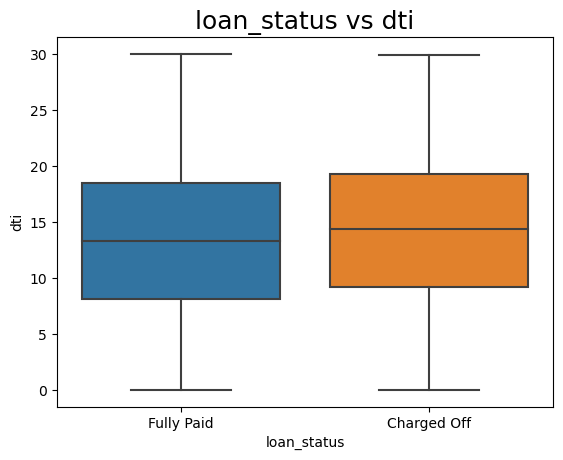

In [88]:
sns.boxplot(x='loan_status', y=loan_data.dti, data=loan_data)
plt.title('loan_status vs dti', size = 18)
plt.show()

**Observations**  
Borrowers with high DTI have more probability to default.

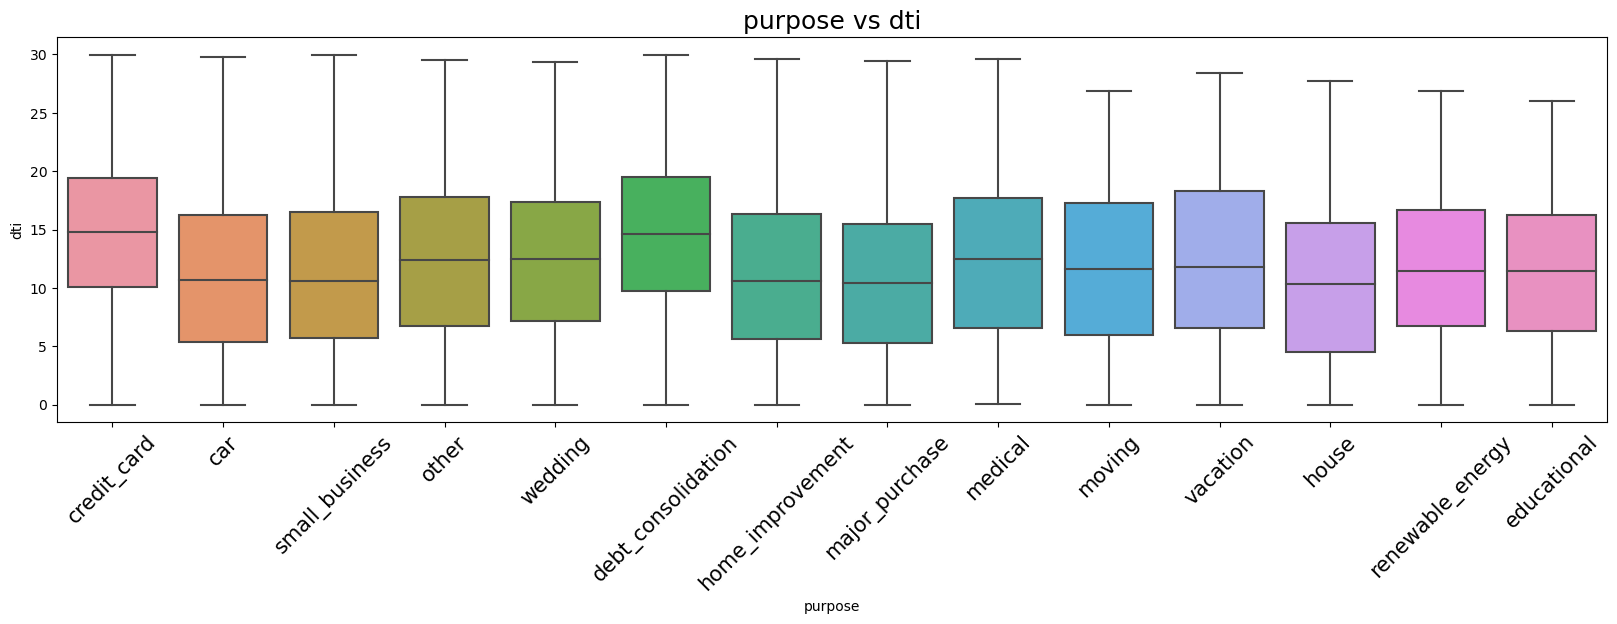

In [89]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan_data.dti, data=loan_data)
plt.xticks(rotation=45, size = 15)
plt.title('purpose vs dti', size = 18)
plt.show()

**Observations**:  
Borrowers who took loan for _credit card_ and _debt consolidation_ purpose have more DTI compared to other purposes.

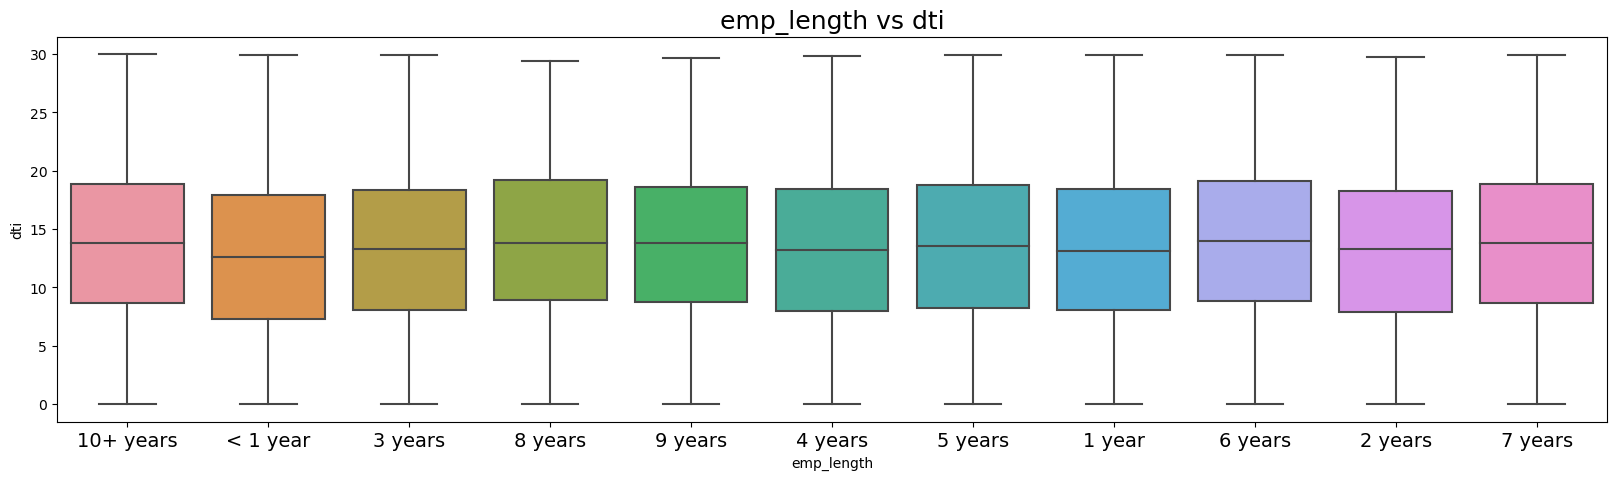

In [90]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan_data.dti, data=loan_data)
plt.title('emp_length vs dti', size = 18)
plt.xticks(size = 14)
plt.show()

**Observations**:   
The dti is similar for Borrowers with all the employment length.

# pub_rec:
Number of derogatory public records:

In [91]:
#Finding proportation of values in each value of category
df = loan_data.groupby(['pub_rec', 'term'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
df

pub_rec       term     id  proportion
0        0  36 months  26152    0.749964
1        0  60 months   8719    0.250036
2        1  36 months   1349    0.719467
3        1  60 months    526    0.280533
4        2  36 months     36    0.800000
5        2  60 months      9    0.200000
6        3  36 months      7    1.000000
7        4  36 months      2    1.000000

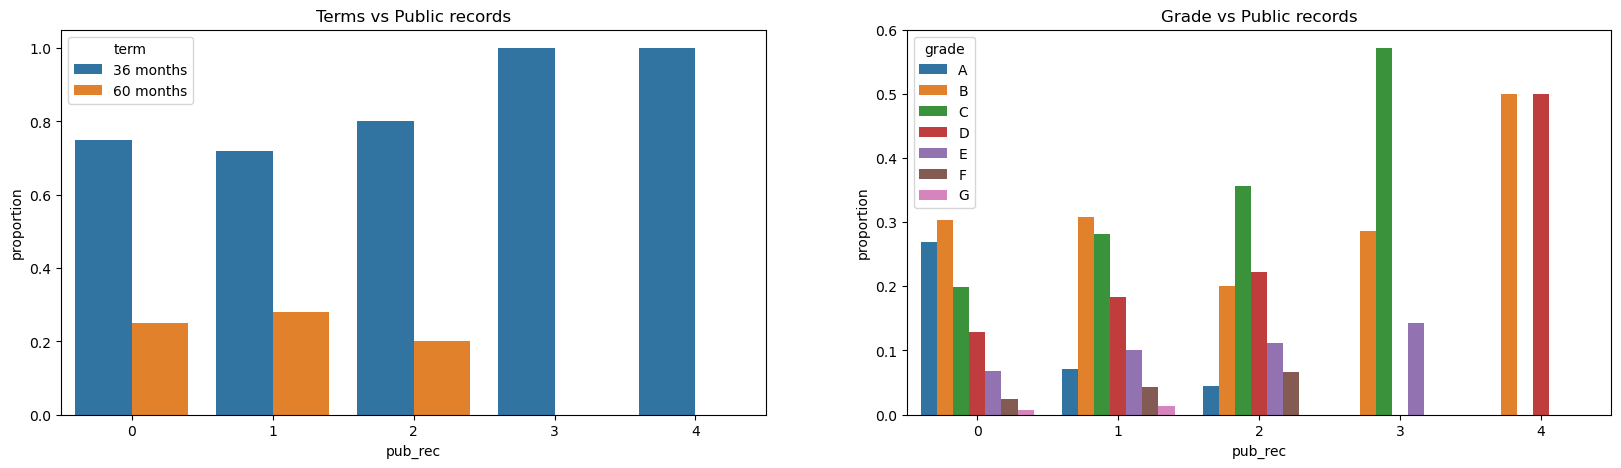

In [92]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='term', data=df)
plt.title('Terms vs Public records')

df = loan_data.groupby(['pub_rec', 'grade'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
plt.subplot(122)
plt.title('Grade vs Public records')
grade_ord = loan_data.grade.unique()
grade_ord.sort()
sns.barplot(x='pub_rec', y='proportion', hue='grade', data=df)
plt.show()

**Observations**:  
* Borrwers higher public derogatory records took loan for a tenure of 36 months. Where as 80% and 20% distribution between 36 and 60 months tenure for lower public derogatory records borrowers.  
* It is observed that the grades are showing some pattern. A grade people have less derogatory records compared other grades.  
* Exceptionally C,D,E graded people have high pub_recs.

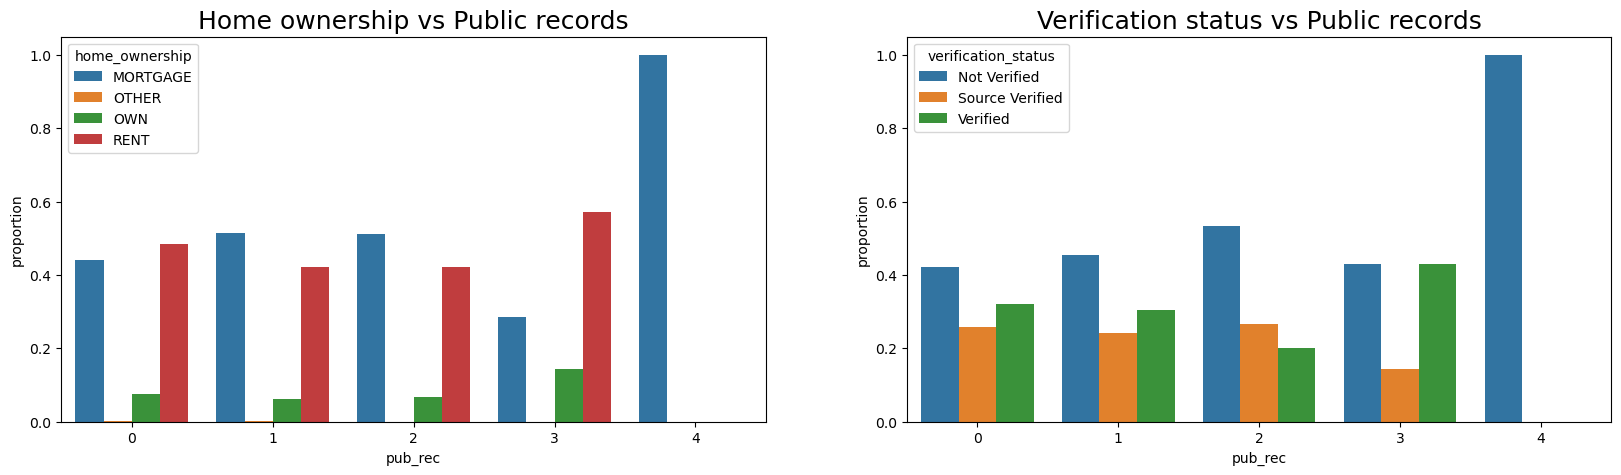

In [93]:
plt.figure(figsize=(20,5))
plt.subplot(121)

df = loan_data.groupby(['pub_rec', 'home_ownership'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
sns.barplot(x='pub_rec', y='proportion', hue='home_ownership', data=df)
plt.title('Home ownership vs Public records', size = 18)

df = loan_data.groupby(['pub_rec', 'verification_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
plt.subplot(122)
sns.barplot(x='pub_rec', y='proportion', hue='verification_status', data=df)

plt.title('Verification status vs Public records', size = 18)
plt.show()

**Observations**:  
Borrowers with 4 public Derogatory records are high in mortgage owned house category, and Not verified Catogry of verification status.

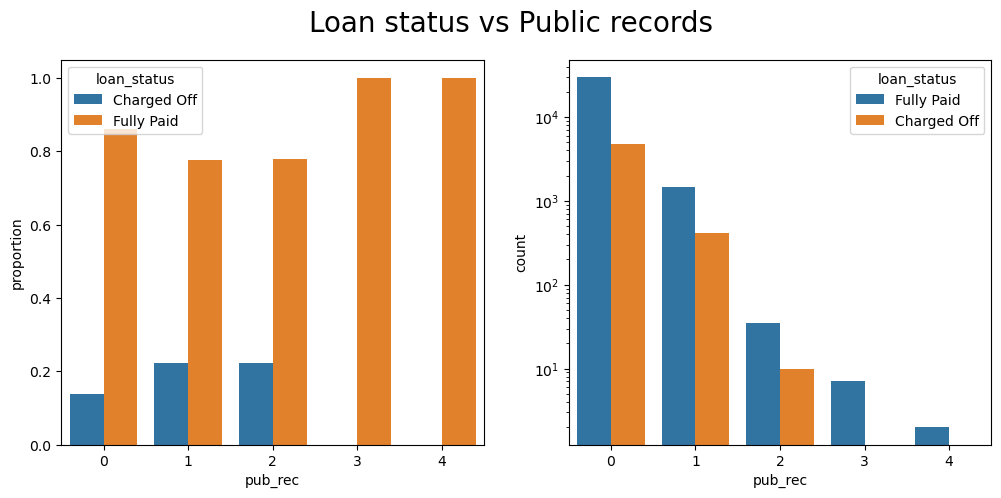

In [94]:
total_counts = loan_data['pub_rec'].value_counts()
loan_status_counts = loan_data.groupby(['pub_rec', 'loan_status']).size()

proportions = loan_status_counts.div(total_counts, level='pub_rec').reset_index(name='proportion')

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='loan_status', data=proportions)

plt.subplot(122)
sns.countplot(x='pub_rec', hue='loan_status', data=loan_data)
plt.yscale('log')

plt.suptitle('Loan status vs Public records', size=20)
plt.show()

**Observations**:  
There is an increase in deafulted loans for Borrowers with derogatory records from 0 to 2, but not for pub_rec 3 and 4, the cause of this must be that very few people took loans in those pub_rec numbers, where most borrowers are in 0 pub_rec category.

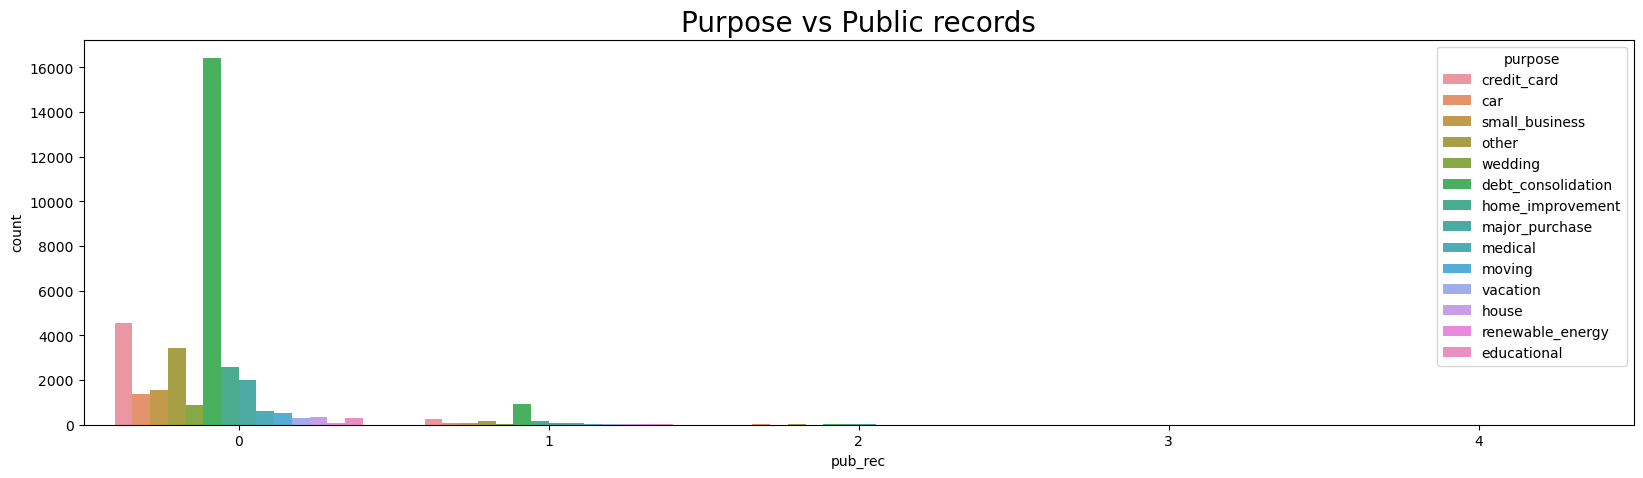

In [95]:
plt.figure(figsize=(20, 5))
sns.countplot(x='pub_rec', hue='purpose', data=loan_data)
plt.title('Purpose vs Public records', size=20)
plt.show()

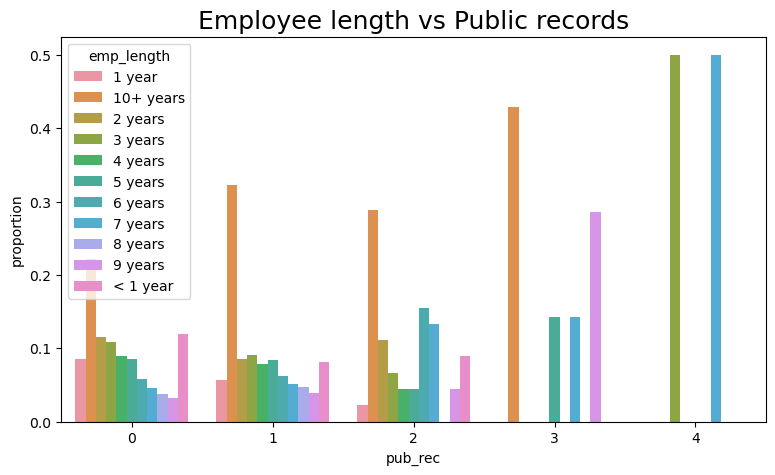

In [96]:
plt.figure(figsize=(20,5))
#Proportion of values for each category
df = loan_data.groupby(['pub_rec', 'emp_length'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())

plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='emp_length', data=df)
plt.title('Employee length vs Public records', size = 18)
plt.show()

# pub_rec_bankruptcies:
Number of public record bankruptcies:

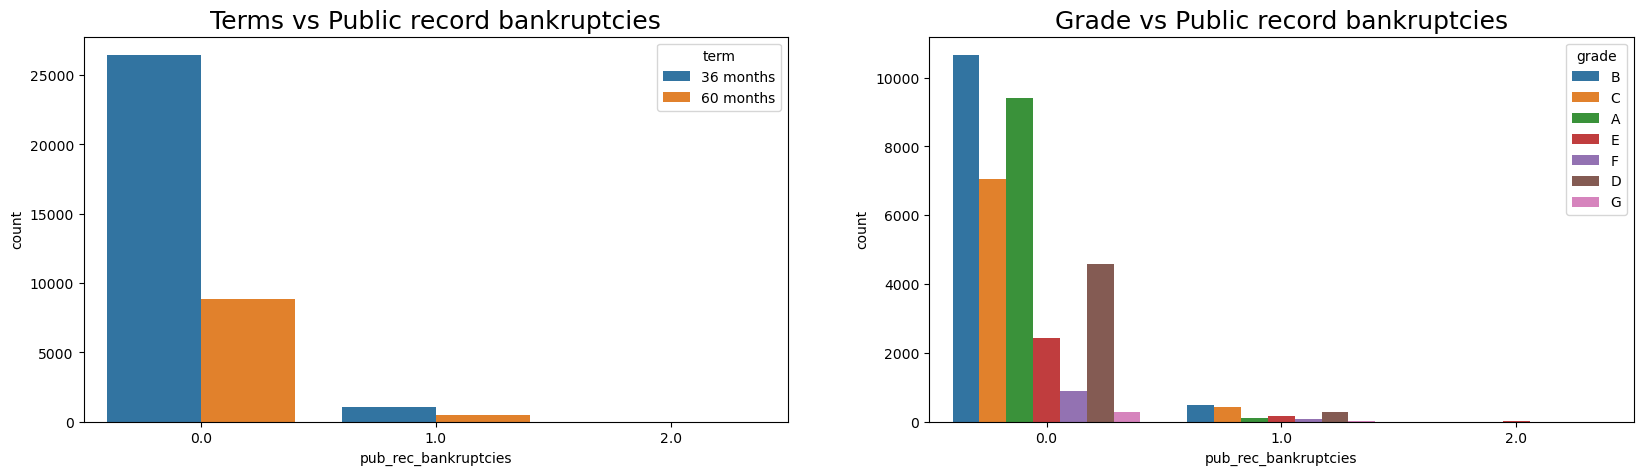

In [97]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(x='pub_rec_bankruptcies', hue='term', data=loan_data)
plt.title('Terms vs Public record bankruptcies', size = 18)
plt.subplot(122)
plt.title('Grade vs Public record bankruptcies', size = 18)
grade_ord = loan_data.grade.unique()
grade_ord.sort()
sns.countplot(x= 'pub_rec_bankruptcies', hue='grade', data=loan_data)
plt.show()

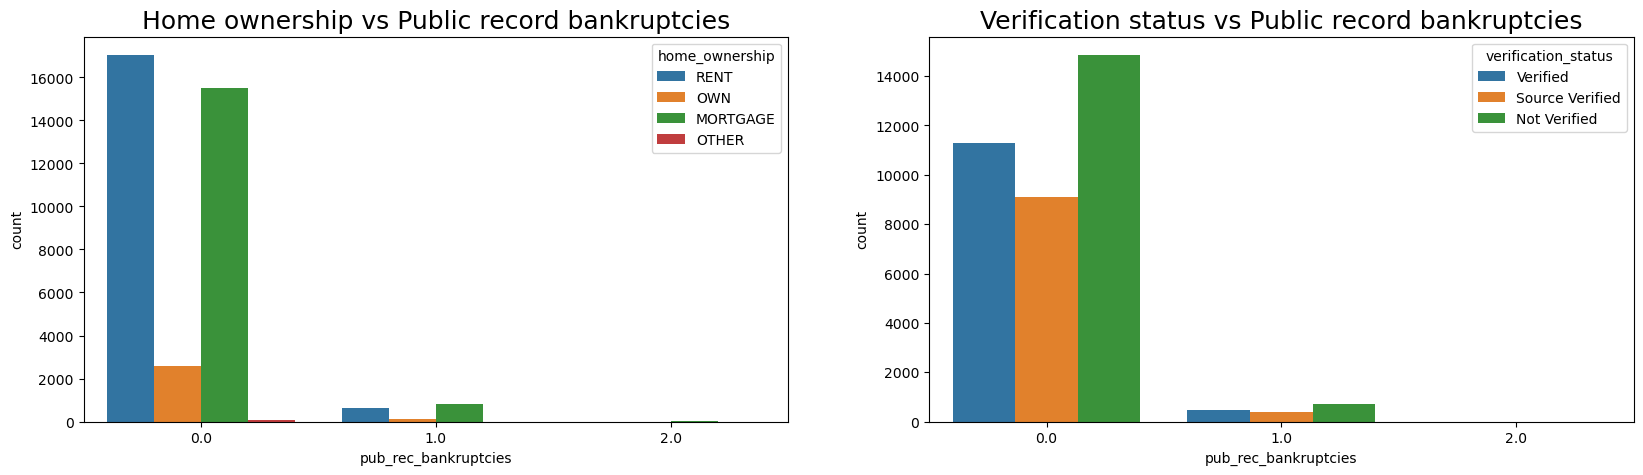

In [98]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(x = 'pub_rec_bankruptcies', hue='home_ownership', data=loan_data)
plt.title('Home ownership vs Public record bankruptcies', size = 18)
plt.subplot(122)
plt.title('Verification status vs Public record bankruptcies', size = 18)
verification_status_ord = loan_data.verification_status.unique()
verification_status_ord.sort()
sns.countplot(x = 'pub_rec_bankruptcies', hue='verification_status', data=loan_data)
plt.show()

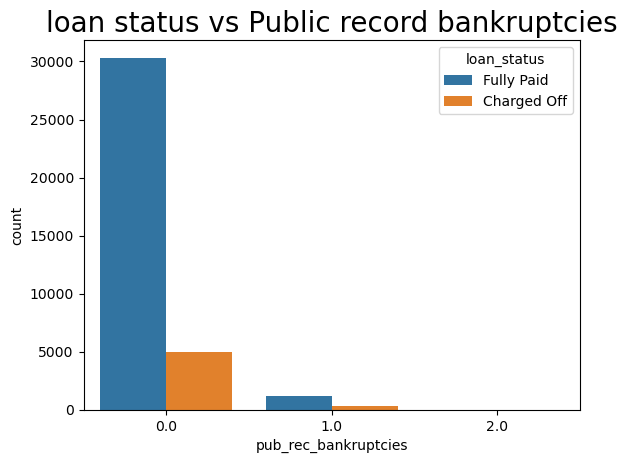

In [99]:
sns.countplot(x = 'pub_rec_bankruptcies', hue='loan_status', data=loan_data)
plt.title('loan status vs Public record bankruptcies', size = 20)
plt.show()

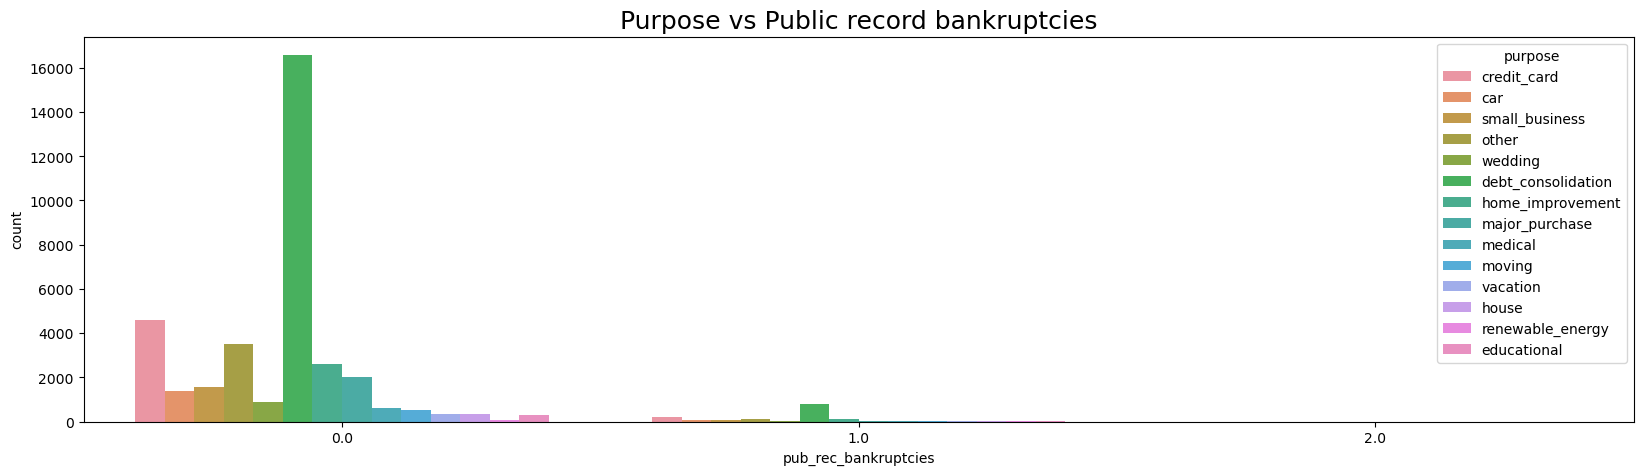

In [100]:
plt.figure(figsize=(20,5))
sns.countplot(x = 'pub_rec_bankruptcies', hue='purpose', data=loan_data)
plt.title('Purpose vs Public record bankruptcies', size = 18)
plt.show()

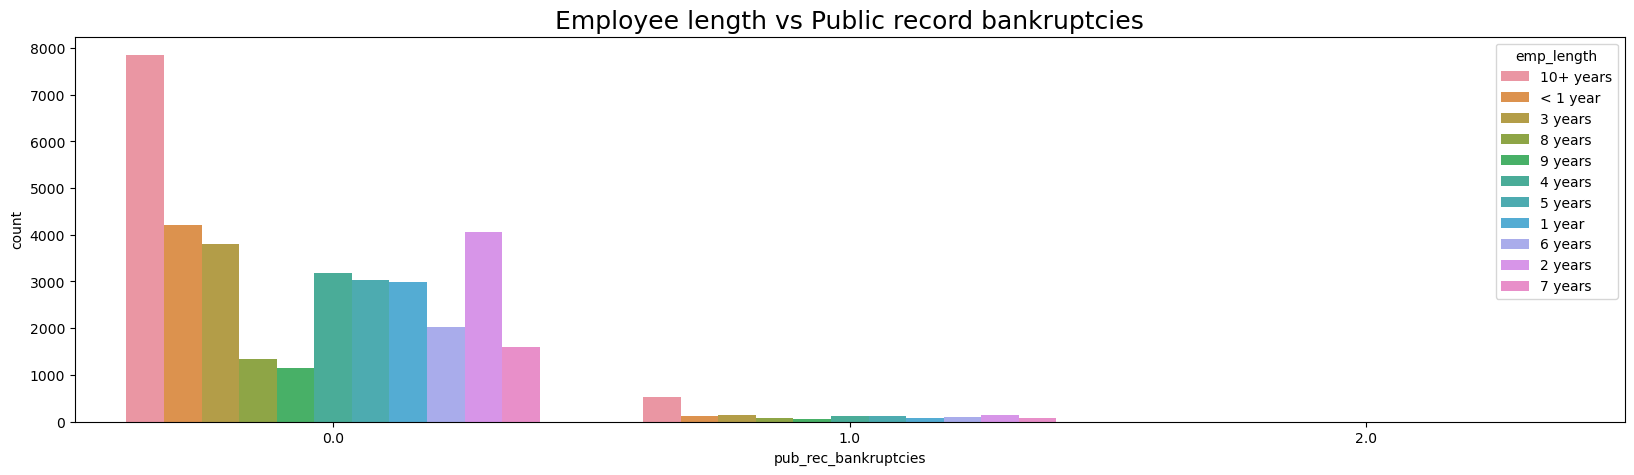

In [101]:
plt.figure(figsize=(20,5))
sns.countplot(x = 'pub_rec_bankruptcies', hue='emp_length', data=loan_data)
plt.title('Employee length vs Public record bankruptcies', size = 18)
plt.show()

### inq_last_6mths:

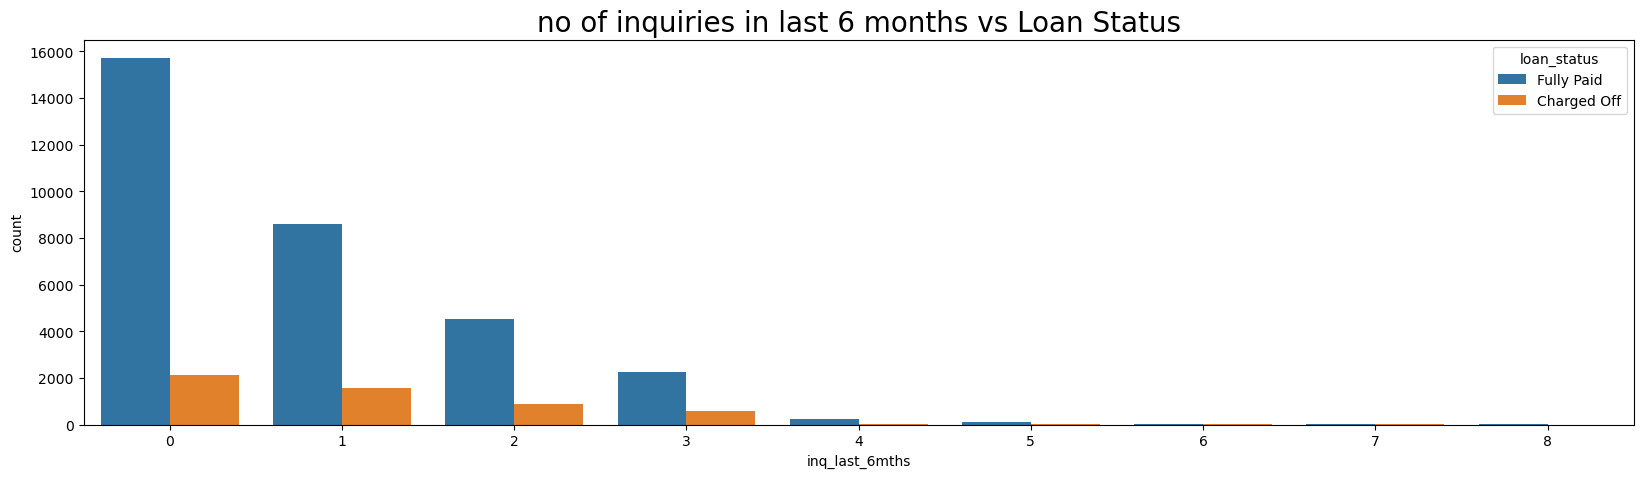

In [102]:
plt.figure(figsize=(20,5))
sns.countplot(x = 'inq_last_6mths', hue='loan_status', data=loan_data)
plt.title('no of inquiries in last 6 months vs Loan Status', size = 20)
plt.show()

### Approval Loan Amount Ratio:

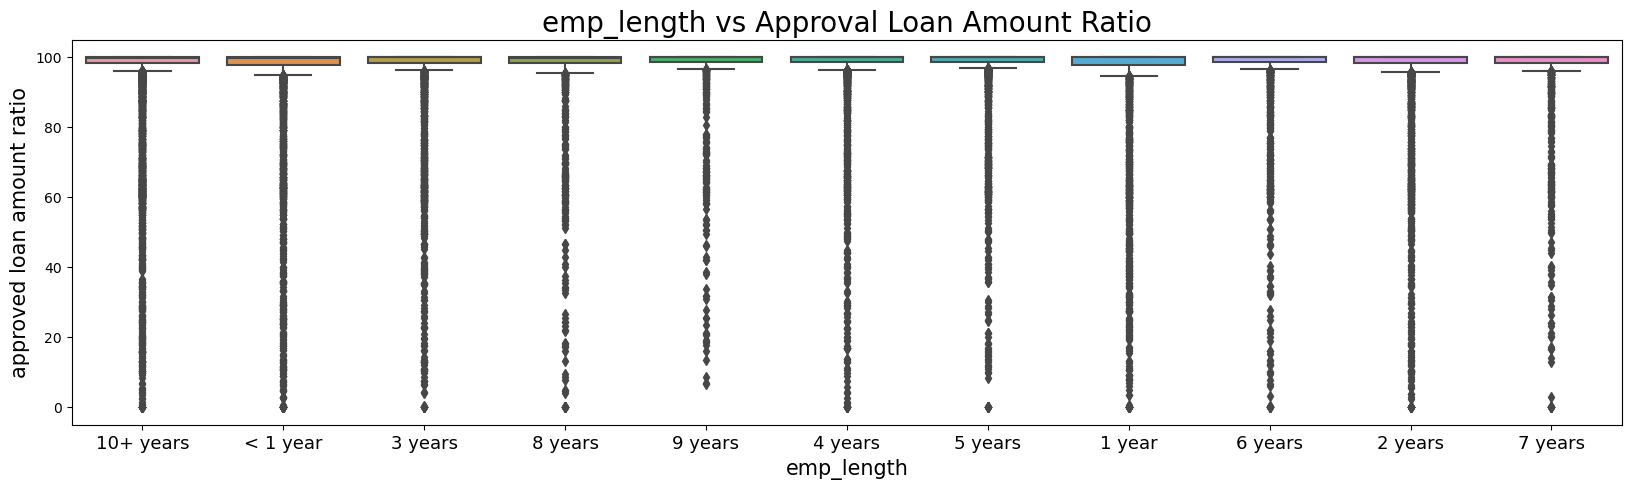

In [103]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y= 'approved_loan_amnt_ratio', data=loan_data)
plt.title('emp_length vs Approval Loan Amount Ratio', size = 20)
plt.xlabel('emp_length', size = 15)
plt.ylabel('approved loan amount ratio', size = 15)
plt.xticks(size = 13)
plt.show()

**Observations**:  
The correlation between approval of loan amount ratio and employment length is elusive.

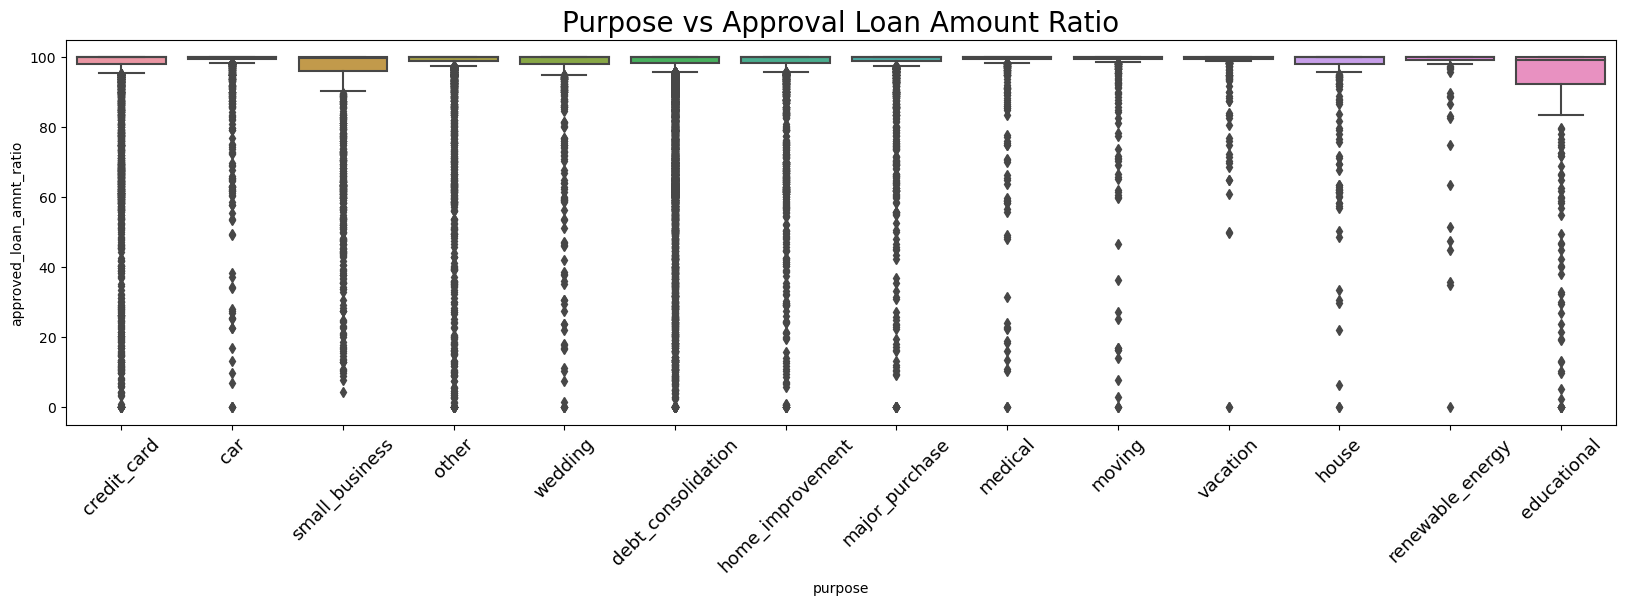

In [104]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y='approved_loan_amnt_ratio', data=loan_data)
plt.title('Purpose vs Approval Loan Amount Ratio', size = 20)
plt.xticks(rotation = 45, size = 13)
plt.show()

**Observations**:  
The Funded amount by investors is lower than requested loan amount in education and small business purposes.

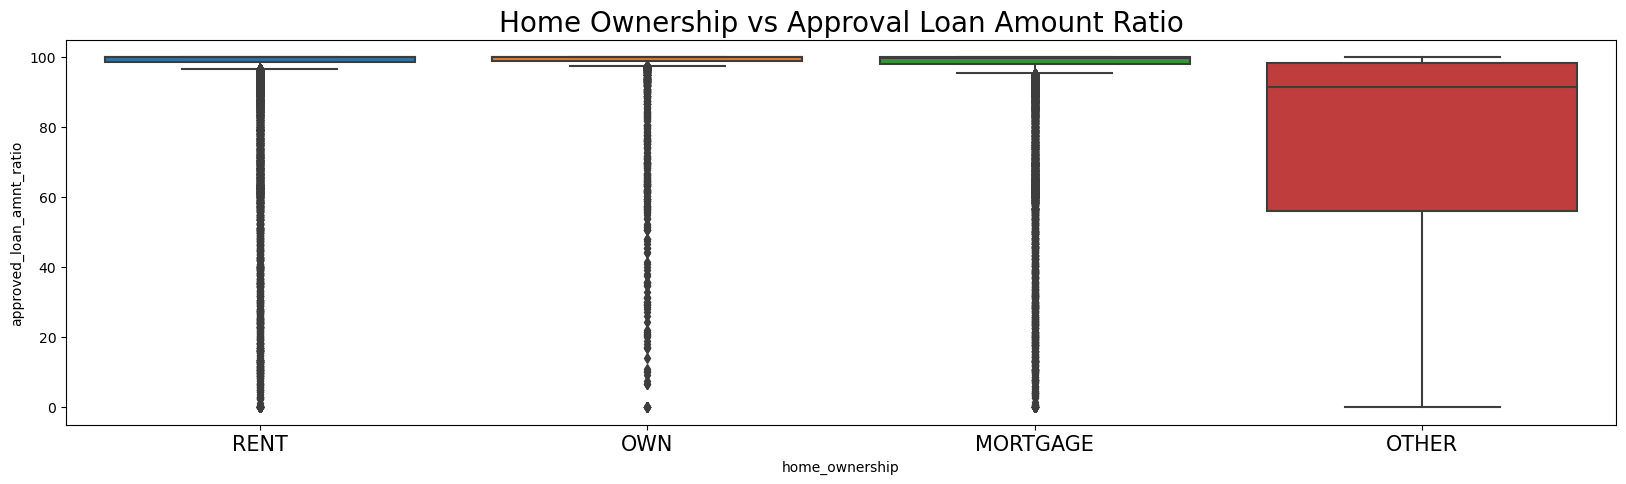

In [105]:
plt.figure(figsize=(20,5))
sns.boxplot(x='home_ownership', y='approved_loan_amnt_ratio', data=loan_data)
plt.title('Home Ownership vs Approval Loan Amount Ratio', size = 20)
plt.xticks(size= 15)
plt.show()

**Observations**:  
Borrowers with other home ownership have less approved ratio, implying that they recieved less amount than request.

<hr>

## Bivariate Analysis:

### Term vs Loan Status:

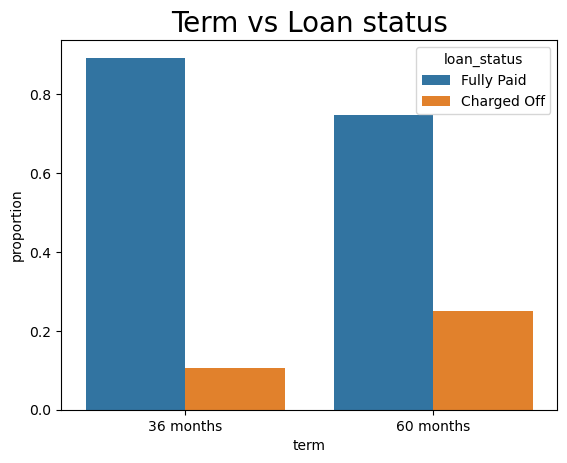

In [106]:
#Proportion of values for each category
df = loan_data.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Term vs Loan status', size = 20)
plt.show()

**Observations**:  
There is more proportion of borrowers who have defaulted loan in 60 months tenure compared to 36 months. The Fully Paid rate is higher in 36 months tenure.

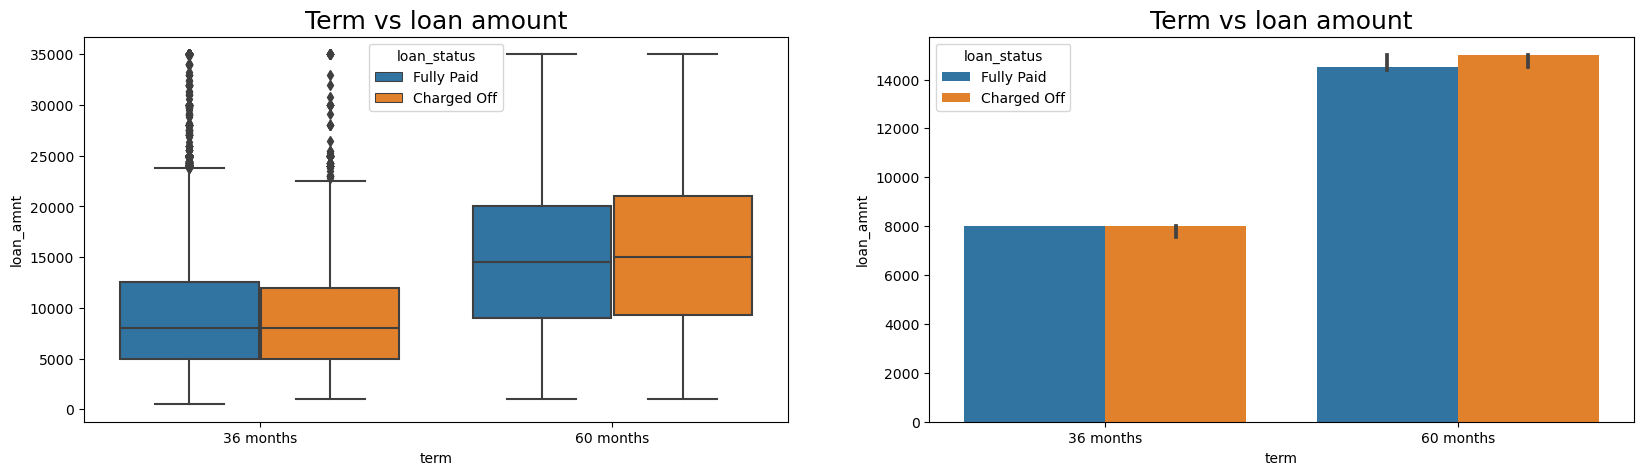

In [107]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=loan_data)
plt.title('Term vs loan amount', size = 18)
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=loan_data, estimator=np.median)
plt.title('Term vs loan amount', size = 18)
plt.show()

**Observations**:  
The loan amount is not a decider for defaults in both 36 and 60 months.   
Borrowers have equal distribtion over both default and non default for 36 and 60 months tenures.

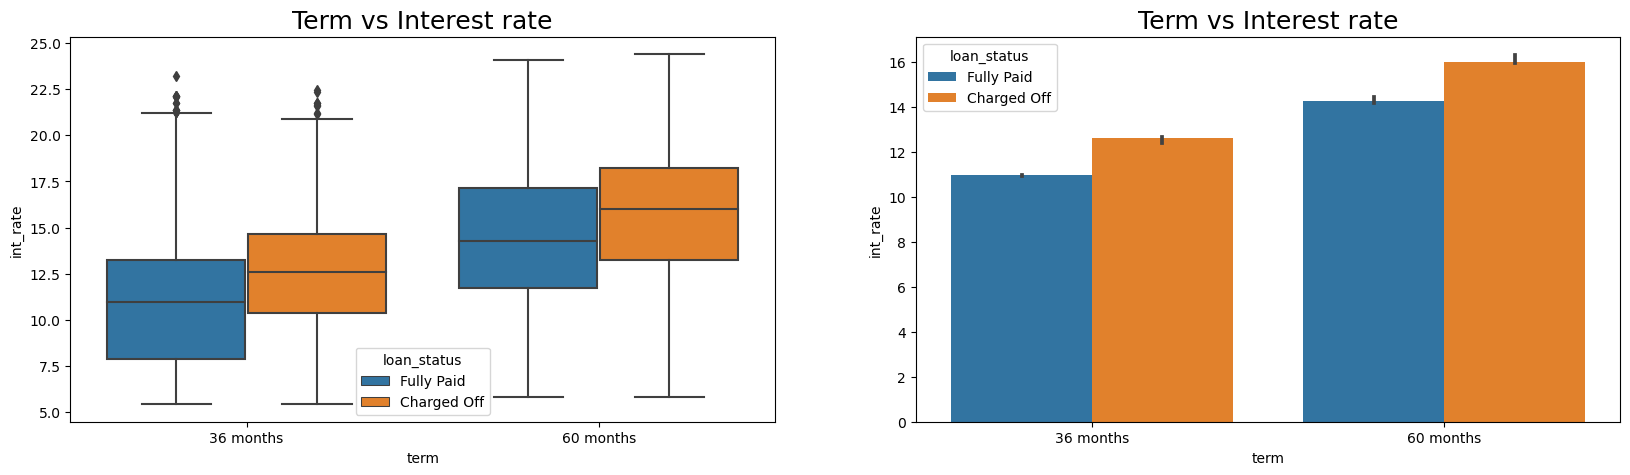

In [108]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=loan_data)
plt.title('Term vs Interest rate', size = 18)
plt.subplot(122)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=loan_data, estimator=np.median)
plt.title('Term vs Interest rate', size = 18)
plt.show()

**Observations**:
For higher interest rates, the deafult rate is higher for both 36 and 60 months tenure.

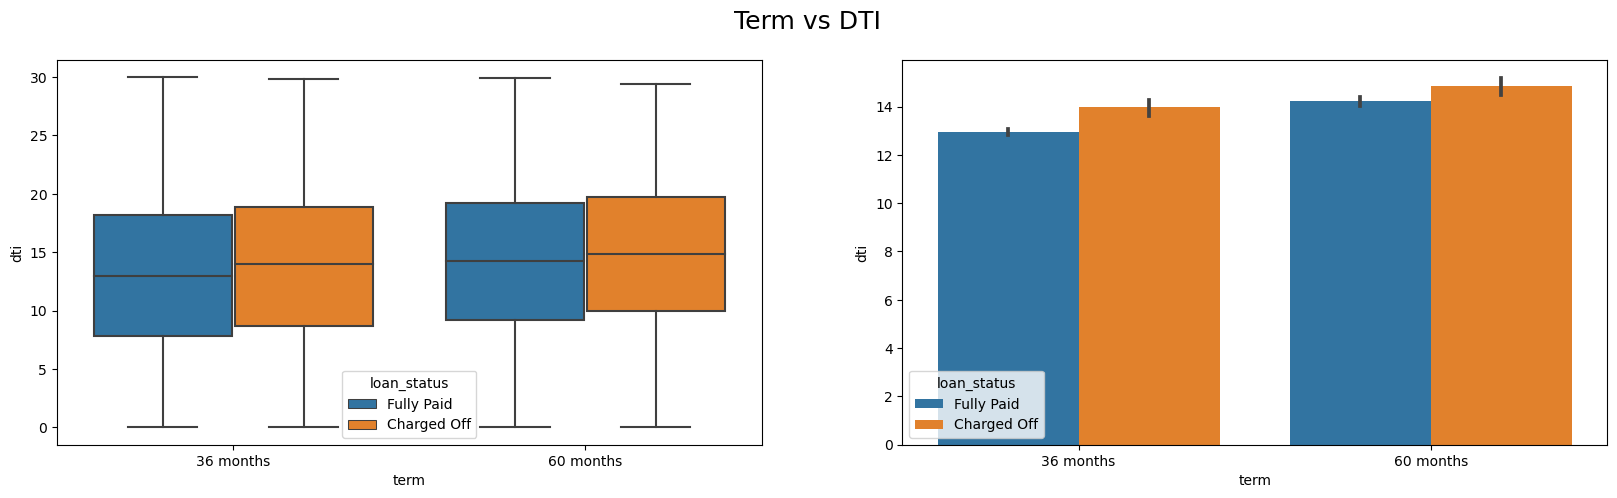

In [109]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=loan_data)
plt.subplot(122)
sns.barplot(x='term', y='dti', hue='loan_status', data=loan_data, estimator=np.median)
plt.suptitle('Term vs DTI', size = 18)
plt.show()

**Observations:**  
Comparitively, the charge-off is higher compared with fully-paid for the Debit to income ratio.

### Grade:

In [110]:
#Sorting Grades from A to G
grade_ord = loan_data.grade.unique()
grade_ord.sort()

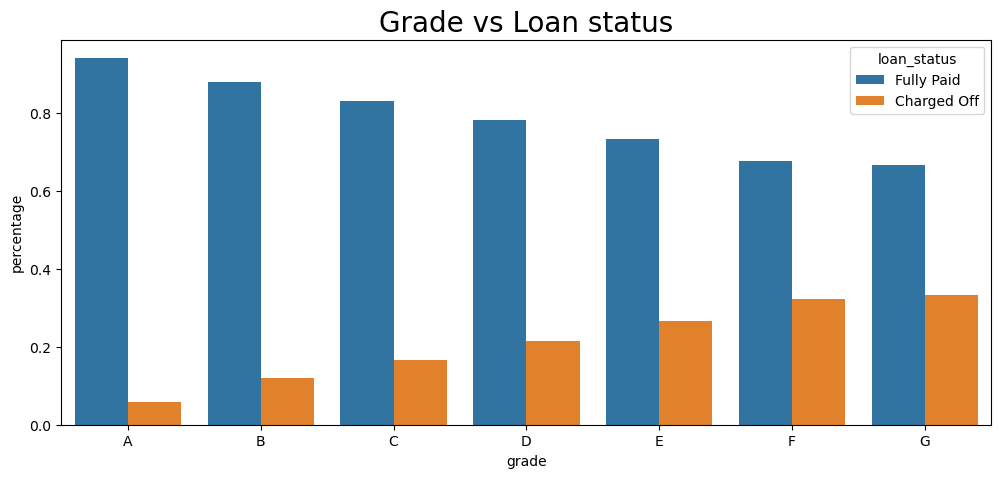

In [111]:
df = loan_data.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status', size = 20)
plt.show()

**Observations:**  
The graph implies that _Charged off_ increases as _grades_ decreases.

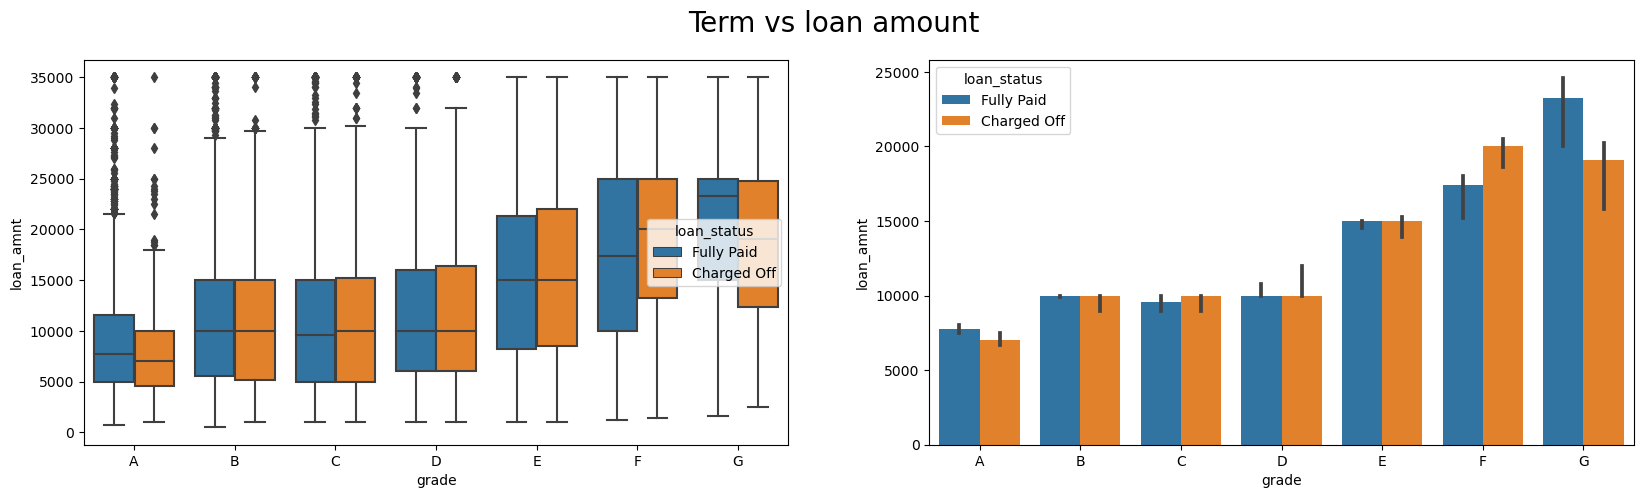

In [112]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=loan_data, order = grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=loan_data, estimator=np.median, order = grade_ord)
plt.suptitle('Term vs loan amount', size = 20)
plt.show()

**Observations:**  
* For lower grades 'F' and 'G' there is a higher difference between charged-off and fully paid.  
* The lower grade Borrowers have taken higher amount of loans and they are more prone to default the loan.

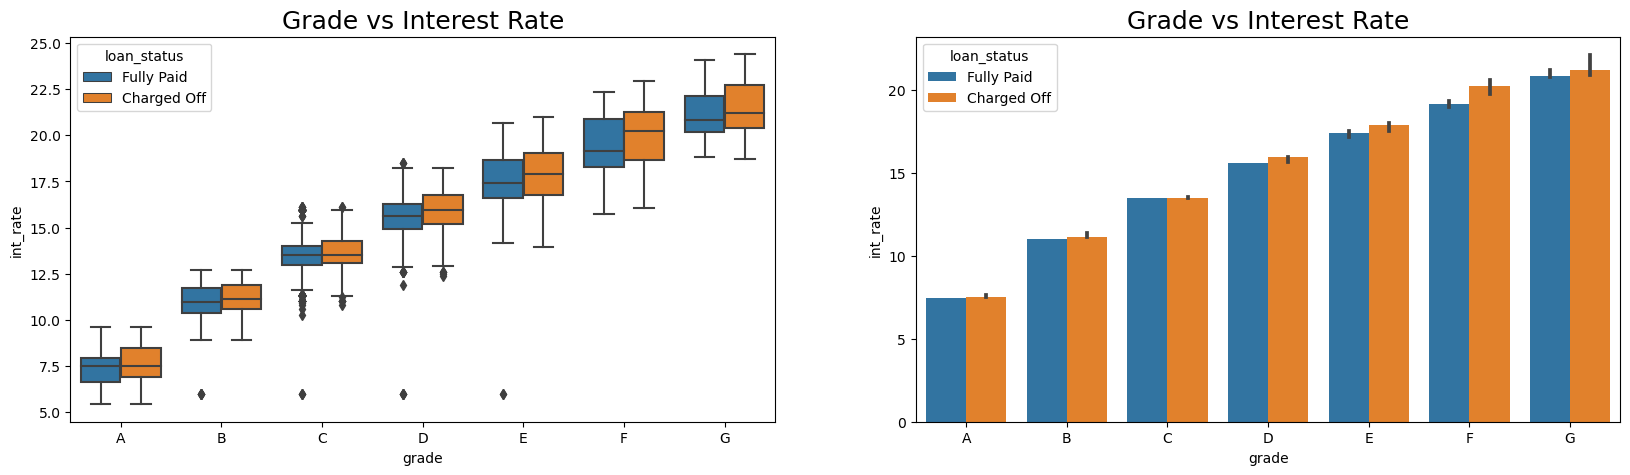

In [113]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=loan_data, order = grade_ord)
plt.title('Grade vs Interest Rate', size = 18)
plt.subplot(122)
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=loan_data, order = grade_ord, estimator=np.median)
plt.title('Grade vs Interest Rate', size = 18)
plt.show()

**Observations:**  
As the _grade_ decreases the _interest rate_ gradually increases, and they are more and more prone to default the loan.

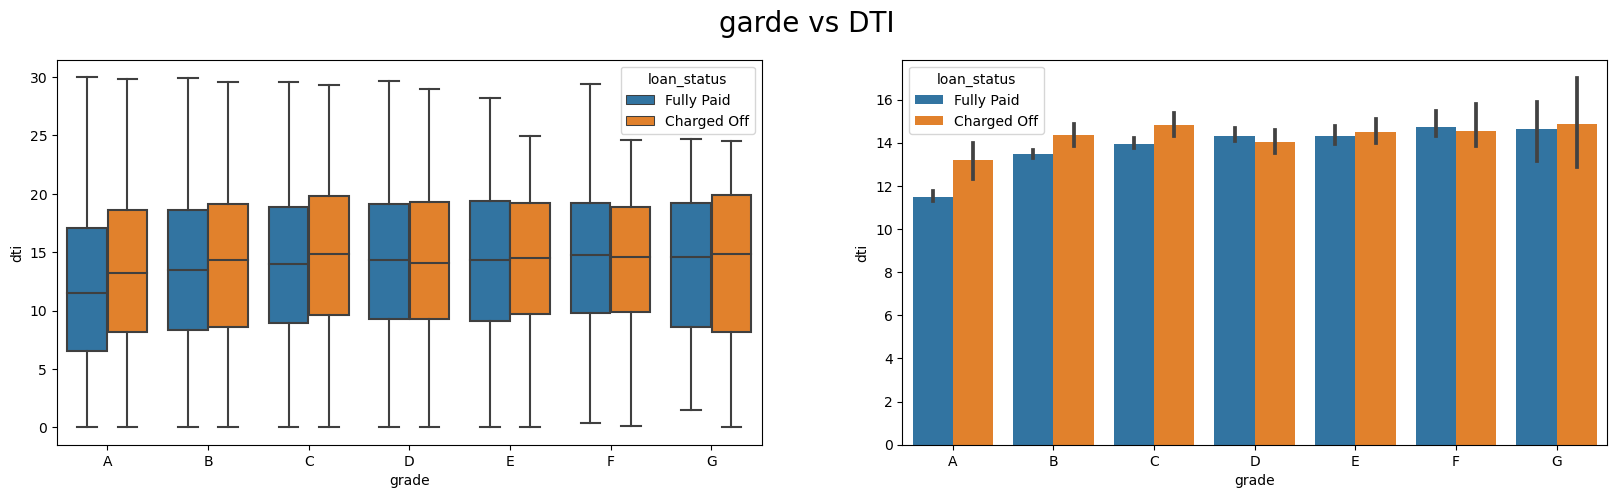

In [114]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='dti', hue='loan_status', data=loan_data, order=grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='dti', hue='loan_status', data=loan_data, estimator=np.median, order = grade_ord)
plt.suptitle('garde vs DTI', size = 20)
plt.show()

**Observations:**  
There are no significant changes in dti in each _grade_ and _loan status_.

### Employment Length:

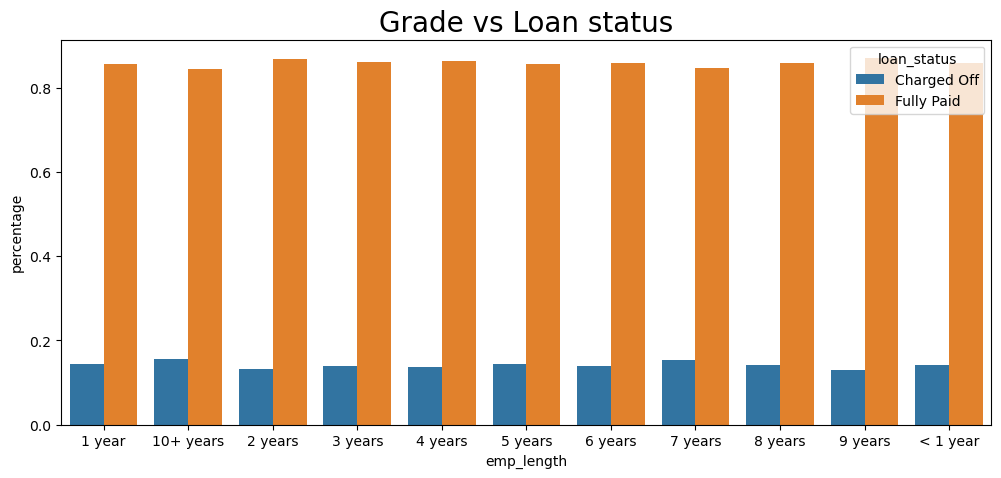

In [115]:
df = loan_data.groupby(['emp_length', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('emp_length').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='emp_length', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status', size = 20)
plt.show()

**Observations:**
There are no significant changes observed in defaulters across employment lengths.

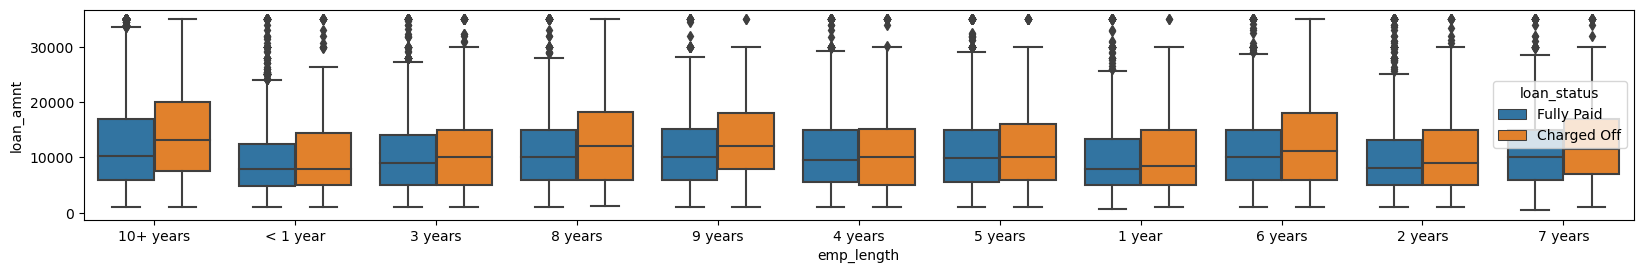

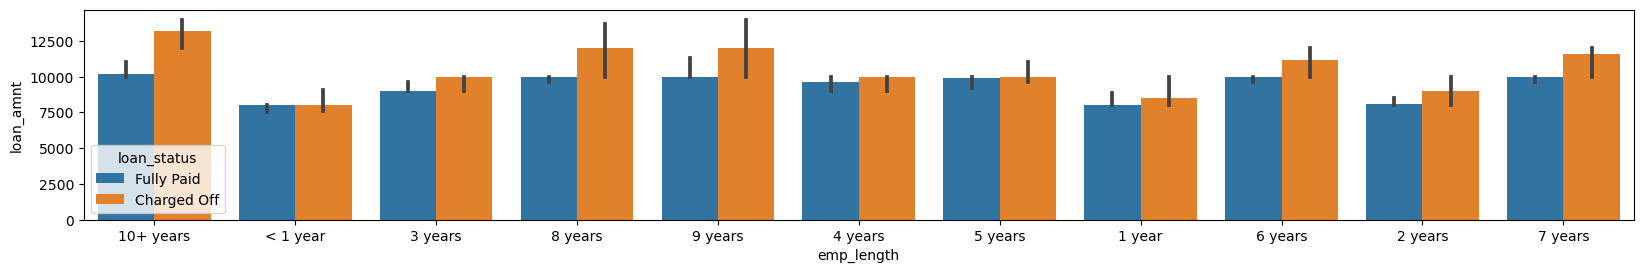

In [116]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=loan_data)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=loan_data, estimator=np.median)
plt.show()

**Observations:**  
Borrowers with higher employment lengths and received more loan amounts got more default rate.

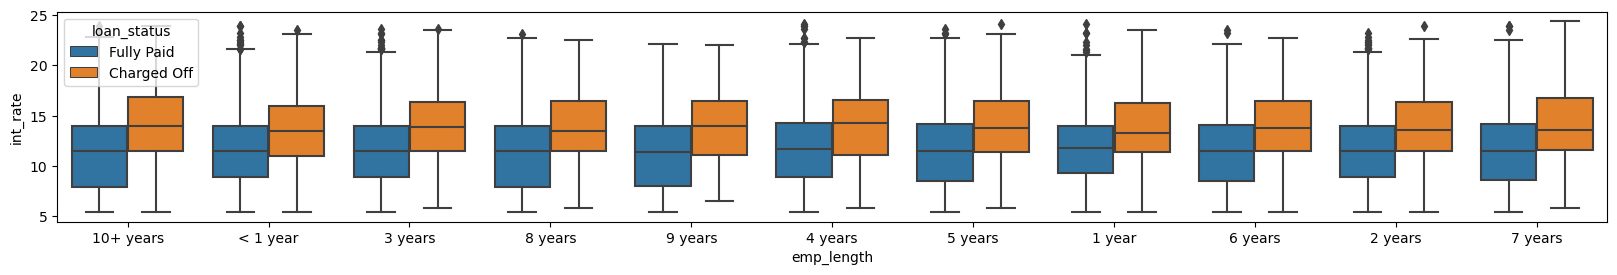

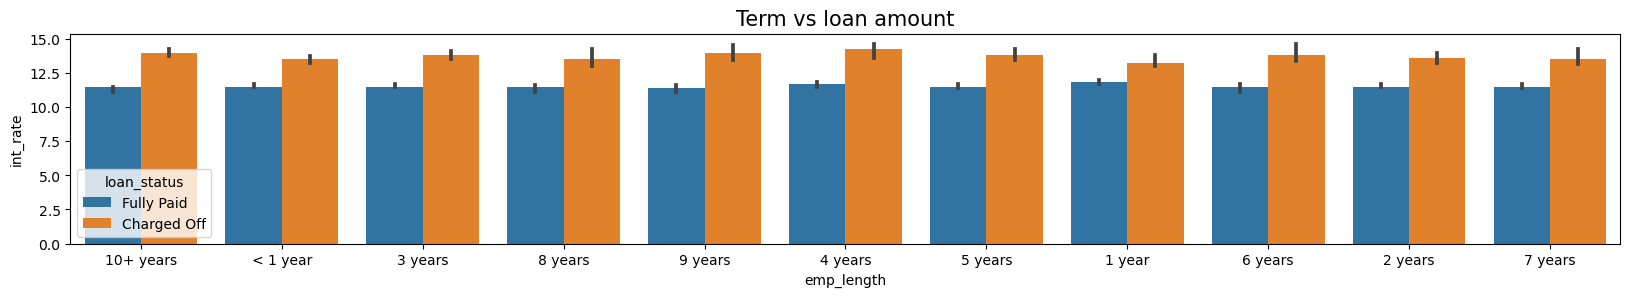

In [117]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='int_rate', hue='loan_status', data=loan_data)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='int_rate', hue='loan_status', data=loan_data, estimator=np.median)
plt.title('Term vs loan amount', size = 15)
plt.show()

**Observations**:  
Irrespective of employment length, loans with higher interest rates got defaulted more.

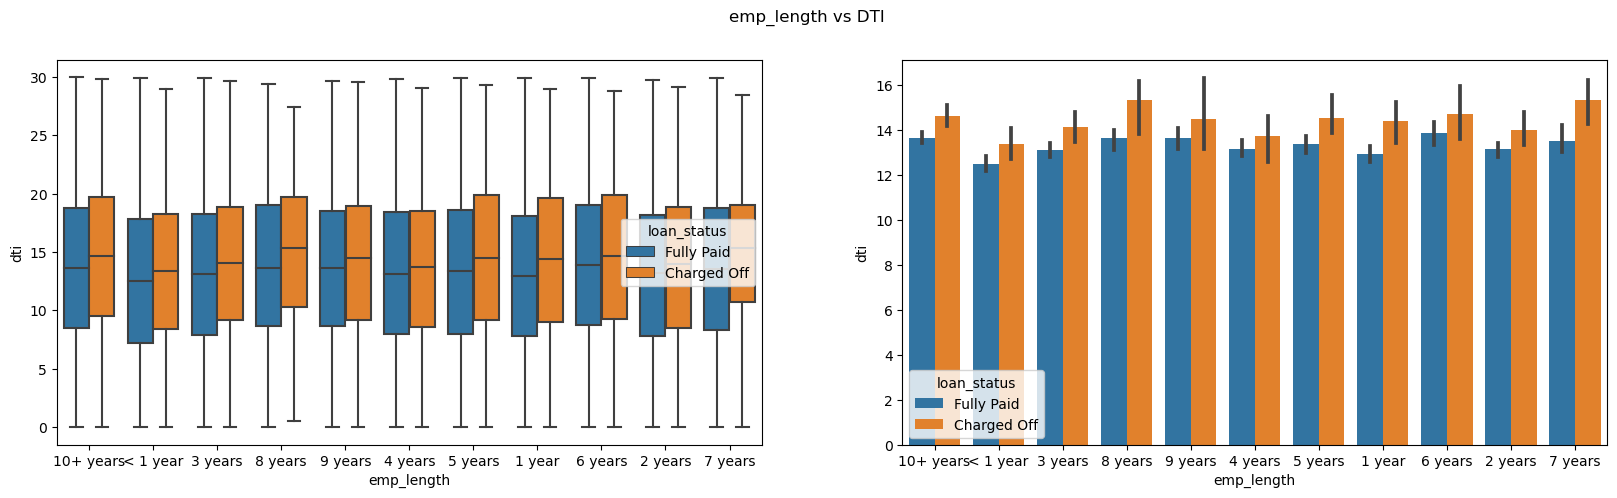

In [118]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='emp_length', y='dti', hue='loan_status', data=loan_data)
plt.subplot(122)
sns.barplot(x='emp_length', y='dti', hue='loan_status', data=loan_data, estimator=np.median)
plt.suptitle('emp_length vs DTI')
plt.show()

**Observations:**  
Employment Length and DTI do not have any significant effect towards defaults.

### Home Ownership:

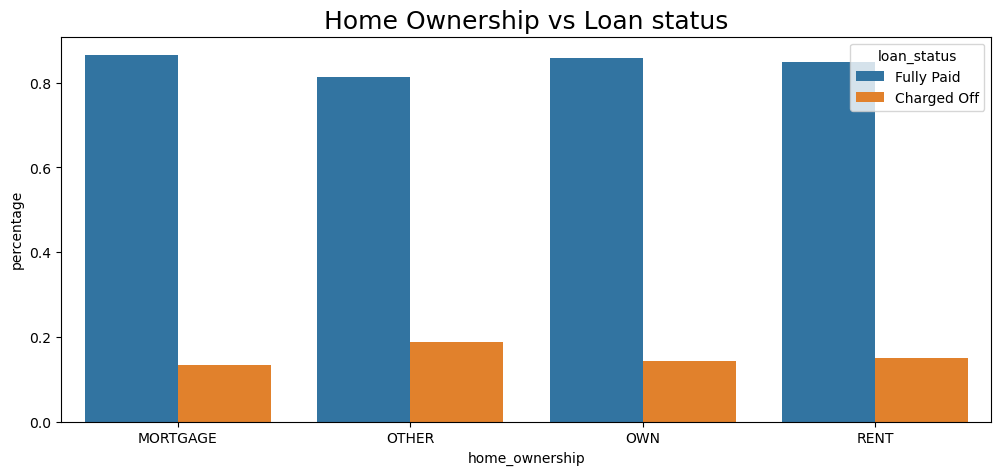

In [119]:
df = loan_data.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('home_ownership').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Home Ownership vs Loan status', size = 18)
plt.show()

**Observations:**   
The percentage is high for defaults recorded in _other_ home ownership category.

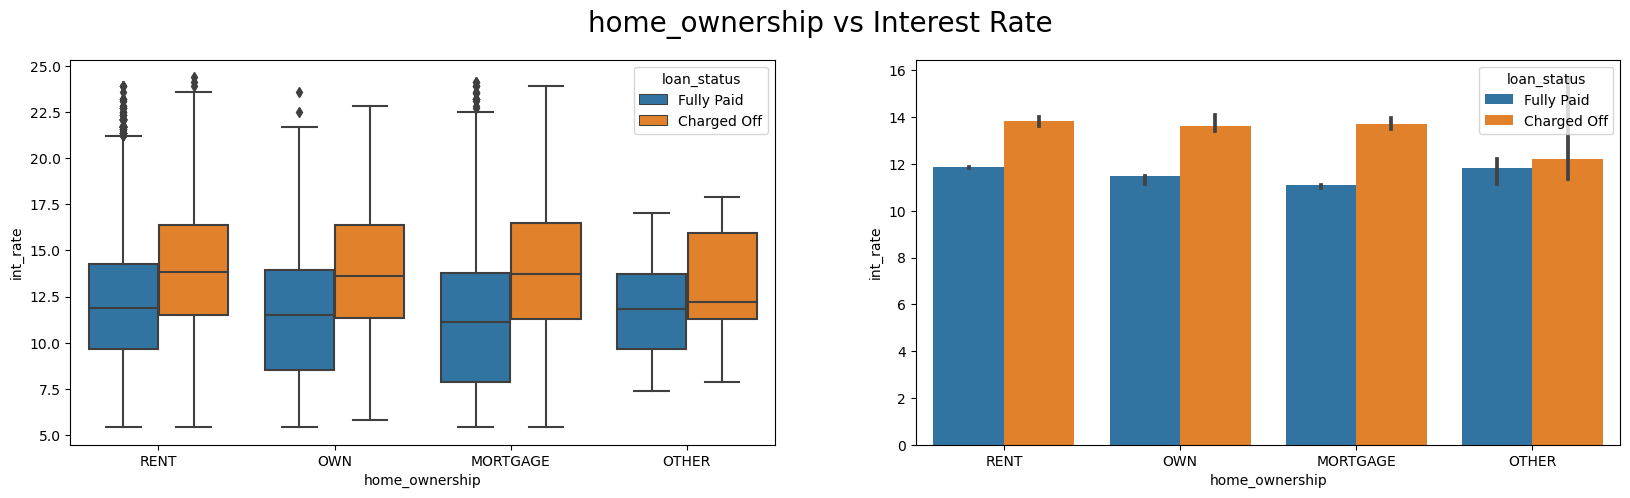

In [120]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='int_rate', hue='loan_status', data=loan_data)
plt.subplot(122)
sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=loan_data, estimator=np.median)
plt.suptitle('home_ownership vs Interest Rate', size = 20)
plt.show()

**Observations:**  
Irrespective of Home ownership, as interest rate increases the dafault rate increases as well.

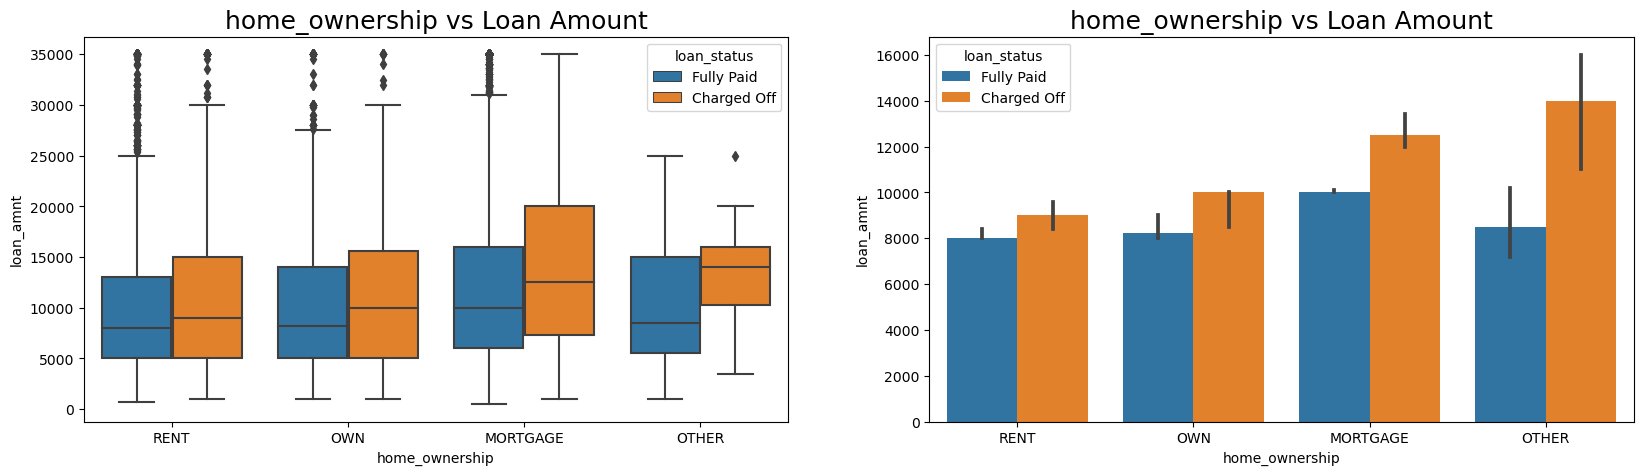

In [121]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=loan_data)
plt.title('home_ownership vs Loan Amount', size = 18)
plt.subplot(122)
sns.barplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=loan_data, estimator=np.median)
plt.title('home_ownership vs Loan Amount', size = 18)
plt.show()

**Observations:**  
Borrowers who opted for higher loan amounts defaulted compared to others.

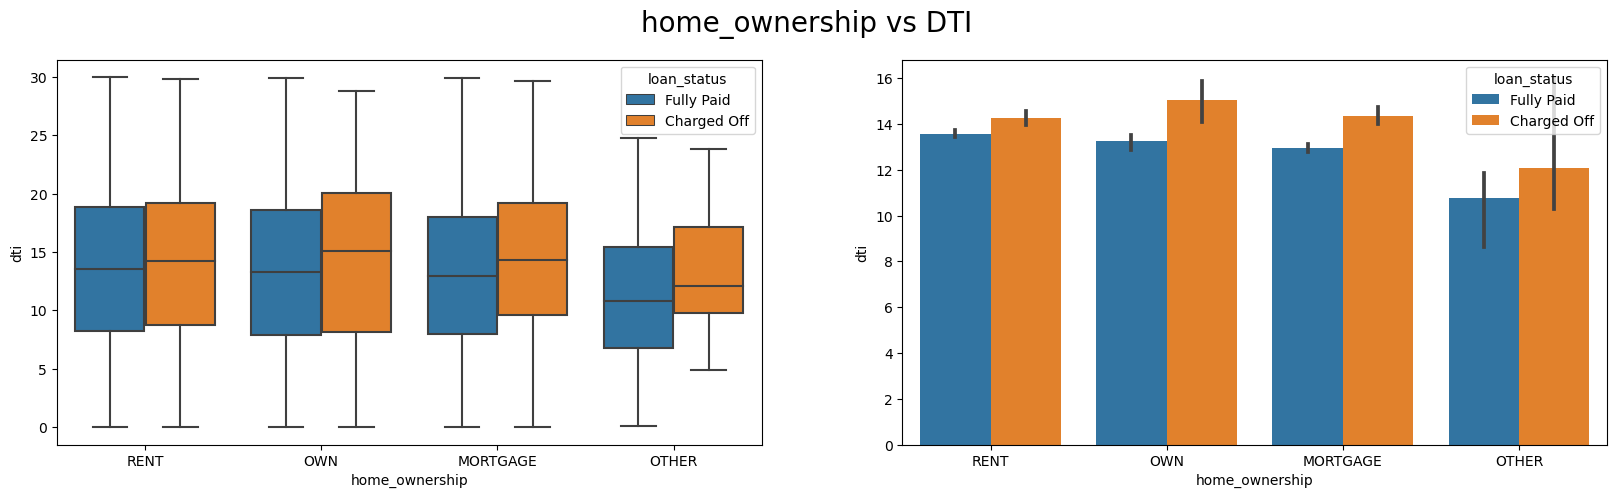

In [122]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='dti', hue='loan_status', data=loan_data)
plt.subplot(122)
sns.barplot(x='home_ownership', y='dti', hue='loan_status', data=loan_data, estimator=np.median)
plt.suptitle('home_ownership vs DTI', size = 20)
plt.show()

**Observations:**  
* Borrowers in _other_ home ownership category have less dti than other categories.  
* There is an equal possibility of home owners defaulting for all the home ownerships.

### Address State:

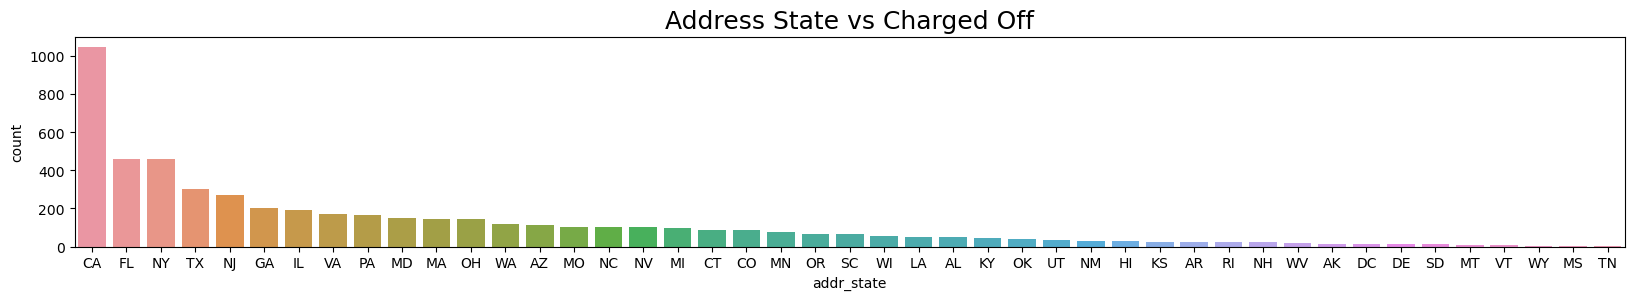

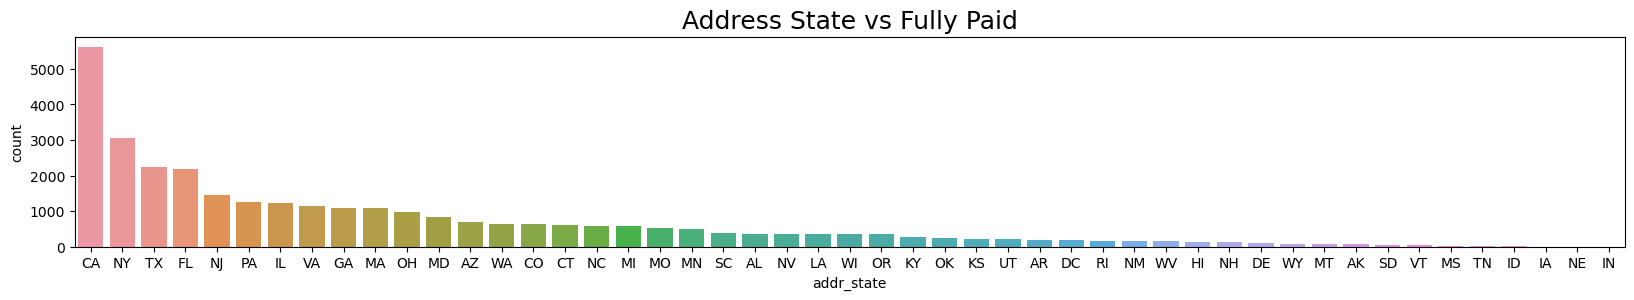

In [123]:
charged_off_df = loan_data[loan_data.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df.addr_state.value_counts().index)
plt.title('Address State vs Charged Off', size = 18)

fp_df = loan_data[loan_data.loan_status.values == 'Fully Paid']
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.countplot(x='addr_state', data=fp_df, order=fp_df.addr_state.value_counts().index)
plt.title('Address State vs Fully Paid', size = 18)
plt.show()

**Observations**:   
Most borrowers defaulted in _CA_ , _FL_ and _NY_ states.

### Verfication Status:

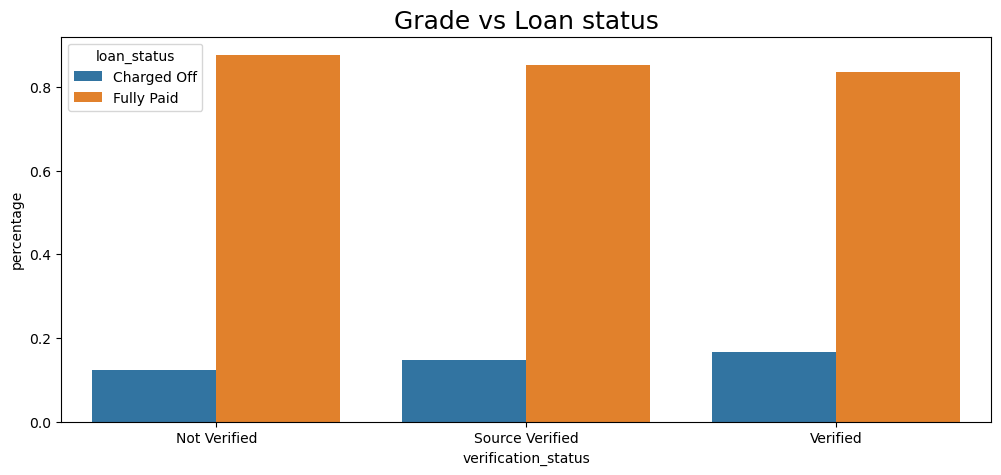

In [124]:
df = loan_data.groupby(['verification_status', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('verification_status').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='verification_status', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status', size = 18)
plt.show()

**Observations:**  
No significant changes in charged off loans for all kinds of verification status.

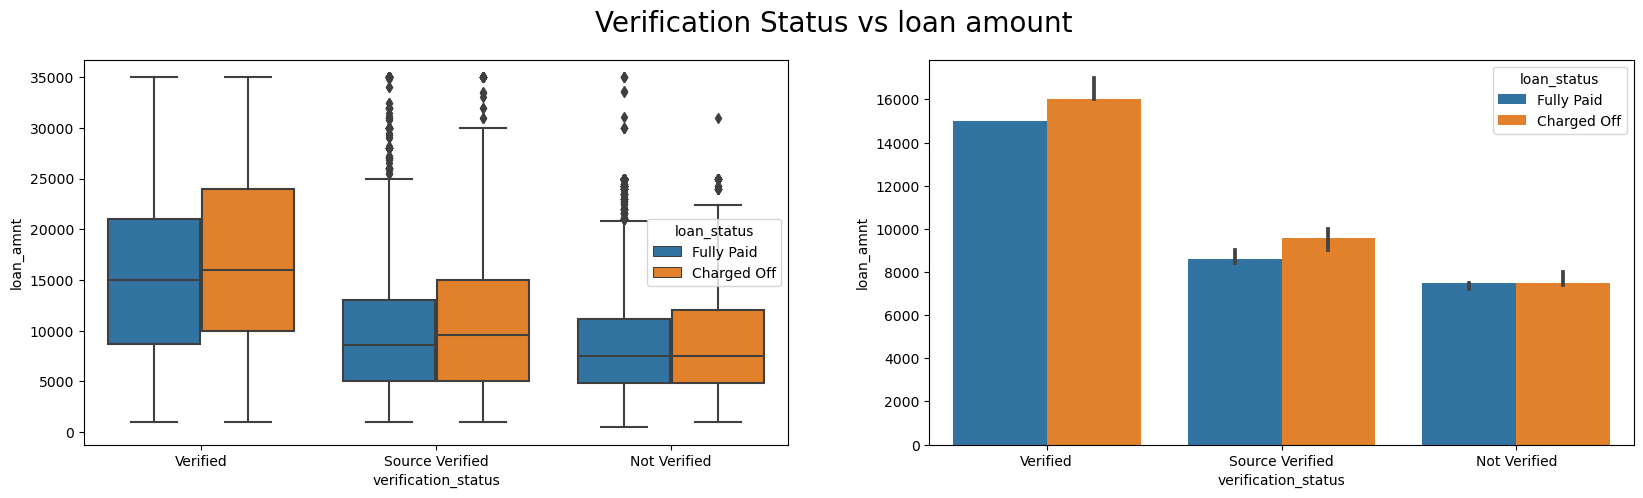

In [125]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=loan_data)
plt.subplot(122)
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=loan_data, estimator=np.median)
plt.suptitle('Verification Status vs loan amount', size = 20)
plt.show()

**Observations:**  
* Verified loans grant higher loan amounts compared to others.
* A slight increase is observed in loan amount for verified and source verified loan when they are defaulted.

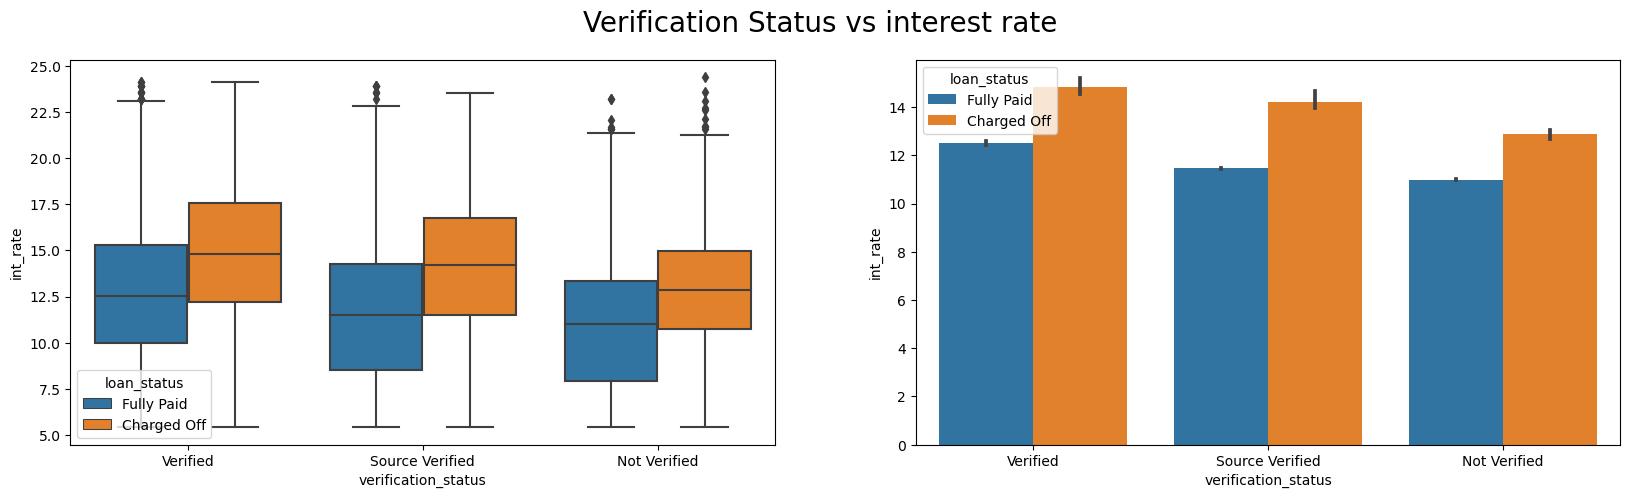

In [126]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='int_rate', hue='loan_status', data=loan_data)
plt.subplot(122)
sns.barplot(x='verification_status', y='int_rate', hue='loan_status', data=loan_data, estimator=np.median)
plt.suptitle('Verification Status vs interest rate', size = 20)
plt.show()

**Observations:**  
Irrespective of verification status, higher interest rates are incurring default of loan.

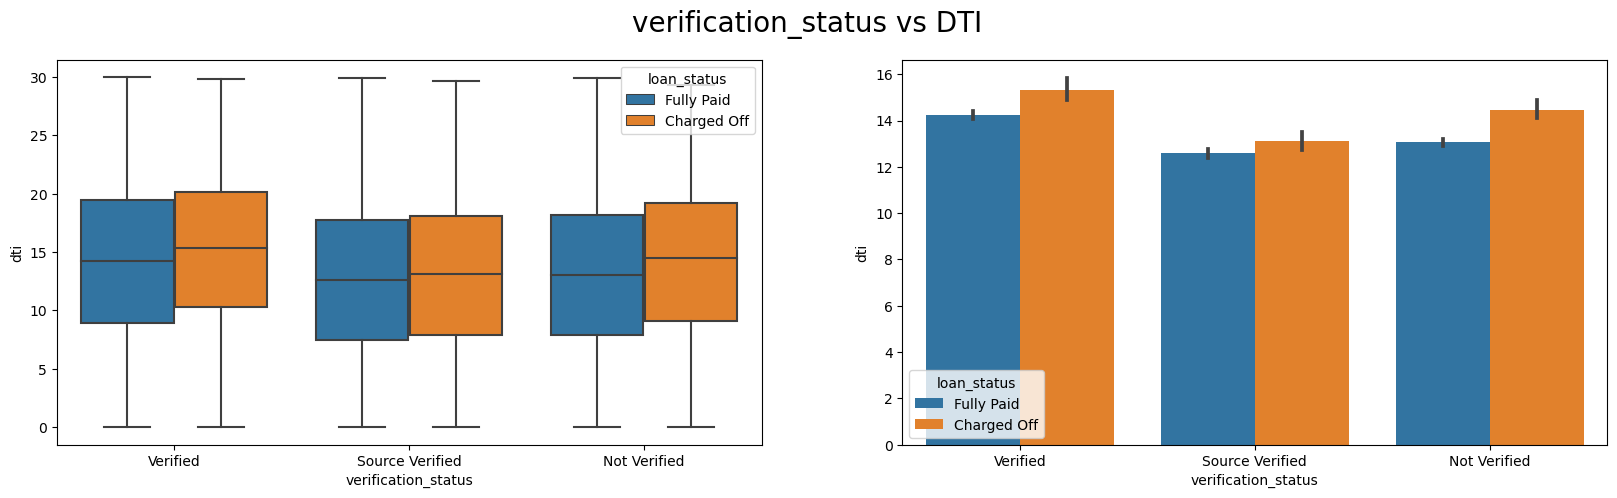

In [127]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='dti', hue='loan_status', data=loan_data)
plt.subplot(122)
sns.barplot(x='verification_status', y='dti', hue='loan_status', data=loan_data, estimator=np.median)
plt.suptitle('verification_status vs DTI', size = 20)
plt.show()

**Observations:**  
A slight increase in the dti mean for defaulted loans for all the verification status categories.

### Purpose:

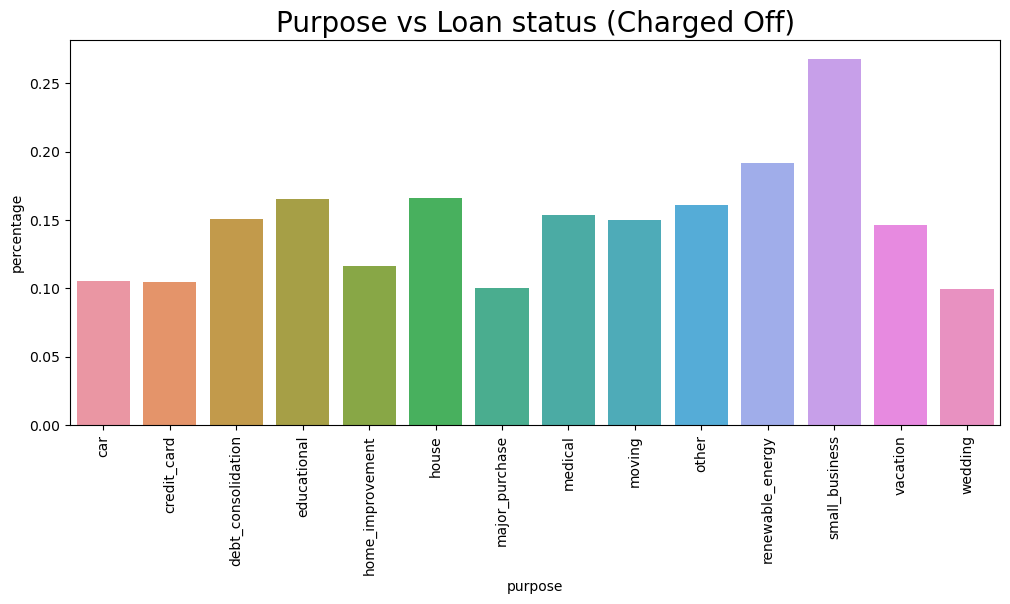

In [128]:
df = loan_data.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('purpose').transform(lambda x: x/x.sum())
df = df[df.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='percentage', data=df)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)', size = 20)
plt.show()

**Observations:**  
Charged-off is higher for small_business category.

<Figure size 640x480 with 0 Axes>

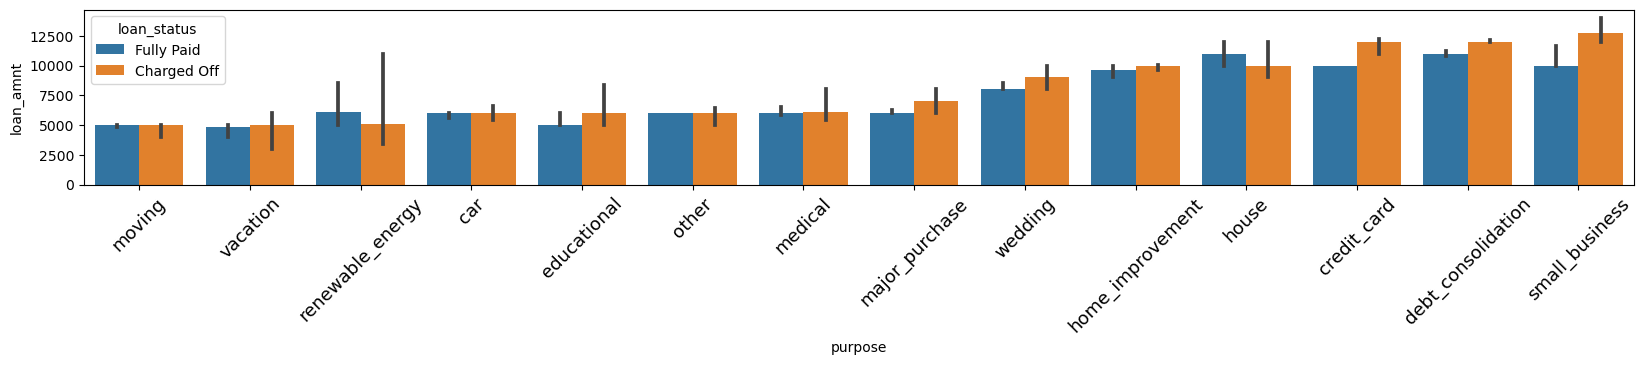

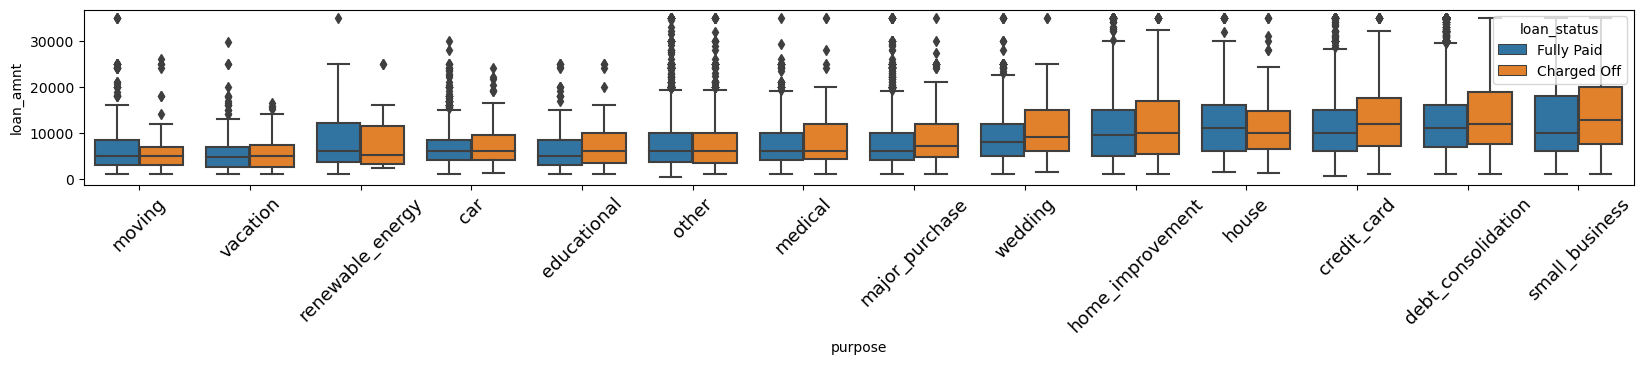

In [129]:
df = loan_data.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()

plt.suptitle('Purpose vs loan amount', size = 18)
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= loan_data, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median)
plt.xticks(rotation=45, size = 13)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= loan_data, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose)
plt.xticks(rotation = 45, size = 13)
plt.show()

**Observations:**  
Small Business have more defaults when the loan amount is high.

<Figure size 640x480 with 0 Axes>

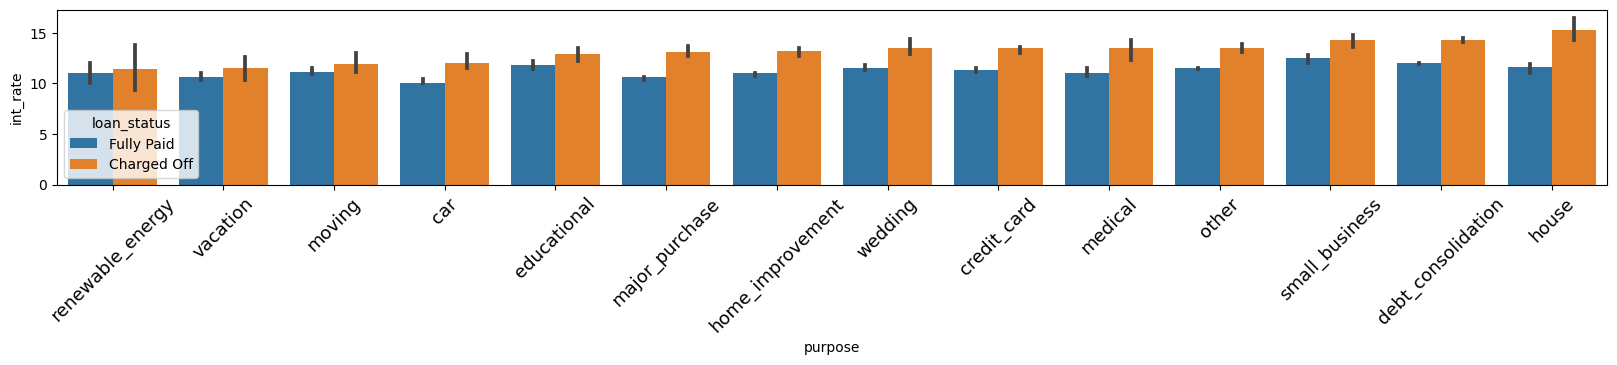

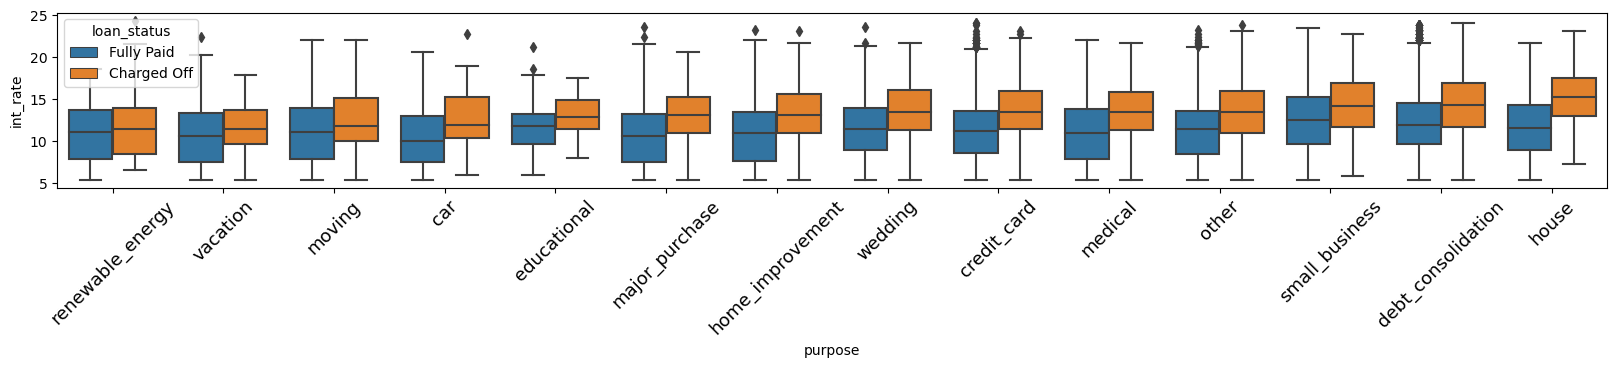

In [130]:
df = loan_data.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose

plt.suptitle('Purpose vs interest rate')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='int_rate', hue='loan_status', data= loan_data, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=45, size = 13)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data= loan_data, order = purpose_ord)
plt.xticks(rotation=45, size = 13)
plt.show()

**Observations:**  
Home loans with higher interest rates are mostly defaulted. A similar observation is made in small business and debt consolidation categories.

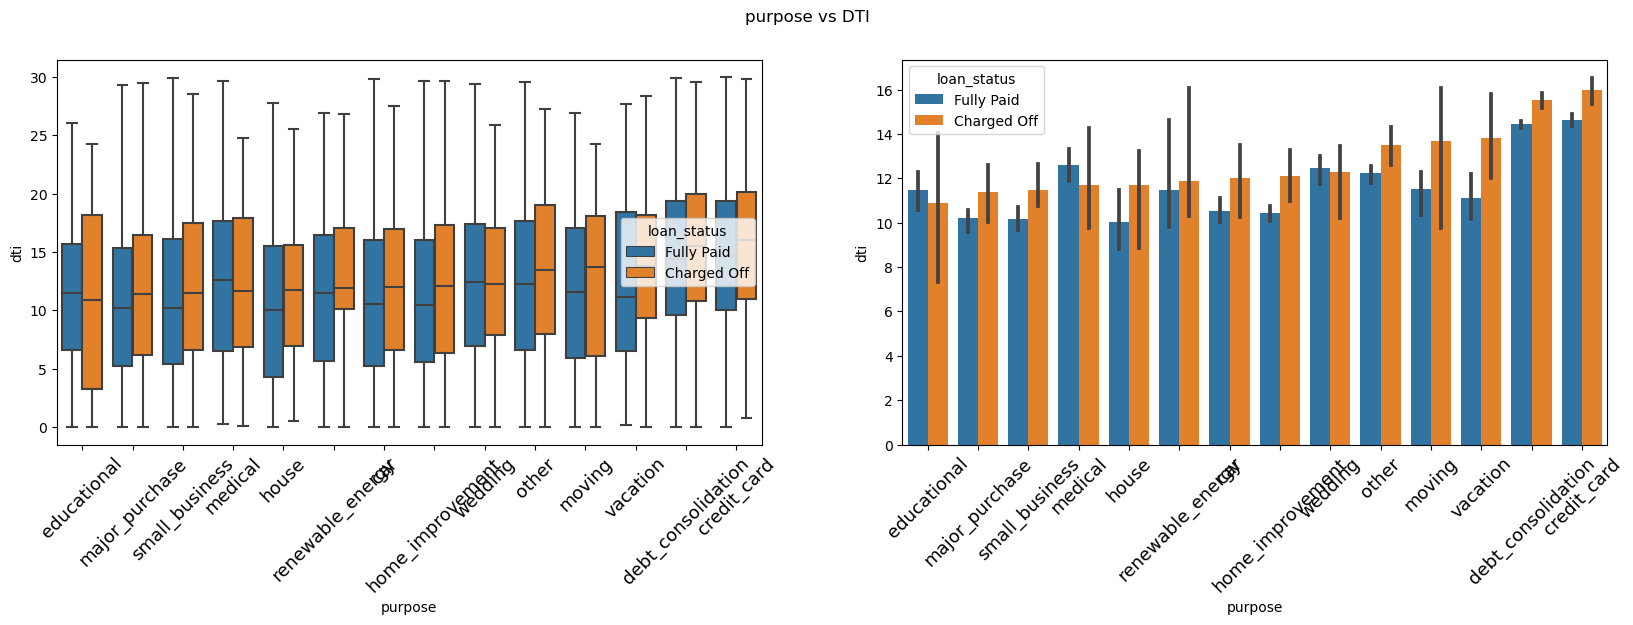

In [131]:
df = loan_data.groupby(['purpose', 'loan_status'], as_index=False)['dti'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='dti').purpose

plt.figure(figsize=(20,5))
plt.suptitle('purpose vs DTI')
plt.subplot(121)
sns.boxplot(x='purpose', y='dti', hue='loan_status', data=loan_data, order=purpose_ord)
plt.xticks(rotation=45, size = 13)
plt.subplot(122)
sns.barplot(x='purpose', y='dti', hue='loan_status', data=loan_data, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=45, size = 13)
plt.show()

**Observations:**  
No observations are made from the charts.

### Loan Amount vs Interest Rate:

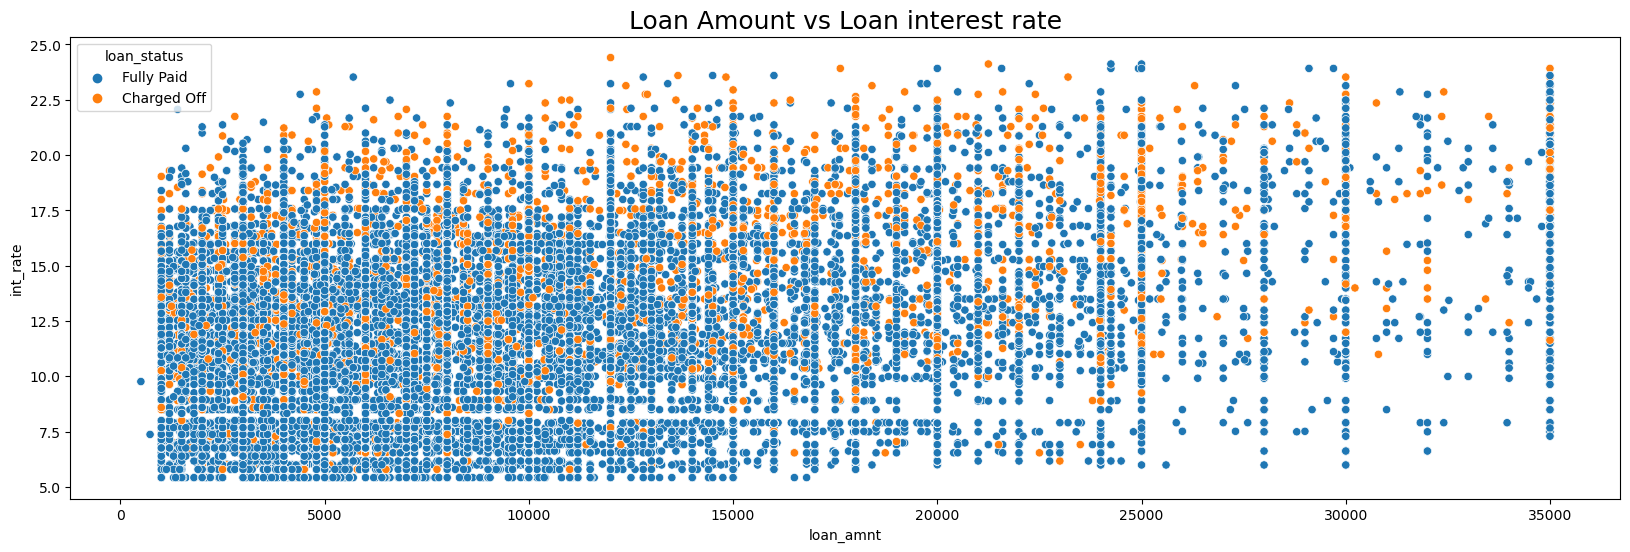

In [132]:
plt.figure(figsize=(20,6))
#scatter plot for analysing distribution
sns.scatterplot(x='loan_amnt', y='int_rate', data=loan_data, hue='loan_status')
plt.title('Loan Amount vs Loan interest rate', size = 18)
plt.show()

**Observartions**:  
The values are spread across. No specific pattern is found in the spread.

### Loan Amount vs Annual income:

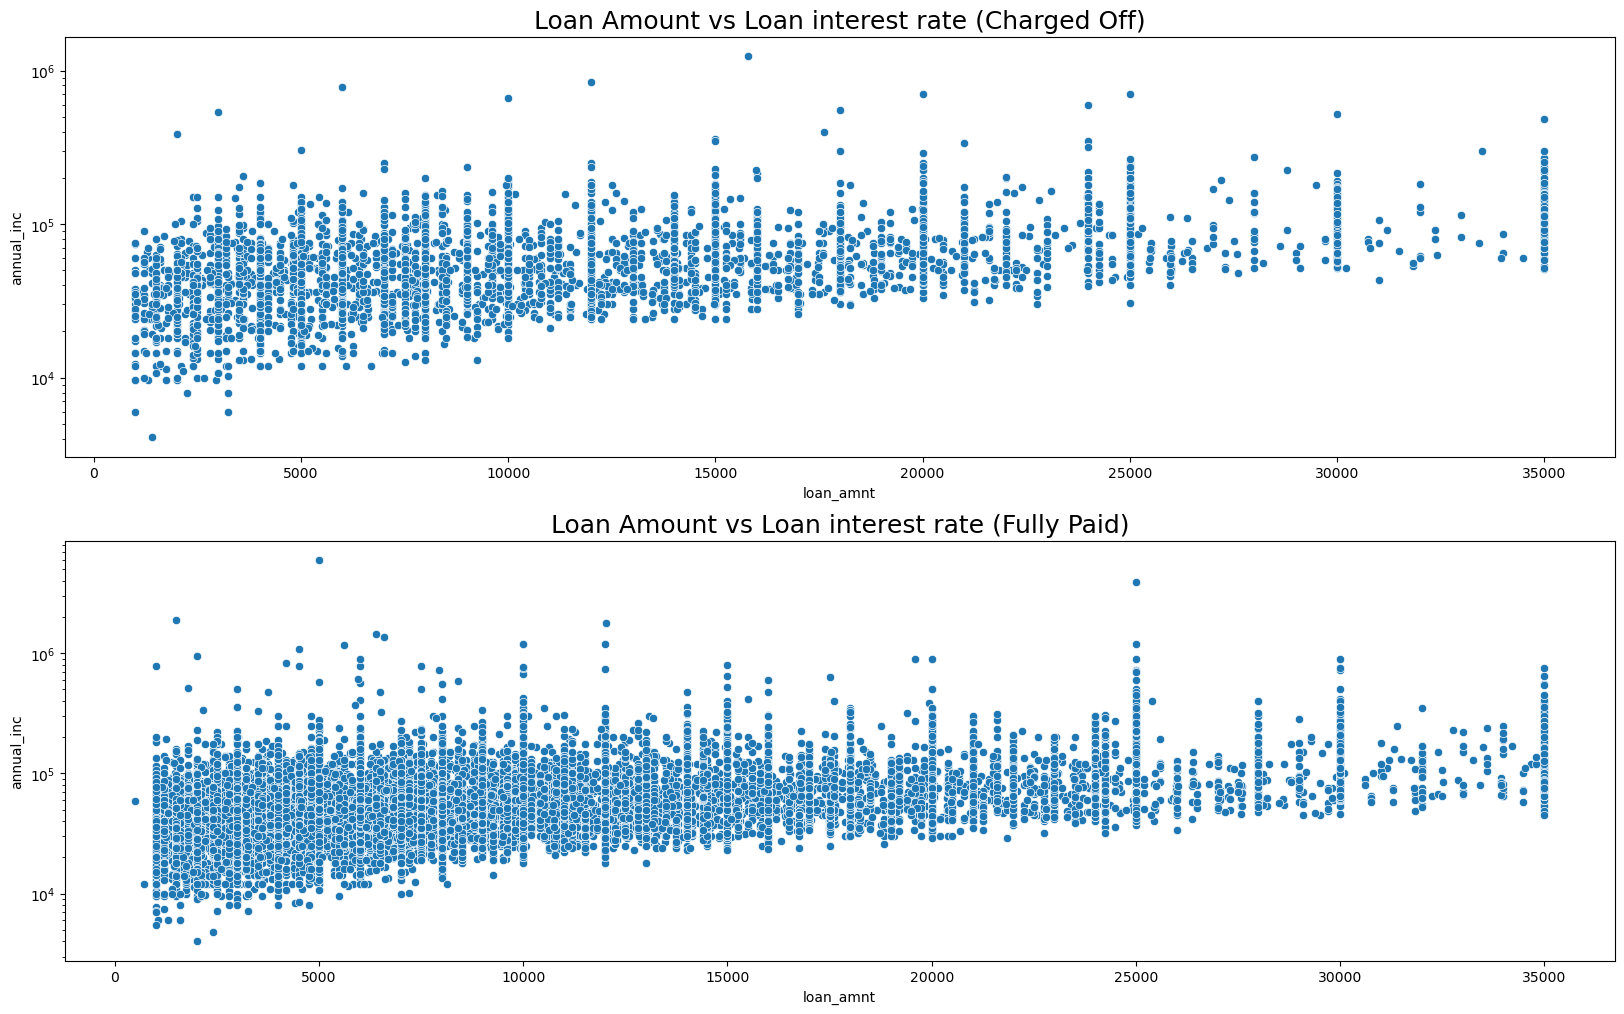

In [133]:
plt.figure(figsize=(20,12))
plt.subplot(211)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Charged Off)', size = 18)
plt.subplot(212)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=loan_data[loan_data.loan_status == 'Fully Paid'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Fully Paid)', size = 18)
plt.show()

**Observations:**  
Both Fully paid and Charged Off loans have similar pattern versus Annual income. A linear pattern can be fir with a line which has a lesser slope.

### Interest Rate vs DTI:

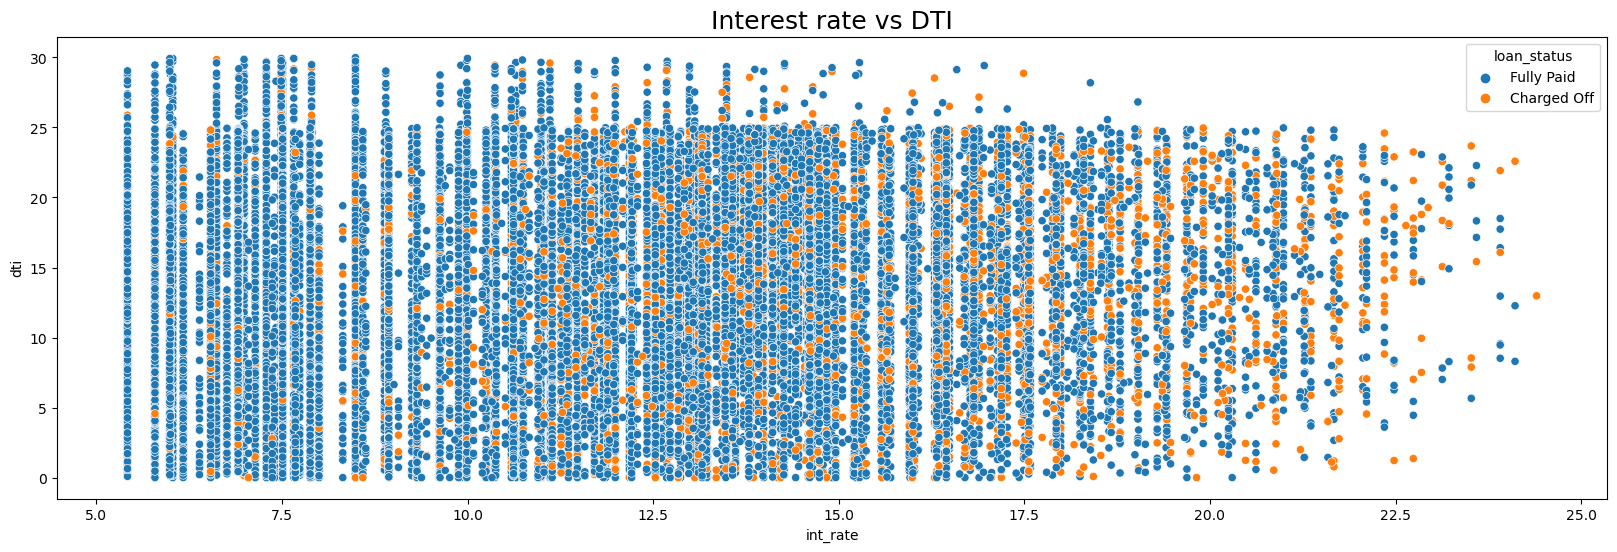

In [134]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='int_rate', y='dti', data=loan_data, hue='loan_status')
plt.title('Interest rate vs DTI', size = 18)
plt.show()

**Observations:**  
The values are spread across, it can be observed that irrespective of DTI, when the interest rates are high charged off loans are high.

### Correlation Matrix:

Finding the correlation between the variables/columns of out data set.

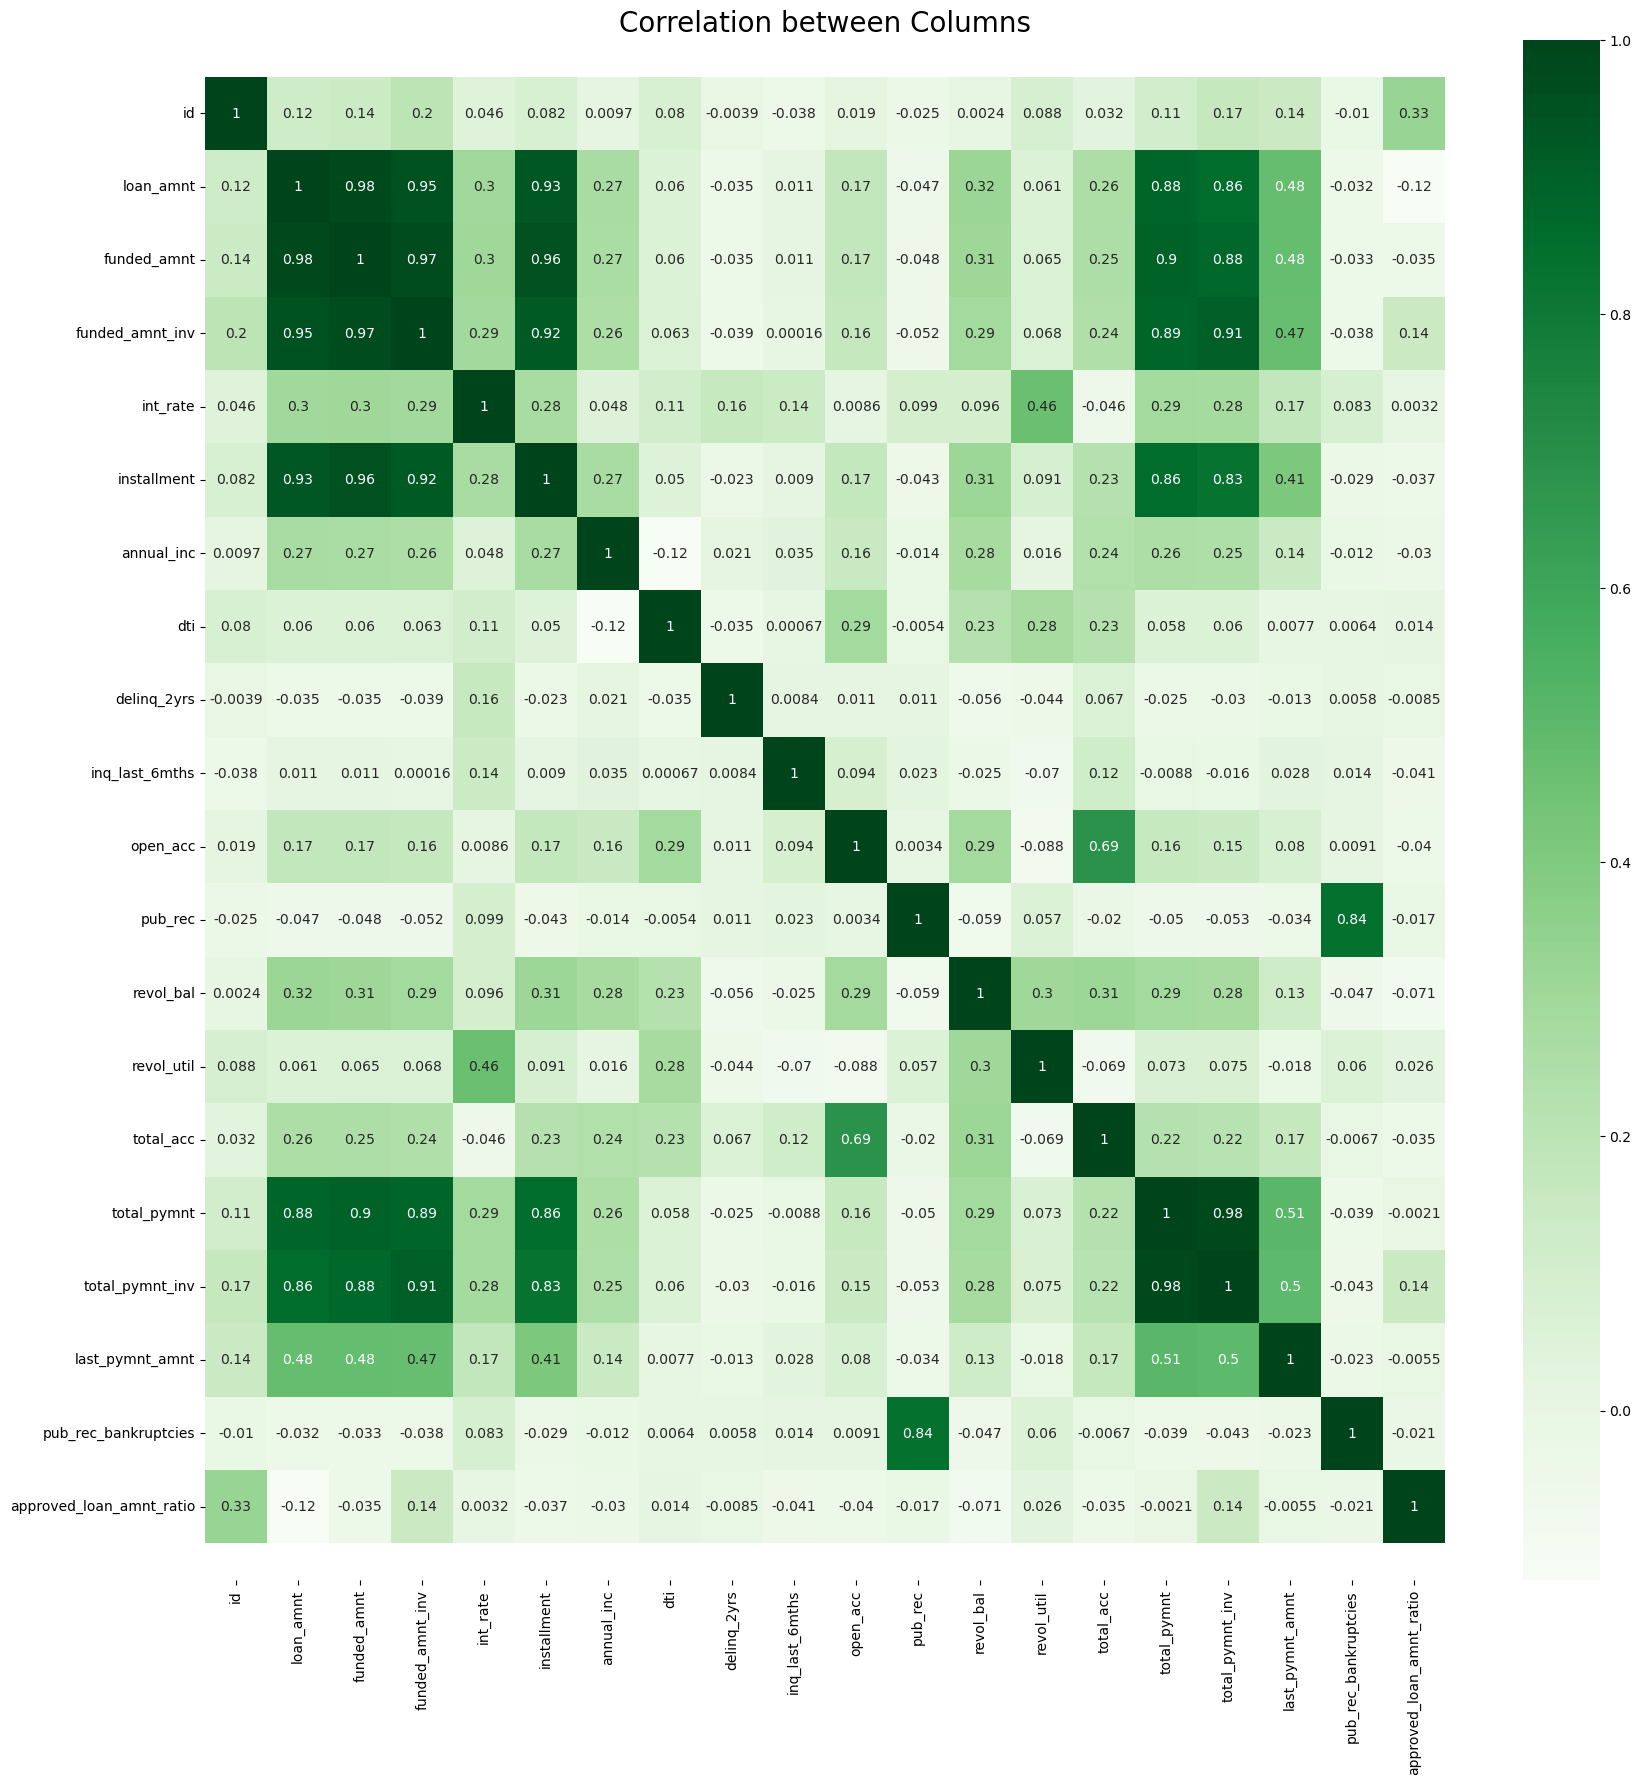

In [135]:
#Finding correlation matric
corr_matrix = loan_data.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Greens')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns", size = 20)
plt.show()

**Observations**:  
* The public derogatory records colummn is highly (+ve) correlated with public bankruptcies records.   
* Interest rates are high for people with high revol utilisation.

# Observations
## The above analysis with respect to the charged off loans. There is a more probability of defaulting when :
- Applicants opting loan for 'home improvement' and have an income of 60k -70k.
- Applicants whose home ownership is 'MORTGAGE' and have an income of 60-70k.
- Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k.
- Applicants who have opted for a loan in the range of 30k - 35k and are charged interest rate of 15-17.5 %.
- Applicants who have taken a loan for small business and the loan amount is greater than 14k
- Applicants whose home ownership is 'MORTGAGE' and have a loan of 14-16k.
- When the grade is F and loan amount is between 15k-20k.
- When the employment length is 10yrs and the loan amount is 12k-14k.
- When the loan is verified and the loan amount is above 16k.
- For the grade G and the interest rate above 20%.